In [2]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

# Data Load

In [3]:
data_12800 = 'all_condition_stat_12800_filtered_max.csv'

In [4]:
data = pd.read_csv('./data/'+data_12800)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300,down
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300,down
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300,down
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300,down
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,583.231211,3.575957,2.872385,2.802993,0.030818,24.041893,1.967909,5.678236,50.651660,41.327268,...,0.027200,-4.553875,4.258986,-0.195173,-0.025525,4,6.0,5000,450,up
3562,580.421189,3.143293,2.918746,2.238513,0.010163,23.272022,2.152586,6.442916,54.398373,43.387011,...,0.032404,-4.331138,3.992545,-0.186024,0.438358,4,6.0,5000,450,up
3563,604.216465,3.415435,2.680779,2.670480,0.002692,20.326331,1.737523,4.027836,53.139158,42.652204,...,-0.054790,-4.232807,4.408266,0.124733,-0.246908,4,6.0,5000,500,up
3564,602.037207,3.527300,2.891382,2.728853,0.015913,22.578368,1.957310,5.237861,53.070980,42.595514,...,-0.041764,-4.056287,4.755409,0.231296,-0.233711,4,6.0,5000,500,up


In [5]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [6]:
groups_ae = down.groupby('Ae')
groups_ap = down.groupby('Ap')
groups_feed = down.groupby('feed')
groups_rpm = down.groupby('rpm')

# Ae

In [7]:
ae_1 = groups_ae.get_group(1)
ae_1 = ae_1.reset_index(drop=True)
ae_1 = ae_1.drop(['Milling_Type'], axis=1)

ae_2 = groups_ae.get_group(2)
ae_2 = ae_2.reset_index(drop=True)
ae_2 = ae_2.drop(['Milling_Type'], axis=1)

ae_3 = groups_ae.get_group(3)
ae_3 = ae_3.reset_index(drop=True)
ae_3 = ae_3.drop(['Milling_Type'], axis=1)

ae_4 = groups_ae.get_group(4)
ae_4 = ae_4.reset_index(drop=True)
ae_4 = ae_4.drop(['Milling_Type'], axis=1)

## Ae 1

In [7]:
train = pd.concat([ae_2, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [8]:
X_test = ae_1.iloc[: , 1:]
y_test = ae_1['RMS_CF_max']

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 170,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:317.45866	validation_0-mape:0.98780	validation_1-rmse:202.23637	validation_1-mape:0.98210
[1]	validation_0-rmse:314.33827	validation_0-mape:0.97790	validation_1-rmse:199.44405	validation_1-mape:0.96771
[2]	validation_0-rmse:311.24908	validation_0-mape:0.96811	validation_1-rmse:196.67839	validation_1-mape:0.95351
[3]	validation_0-rmse:308.19076	validation_0-mape:0.95844	validation_1-rmse:193.93967	validation_1-mape:0.93948
[4]	validation_0-rmse:305.16301	validation_0-mape:0.94886	validation_1-rmse:191.22861	validation_1-mape:0.92558
[5]	validation_0-rmse:302.16544	validation_0-mape:0.93938	validation_1-rmse:188.54494	validation_1-mape:0.91182
[6]	validation_0-rmse:299.19782	validation_0-mape:0.92999	validation_1-rmse:185.88839	validation_1-mape:0.89820
[7]	validation_0-rmse:296.25981	validation_0-mape:0.92069	validation_1-rmse:183.25872	validation_1-mape:0.88472
[8]	validation_0-rmse:293.35051	validation_0-mape:0.91148	validation_1-rmse:180.70713	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[38]	validation_0-rmse:218.33747	validation_0-mape:0.67417	validation_1-rmse:114.90053	validation_1-mape:0.53938
[39]	validation_0-rmse:216.20487	validation_0-mape:0.66742	validation_1-rmse:113.10184	validation_1-mape:0.53033
[40]	validation_0-rmse:214.09009	validation_0-mape:0.66075	validation_1-rmse:111.22847	validation_1-mape:0.52057
[41]	validation_0-rmse:212.00016	validation_0-mape:0.65415	validation_1-rmse:109.30421	validation_1-mape:0.51106
[42]	validation_0-rmse:209.92752	validation_0-mape:0.64760	validation_1-rmse:107.53055	validation_1-mape:0.50196
[43]	validation_0-rmse:207.87831	validation_0-mape:0.64113	validation_1-rmse:105.77672	validation_1-mape:0.49295
[44]	validation_0-rmse:205.84665	validation_0-mape:0.63471	validation_1-rmse:103.94093	validation_1-mape:0.48382
[45]	validation_0-rmse:203.83836	validation_0-mape:0.62838	validation_1-rmse:102.23567	validation_1-mape:0.47522
[46]	validation_0-rmse:201.84726	validation_0-mape:0.62209	validation_1-rmse:100.44700	validatio

[111]	validation_0-rmse:107.08837	validation_0-mape:0.32459	validation_1-rmse:21.73020	validation_1-mape:0.07385
[112]	validation_0-rmse:106.05546	validation_0-mape:0.32136	validation_1-rmse:21.18382	validation_1-mape:0.07208
[113]	validation_0-rmse:105.03292	validation_0-mape:0.31817	validation_1-rmse:20.56900	validation_1-mape:0.07044
[114]	validation_0-rmse:104.01926	validation_0-mape:0.31500	validation_1-rmse:20.05851	validation_1-mape:0.06903
[115]	validation_0-rmse:103.01562	validation_0-mape:0.31186	validation_1-rmse:19.55267	validation_1-mape:0.06791
[116]	validation_0-rmse:102.02294	validation_0-mape:0.30877	validation_1-rmse:19.01622	validation_1-mape:0.06674
[117]	validation_0-rmse:101.03930	validation_0-mape:0.30571	validation_1-rmse:18.58544	validation_1-mape:0.06578
[118]	validation_0-rmse:100.06542	validation_0-mape:0.30268	validation_1-rmse:18.13848	validation_1-mape:0.06496
[119]	validation_0-rmse:99.10058	validation_0-mape:0.29966	validation_1-rmse:17.74550	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=170, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [12]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 61.2631
Train MAPE: 18.1983
Test RMSE: 27.0872
Test MAPE: 14.0762


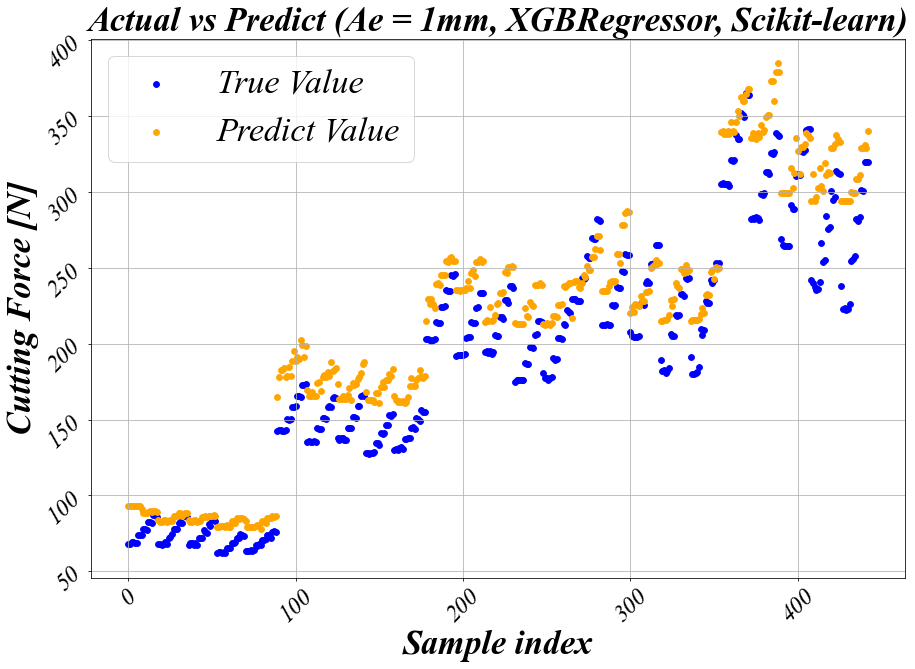

In [14]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ae1 12800.png")

## Ae 2

In [31]:
train = pd.concat([ae_1, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [32]:
X_test = ae_2.iloc[: , 1:]
y_test = ae_2['RMS_CF_max']

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:297.64222	validation_0-mape:0.98755	validation_1-rmse:280.02624	validation_1-mape:0.98740
[1]	validation_0-rmse:294.72852	validation_0-mape:0.97770	validation_1-rmse:277.21020	validation_1-mape:0.97733
[2]	validation_0-rmse:291.84398	validation_0-mape:0.96795	validation_1-rmse:274.41966	validation_1-mape:0.96735
[3]	validation_0-rmse:288.98831	validation_0-mape:0.95829	validation_1-rmse:271.65278	validation_1-mape:0.95746
[4]	validation_0-rmse:286.16321	validation_0-mape:0.94870	validation_1-rmse:268.84652	validation_1-mape:0.94742
[5]	validation_0-rmse:283.36429	validation_0-mape:0.93923	validation_1-rmse:266.14204	validation_1-mape:0.93774
[6]	validation_0-rmse:280.59542	validation_0-mape:0.92985	validation_1-rmse:263.39128	validation_1-mape:0.92788
[7]	validation_0-rmse:277.85200	validation_0-mape:0.92059	validation_1-rmse:260.72459	validation_1-mape:0.91837
[8]	validation_0-rmse:275.13653	validation_0-mape:0.91142	validation_1-rmse:258.04605	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[37]	validation_0-rmse:207.03139	validation_0-mape:0.68146	validation_1-rmse:191.81787	validation_1-mape:0.66924
[38]	validation_0-rmse:205.01616	validation_0-mape:0.67464	validation_1-rmse:189.87613	validation_1-mape:0.66223
[39]	validation_0-rmse:203.02424	validation_0-mape:0.66794	validation_1-rmse:187.96831	validation_1-mape:0.65550
[40]	validation_0-rmse:201.04816	validation_0-mape:0.66125	validation_1-rmse:186.04149	validation_1-mape:0.64847
[41]	validation_0-rmse:199.09113	validation_0-mape:0.65465	validation_1-rmse:184.14137	validation_1-mape:0.64151
[42]	validation_0-rmse:197.15576	validation_0-mape:0.64811	validation_1-rmse:182.31101	validation_1-mape:0.63481
[43]	validation_0-rmse:195.23873	validation_0-mape:0.64163	validation_1-rmse:180.47450	validation_1-mape:0.62816
[44]	validation_0-rmse:193.34331	validation_0-mape:0.63525	validation_1-rmse:178.64179	validation_1-mape:0.62167
[45]	validation_0-rmse:191.46267	validation_0-mape:0.62891	validation_1-rmse:176.80393	validatio

[110]	validation_0-rmse:101.96501	validation_0-mape:0.32814	validation_1-rmse:93.16521	validation_1-mape:0.30512
[111]	validation_0-rmse:100.98882	validation_0-mape:0.32488	validation_1-rmse:92.24381	validation_1-mape:0.30167
[112]	validation_0-rmse:100.02095	validation_0-mape:0.32167	validation_1-rmse:91.28448	validation_1-mape:0.29806
[113]	validation_0-rmse:99.06276	validation_0-mape:0.31849	validation_1-rmse:90.32880	validation_1-mape:0.29449
[114]	validation_0-rmse:98.11564	validation_0-mape:0.31533	validation_1-rmse:89.52504	validation_1-mape:0.29134
[115]	validation_0-rmse:97.17756	validation_0-mape:0.31220	validation_1-rmse:88.64773	validation_1-mape:0.28802
[116]	validation_0-rmse:96.24891	validation_0-mape:0.30910	validation_1-rmse:87.81565	validation_1-mape:0.28483
[117]	validation_0-rmse:95.32920	validation_0-mape:0.30603	validation_1-rmse:86.94377	validation_1-mape:0.28155
[118]	validation_0-rmse:94.41892	validation_0-mape:0.30299	validation_1-rmse:86.12642	validation_1-ma

[184]	validation_0-rmse:50.47026	validation_0-mape:0.15713	validation_1-rmse:47.98279	validation_1-mape:0.12688
[185]	validation_0-rmse:49.99928	validation_0-mape:0.15558	validation_1-rmse:47.60515	validation_1-mape:0.12531
[186]	validation_0-rmse:49.53292	validation_0-mape:0.15404	validation_1-rmse:47.23045	validation_1-mape:0.12372
[187]	validation_0-rmse:49.07064	validation_0-mape:0.15252	validation_1-rmse:46.88188	validation_1-mape:0.12224
[188]	validation_0-rmse:48.61485	validation_0-mape:0.15101	validation_1-rmse:46.52152	validation_1-mape:0.12079
[189]	validation_0-rmse:48.16481	validation_0-mape:0.14951	validation_1-rmse:46.18047	validation_1-mape:0.11938
[190]	validation_0-rmse:47.71743	validation_0-mape:0.14803	validation_1-rmse:45.83227	validation_1-mape:0.11796
[191]	validation_0-rmse:47.27318	validation_0-mape:0.14657	validation_1-rmse:45.47838	validation_1-mape:0.11653
[192]	validation_0-rmse:46.83493	validation_0-mape:0.14511	validation_1-rmse:45.14616	validation_1-mape:

[258]	validation_0-rmse:25.64271	validation_0-mape:0.07539	validation_1-rmse:31.69834	validation_1-mape:0.07582
[259]	validation_0-rmse:25.41565	validation_0-mape:0.07465	validation_1-rmse:31.60128	validation_1-mape:0.07575
[260]	validation_0-rmse:25.19019	validation_0-mape:0.07392	validation_1-rmse:31.49376	validation_1-mape:0.07565
[261]	validation_0-rmse:24.96724	validation_0-mape:0.07319	validation_1-rmse:31.39424	validation_1-mape:0.07558
[262]	validation_0-rmse:24.74657	validation_0-mape:0.07247	validation_1-rmse:31.28953	validation_1-mape:0.07550
[263]	validation_0-rmse:24.52763	validation_0-mape:0.07176	validation_1-rmse:31.18536	validation_1-mape:0.07541
[264]	validation_0-rmse:24.31023	validation_0-mape:0.07106	validation_1-rmse:31.09199	validation_1-mape:0.07535
[265]	validation_0-rmse:24.09608	validation_0-mape:0.07036	validation_1-rmse:31.00117	validation_1-mape:0.07532
[266]	validation_0-rmse:23.88392	validation_0-mape:0.06967	validation_1-rmse:30.90733	validation_1-mape:

[332]	validation_0-rmse:13.62244	validation_0-mape:0.03691	validation_1-rmse:27.55177	validation_1-mape:0.07642
[333]	validation_0-rmse:13.51330	validation_0-mape:0.03657	validation_1-rmse:27.52743	validation_1-mape:0.07644
[334]	validation_0-rmse:13.40376	validation_0-mape:0.03623	validation_1-rmse:27.50505	validation_1-mape:0.07649
[335]	validation_0-rmse:13.29677	validation_0-mape:0.03589	validation_1-rmse:27.48225	validation_1-mape:0.07652
[336]	validation_0-rmse:13.18953	validation_0-mape:0.03555	validation_1-rmse:27.45829	validation_1-mape:0.07658
[337]	validation_0-rmse:13.08325	validation_0-mape:0.03523	validation_1-rmse:27.43403	validation_1-mape:0.07662
[338]	validation_0-rmse:12.97971	validation_0-mape:0.03490	validation_1-rmse:27.41100	validation_1-mape:0.07665
[339]	validation_0-rmse:12.87515	validation_0-mape:0.03458	validation_1-rmse:27.39736	validation_1-mape:0.07670
[340]	validation_0-rmse:12.77225	validation_0-mape:0.03426	validation_1-rmse:27.37587	validation_1-mape:

[406]	validation_0-rmse:7.77994	validation_0-mape:0.01911	validation_1-rmse:26.57267	validation_1-mape:0.07926
[407]	validation_0-rmse:7.72592	validation_0-mape:0.01895	validation_1-rmse:26.57459	validation_1-mape:0.07931
[408]	validation_0-rmse:7.67395	validation_0-mape:0.01881	validation_1-rmse:26.57842	validation_1-mape:0.07936
[409]	validation_0-rmse:7.62307	validation_0-mape:0.01866	validation_1-rmse:26.57975	validation_1-mape:0.07942
[410]	validation_0-rmse:7.57131	validation_0-mape:0.01851	validation_1-rmse:26.58470	validation_1-mape:0.07947
[411]	validation_0-rmse:7.51874	validation_0-mape:0.01836	validation_1-rmse:26.58624	validation_1-mape:0.07953
[412]	validation_0-rmse:7.46731	validation_0-mape:0.01821	validation_1-rmse:26.58884	validation_1-mape:0.07958
[413]	validation_0-rmse:7.41797	validation_0-mape:0.01808	validation_1-rmse:26.59251	validation_1-mape:0.07962
[414]	validation_0-rmse:7.36946	validation_0-mape:0.01794	validation_1-rmse:26.59531	validation_1-mape:0.07967
[

[553]	validation_0-rmse:3.62601	validation_0-mape:0.00923	validation_1-rmse:26.85579	validation_1-mape:0.08362
[554]	validation_0-rmse:3.61159	validation_0-mape:0.00921	validation_1-rmse:26.85464	validation_1-mape:0.08363
[555]	validation_0-rmse:3.59762	validation_0-mape:0.00918	validation_1-rmse:26.85793	validation_1-mape:0.08365
[556]	validation_0-rmse:3.58609	validation_0-mape:0.00916	validation_1-rmse:26.85948	validation_1-mape:0.08366
[557]	validation_0-rmse:3.57536	validation_0-mape:0.00914	validation_1-rmse:26.86128	validation_1-mape:0.08368
[558]	validation_0-rmse:3.56112	validation_0-mape:0.00912	validation_1-rmse:26.86004	validation_1-mape:0.08370
[559]	validation_0-rmse:3.54806	validation_0-mape:0.00910	validation_1-rmse:26.85920	validation_1-mape:0.08371
[560]	validation_0-rmse:3.53619	validation_0-mape:0.00907	validation_1-rmse:26.86014	validation_1-mape:0.08372
[561]	validation_0-rmse:3.52303	validation_0-mape:0.00905	validation_1-rmse:26.86248	validation_1-mape:0.08373
[

[627]	validation_0-rmse:2.89787	validation_0-mape:0.00790	validation_1-rmse:26.91570	validation_1-mape:0.08441
[628]	validation_0-rmse:2.89325	validation_0-mape:0.00789	validation_1-rmse:26.91740	validation_1-mape:0.08442
[629]	validation_0-rmse:2.88644	validation_0-mape:0.00787	validation_1-rmse:26.91854	validation_1-mape:0.08442
[630]	validation_0-rmse:2.87732	validation_0-mape:0.00785	validation_1-rmse:26.91520	validation_1-mape:0.08442
[631]	validation_0-rmse:2.87276	validation_0-mape:0.00785	validation_1-rmse:26.91695	validation_1-mape:0.08443
[632]	validation_0-rmse:2.86295	validation_0-mape:0.00783	validation_1-rmse:26.91161	validation_1-mape:0.08443
[633]	validation_0-rmse:2.85691	validation_0-mape:0.00781	validation_1-rmse:26.91367	validation_1-mape:0.08444
[634]	validation_0-rmse:2.85097	validation_0-mape:0.00780	validation_1-rmse:26.91204	validation_1-mape:0.08445
[635]	validation_0-rmse:2.84558	validation_0-mape:0.00779	validation_1-rmse:26.91180	validation_1-mape:0.08446
[

[701]	validation_0-rmse:2.45363	validation_0-mape:0.00701	validation_1-rmse:26.93188	validation_1-mape:0.08485
[702]	validation_0-rmse:2.44690	validation_0-mape:0.00700	validation_1-rmse:26.93171	validation_1-mape:0.08485
[703]	validation_0-rmse:2.44246	validation_0-mape:0.00699	validation_1-rmse:26.93023	validation_1-mape:0.08485
[704]	validation_0-rmse:2.43720	validation_0-mape:0.00698	validation_1-rmse:26.93098	validation_1-mape:0.08485
[705]	validation_0-rmse:2.43298	validation_0-mape:0.00697	validation_1-rmse:26.93176	validation_1-mape:0.08486
[706]	validation_0-rmse:2.42634	validation_0-mape:0.00696	validation_1-rmse:26.93122	validation_1-mape:0.08485
[707]	validation_0-rmse:2.42174	validation_0-mape:0.00695	validation_1-rmse:26.93249	validation_1-mape:0.08486
[708]	validation_0-rmse:2.41724	validation_0-mape:0.00694	validation_1-rmse:26.93312	validation_1-mape:0.08486
[709]	validation_0-rmse:2.41201	validation_0-mape:0.00692	validation_1-rmse:26.93285	validation_1-mape:0.08487
[

[775]	validation_0-rmse:2.13639	validation_0-mape:0.00630	validation_1-rmse:26.92611	validation_1-mape:0.08499
[776]	validation_0-rmse:2.13443	validation_0-mape:0.00630	validation_1-rmse:26.92681	validation_1-mape:0.08499
[777]	validation_0-rmse:2.13266	validation_0-mape:0.00630	validation_1-rmse:26.92751	validation_1-mape:0.08499
[778]	validation_0-rmse:2.12948	validation_0-mape:0.00628	validation_1-rmse:26.92725	validation_1-mape:0.08499
[779]	validation_0-rmse:2.12488	validation_0-mape:0.00627	validation_1-rmse:26.92705	validation_1-mape:0.08499
[780]	validation_0-rmse:2.12287	validation_0-mape:0.00627	validation_1-rmse:26.92781	validation_1-mape:0.08499
[781]	validation_0-rmse:2.12112	validation_0-mape:0.00627	validation_1-rmse:26.92910	validation_1-mape:0.08499
[782]	validation_0-rmse:2.11939	validation_0-mape:0.00626	validation_1-rmse:26.92971	validation_1-mape:0.08499
[783]	validation_0-rmse:2.11744	validation_0-mape:0.00626	validation_1-rmse:26.93045	validation_1-mape:0.08499
[

[849]	validation_0-rmse:1.93635	validation_0-mape:0.00583	validation_1-rmse:26.96096	validation_1-mape:0.08514
[850]	validation_0-rmse:1.93329	validation_0-mape:0.00582	validation_1-rmse:26.96145	validation_1-mape:0.08514
[851]	validation_0-rmse:1.93117	validation_0-mape:0.00581	validation_1-rmse:26.96082	validation_1-mape:0.08514
[852]	validation_0-rmse:1.92971	validation_0-mape:0.00581	validation_1-rmse:26.96135	validation_1-mape:0.08515
[853]	validation_0-rmse:1.92778	validation_0-mape:0.00580	validation_1-rmse:26.96093	validation_1-mape:0.08515
[854]	validation_0-rmse:1.92690	validation_0-mape:0.00580	validation_1-rmse:26.96151	validation_1-mape:0.08515
[855]	validation_0-rmse:1.92547	validation_0-mape:0.00580	validation_1-rmse:26.96183	validation_1-mape:0.08515
[856]	validation_0-rmse:1.92248	validation_0-mape:0.00579	validation_1-rmse:26.96286	validation_1-mape:0.08516
[857]	validation_0-rmse:1.91958	validation_0-mape:0.00578	validation_1-rmse:26.96344	validation_1-mape:0.08516
[

[923]	validation_0-rmse:1.82263	validation_0-mape:0.00554	validation_1-rmse:26.96167	validation_1-mape:0.08520
[924]	validation_0-rmse:1.82049	validation_0-mape:0.00553	validation_1-rmse:26.96156	validation_1-mape:0.08520
[925]	validation_0-rmse:1.81915	validation_0-mape:0.00553	validation_1-rmse:26.96196	validation_1-mape:0.08520
[926]	validation_0-rmse:1.81761	validation_0-mape:0.00553	validation_1-rmse:26.96185	validation_1-mape:0.08521
[927]	validation_0-rmse:1.81499	validation_0-mape:0.00552	validation_1-rmse:26.96243	validation_1-mape:0.08521
[928]	validation_0-rmse:1.81338	validation_0-mape:0.00551	validation_1-rmse:26.96260	validation_1-mape:0.08521
[929]	validation_0-rmse:1.81128	validation_0-mape:0.00551	validation_1-rmse:26.96249	validation_1-mape:0.08521
[930]	validation_0-rmse:1.80981	validation_0-mape:0.00551	validation_1-rmse:26.96254	validation_1-mape:0.08521
[931]	validation_0-rmse:1.80822	validation_0-mape:0.00550	validation_1-rmse:26.96219	validation_1-mape:0.08521
[

[997]	validation_0-rmse:1.71852	validation_0-mape:0.00524	validation_1-rmse:26.96855	validation_1-mape:0.08529
[998]	validation_0-rmse:1.71588	validation_0-mape:0.00523	validation_1-rmse:26.96882	validation_1-mape:0.08529
[999]	validation_0-rmse:1.71516	validation_0-mape:0.00523	validation_1-rmse:26.96873	validation_1-mape:0.08529


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [35]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7152
Train MAPE: 0.5231
Test RMSE: 26.9687
Test MAPE: 8.5289


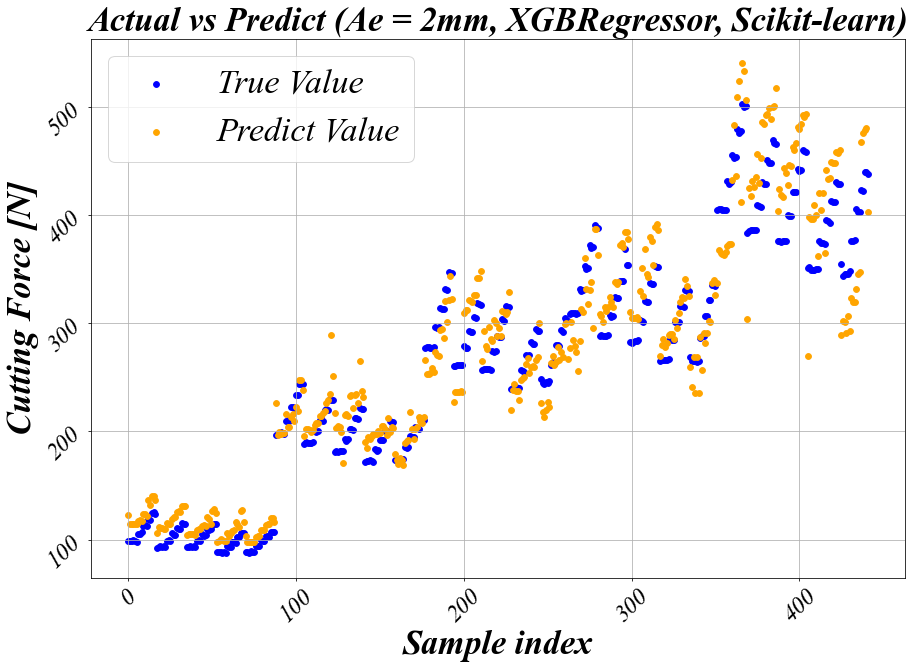

In [36]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 2mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ae2 12800.png")

## Ae3

In [37]:
train = pd.concat([ae_1, ae_2, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [38]:
X_test = ae_3.iloc[: , 1:]
y_test = ae_3['RMS_CF_max']

In [39]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [40]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:283.37678	validation_0-mape:0.98744	validation_1-rmse:321.76338	validation_1-mape:0.98839
[1]	validation_0-rmse:280.61208	validation_0-mape:0.97758	validation_1-rmse:318.73519	validation_1-mape:0.97898
[2]	validation_0-rmse:277.87496	validation_0-mape:0.96781	validation_1-rmse:315.74747	validation_1-mape:0.96968
[3]	validation_0-rmse:275.16515	validation_0-mape:0.95815	validation_1-rmse:312.77920	validation_1-mape:0.96047
[4]	validation_0-rmse:272.48239	validation_0-mape:0.94859	validation_1-rmse:309.85103	validation_1-mape:0.95137
[5]	validation_0-rmse:269.82609	validation_0-mape:0.93913	validation_1-rmse:306.94423	validation_1-mape:0.94232
[6]	validation_0-rmse:267.19197	validation_0-mape:0.92972	validation_1-rmse:304.04003	validation_1-mape:0.93329
[7]	validation_0-rmse:264.58757	validation_0-mape:0.92046	validation_1-rmse:301.08455	validation_1-mape:0.92425
[8]	validation_0-rmse:262.00939	validation_0-mape:0.91128	validation_1-rmse:298.16579	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[35]	validation_0-rmse:201.26510	validation_0-mape:0.69485	validation_1-rmse:229.93407	validation_1-mape:0.70412
[36]	validation_0-rmse:199.31310	validation_0-mape:0.68789	validation_1-rmse:227.71016	validation_1-mape:0.69729
[37]	validation_0-rmse:197.38346	validation_0-mape:0.68101	validation_1-rmse:225.48029	validation_1-mape:0.69036
[38]	validation_0-rmse:195.47285	validation_0-mape:0.67420	validation_1-rmse:223.27072	validation_1-mape:0.68360
[39]	validation_0-rmse:193.57833	validation_0-mape:0.66746	validation_1-rmse:221.10726	validation_1-mape:0.67688
[40]	validation_0-rmse:191.70081	validation_0-mape:0.66078	validation_1-rmse:219.02241	validation_1-mape:0.67040
[41]	validation_0-rmse:189.84523	validation_0-mape:0.65419	validation_1-rmse:216.95259	validation_1-mape:0.66404
[42]	validation_0-rmse:188.00690	validation_0-mape:0.64765	validation_1-rmse:214.85975	validation_1-mape:0.65764
[43]	validation_0-rmse:186.18877	validation_0-mape:0.64118	validation_1-rmse:212.79394	validatio

[108]	validation_0-rmse:99.42432	validation_0-mape:0.33449	validation_1-rmse:114.39121	validation_1-mape:0.34677
[109]	validation_0-rmse:98.47376	validation_0-mape:0.33117	validation_1-rmse:113.32767	validation_1-mape:0.34342
[110]	validation_0-rmse:97.53856	validation_0-mape:0.32788	validation_1-rmse:112.28360	validation_1-mape:0.34018
[111]	validation_0-rmse:96.60995	validation_0-mape:0.32462	validation_1-rmse:111.24036	validation_1-mape:0.33691
[112]	validation_0-rmse:95.69282	validation_0-mape:0.32139	validation_1-rmse:110.22140	validation_1-mape:0.33372
[113]	validation_0-rmse:94.78251	validation_0-mape:0.31819	validation_1-rmse:109.19899	validation_1-mape:0.33052
[114]	validation_0-rmse:93.88148	validation_0-mape:0.31502	validation_1-rmse:108.19702	validation_1-mape:0.32737
[115]	validation_0-rmse:92.98911	validation_0-mape:0.31189	validation_1-rmse:107.19387	validation_1-mape:0.32421
[116]	validation_0-rmse:92.10508	validation_0-mape:0.30879	validation_1-rmse:106.21298	validatio

[182]	validation_0-rmse:49.36191	validation_0-mape:0.16004	validation_1-rmse:58.44654	validation_1-mape:0.17139
[183]	validation_0-rmse:48.89684	validation_0-mape:0.15847	validation_1-rmse:57.87755	validation_1-mape:0.16968
[184]	validation_0-rmse:48.43645	validation_0-mape:0.15691	validation_1-rmse:57.31350	validation_1-mape:0.16795
[185]	validation_0-rmse:47.98070	validation_0-mape:0.15537	validation_1-rmse:56.75313	validation_1-mape:0.16627
[186]	validation_0-rmse:47.52951	validation_0-mape:0.15384	validation_1-rmse:56.19908	validation_1-mape:0.16456
[187]	validation_0-rmse:47.08186	validation_0-mape:0.15233	validation_1-rmse:55.65028	validation_1-mape:0.16292
[188]	validation_0-rmse:46.63964	validation_0-mape:0.15084	validation_1-rmse:55.10544	validation_1-mape:0.16125
[189]	validation_0-rmse:46.20087	validation_0-mape:0.14936	validation_1-rmse:54.57313	validation_1-mape:0.15965
[190]	validation_0-rmse:45.76747	validation_0-mape:0.14789	validation_1-rmse:54.03096	validation_1-mape:

[256]	validation_0-rmse:24.95446	validation_0-mape:0.07707	validation_1-rmse:29.46353	validation_1-mape:0.08273
[257]	validation_0-rmse:24.73283	validation_0-mape:0.07631	validation_1-rmse:29.24892	validation_1-mape:0.08206
[258]	validation_0-rmse:24.51373	validation_0-mape:0.07556	validation_1-rmse:28.99316	validation_1-mape:0.08130
[259]	validation_0-rmse:24.29735	validation_0-mape:0.07482	validation_1-rmse:28.77191	validation_1-mape:0.08061
[260]	validation_0-rmse:24.08036	validation_0-mape:0.07409	validation_1-rmse:28.52525	validation_1-mape:0.07986
[261]	validation_0-rmse:23.86711	validation_0-mape:0.07336	validation_1-rmse:28.27345	validation_1-mape:0.07912
[262]	validation_0-rmse:23.65568	validation_0-mape:0.07264	validation_1-rmse:28.02528	validation_1-mape:0.07838
[263]	validation_0-rmse:23.44786	validation_0-mape:0.07193	validation_1-rmse:27.81631	validation_1-mape:0.07773
[264]	validation_0-rmse:23.24093	validation_0-mape:0.07122	validation_1-rmse:27.57770	validation_1-mape:

[330]	validation_0-rmse:13.23268	validation_0-mape:0.03740	validation_1-rmse:18.24924	validation_1-mape:0.04959
[331]	validation_0-rmse:13.12691	validation_0-mape:0.03705	validation_1-rmse:18.16837	validation_1-mape:0.04936
[332]	validation_0-rmse:13.02020	validation_0-mape:0.03670	validation_1-rmse:18.07520	validation_1-mape:0.04910
[333]	validation_0-rmse:12.91602	validation_0-mape:0.03635	validation_1-rmse:17.99779	validation_1-mape:0.04888
[334]	validation_0-rmse:12.81341	validation_0-mape:0.03601	validation_1-rmse:17.92299	validation_1-mape:0.04866
[335]	validation_0-rmse:12.70990	validation_0-mape:0.03567	validation_1-rmse:17.83683	validation_1-mape:0.04842
[336]	validation_0-rmse:12.60886	validation_0-mape:0.03533	validation_1-rmse:17.76294	validation_1-mape:0.04821
[337]	validation_0-rmse:12.50946	validation_0-mape:0.03500	validation_1-rmse:17.69311	validation_1-mape:0.04801
[338]	validation_0-rmse:12.40924	validation_0-mape:0.03467	validation_1-rmse:17.60840	validation_1-mape:

[404]	validation_0-rmse:7.67971	validation_0-mape:0.01965	validation_1-rmse:14.92370	validation_1-mape:0.03995
[405]	validation_0-rmse:7.63060	validation_0-mape:0.01951	validation_1-rmse:14.90404	validation_1-mape:0.03990
[406]	validation_0-rmse:7.58143	validation_0-mape:0.01936	validation_1-rmse:14.88977	validation_1-mape:0.03984
[407]	validation_0-rmse:7.53284	validation_0-mape:0.01922	validation_1-rmse:14.87167	validation_1-mape:0.03978
[408]	validation_0-rmse:7.48534	validation_0-mape:0.01908	validation_1-rmse:14.85706	validation_1-mape:0.03973
[409]	validation_0-rmse:7.43556	validation_0-mape:0.01893	validation_1-rmse:14.83692	validation_1-mape:0.03967
[410]	validation_0-rmse:7.38842	validation_0-mape:0.01879	validation_1-rmse:14.82111	validation_1-mape:0.03961
[411]	validation_0-rmse:7.33949	validation_0-mape:0.01864	validation_1-rmse:14.80226	validation_1-mape:0.03955
[412]	validation_0-rmse:7.29339	validation_0-mape:0.01851	validation_1-rmse:14.78467	validation_1-mape:0.03950
[

[478]	validation_0-rmse:5.02563	validation_0-mape:0.01256	validation_1-rmse:14.09833	validation_1-mape:0.03714
[479]	validation_0-rmse:4.99940	validation_0-mape:0.01250	validation_1-rmse:14.09299	validation_1-mape:0.03712
[480]	validation_0-rmse:4.97425	validation_0-mape:0.01245	validation_1-rmse:14.08678	validation_1-mape:0.03710
[481]	validation_0-rmse:4.95289	validation_0-mape:0.01239	validation_1-rmse:14.08021	validation_1-mape:0.03708
[482]	validation_0-rmse:4.92827	validation_0-mape:0.01234	validation_1-rmse:14.07414	validation_1-mape:0.03706
[483]	validation_0-rmse:4.90419	validation_0-mape:0.01229	validation_1-rmse:14.06906	validation_1-mape:0.03705
[484]	validation_0-rmse:4.88126	validation_0-mape:0.01224	validation_1-rmse:14.06315	validation_1-mape:0.03703
[485]	validation_0-rmse:4.85712	validation_0-mape:0.01218	validation_1-rmse:14.05767	validation_1-mape:0.03701
[486]	validation_0-rmse:4.83375	validation_0-mape:0.01214	validation_1-rmse:14.05315	validation_1-mape:0.03699
[

[552]	validation_0-rmse:3.72397	validation_0-mape:0.00992	validation_1-rmse:13.91917	validation_1-mape:0.03609
[553]	validation_0-rmse:3.71184	validation_0-mape:0.00990	validation_1-rmse:13.91936	validation_1-mape:0.03608
[554]	validation_0-rmse:3.69979	validation_0-mape:0.00987	validation_1-rmse:13.91987	validation_1-mape:0.03607
[555]	validation_0-rmse:3.68656	validation_0-mape:0.00985	validation_1-rmse:13.91880	validation_1-mape:0.03606
[556]	validation_0-rmse:3.67486	validation_0-mape:0.00983	validation_1-rmse:13.91907	validation_1-mape:0.03606
[557]	validation_0-rmse:3.66165	validation_0-mape:0.00980	validation_1-rmse:13.91963	validation_1-mape:0.03605
[558]	validation_0-rmse:3.65021	validation_0-mape:0.00978	validation_1-rmse:13.91967	validation_1-mape:0.03604
[559]	validation_0-rmse:3.63740	validation_0-mape:0.00976	validation_1-rmse:13.91881	validation_1-mape:0.03603
[560]	validation_0-rmse:3.62616	validation_0-mape:0.00973	validation_1-rmse:13.91965	validation_1-mape:0.03603
[

[626]	validation_0-rmse:3.01394	validation_0-mape:0.00861	validation_1-rmse:13.95287	validation_1-mape:0.03570
[627]	validation_0-rmse:3.00575	validation_0-mape:0.00860	validation_1-rmse:13.95250	validation_1-mape:0.03570
[628]	validation_0-rmse:2.99928	validation_0-mape:0.00859	validation_1-rmse:13.95518	validation_1-mape:0.03570
[629]	validation_0-rmse:2.99413	validation_0-mape:0.00858	validation_1-rmse:13.95602	validation_1-mape:0.03570
[630]	validation_0-rmse:2.98611	validation_0-mape:0.00856	validation_1-rmse:13.95581	validation_1-mape:0.03570
[631]	validation_0-rmse:2.97847	validation_0-mape:0.00855	validation_1-rmse:13.95608	validation_1-mape:0.03569
[632]	validation_0-rmse:2.97299	validation_0-mape:0.00854	validation_1-rmse:13.95649	validation_1-mape:0.03569
[633]	validation_0-rmse:2.96792	validation_0-mape:0.00853	validation_1-rmse:13.95807	validation_1-mape:0.03569
[634]	validation_0-rmse:2.96047	validation_0-mape:0.00851	validation_1-rmse:13.95780	validation_1-mape:0.03569
[

[700]	validation_0-rmse:2.61219	validation_0-mape:0.00784	validation_1-rmse:14.05906	validation_1-mape:0.03567
[701]	validation_0-rmse:2.60893	validation_0-mape:0.00783	validation_1-rmse:14.05837	validation_1-mape:0.03567
[702]	validation_0-rmse:2.60583	validation_0-mape:0.00782	validation_1-rmse:14.05885	validation_1-mape:0.03567
[703]	validation_0-rmse:2.59980	validation_0-mape:0.00781	validation_1-rmse:14.06133	validation_1-mape:0.03568
[704]	validation_0-rmse:2.59662	validation_0-mape:0.00780	validation_1-rmse:14.06064	validation_1-mape:0.03568
[705]	validation_0-rmse:2.59245	validation_0-mape:0.00779	validation_1-rmse:14.06081	validation_1-mape:0.03568
[706]	validation_0-rmse:2.58861	validation_0-mape:0.00778	validation_1-rmse:14.06250	validation_1-mape:0.03567
[707]	validation_0-rmse:2.58498	validation_0-mape:0.00777	validation_1-rmse:14.06251	validation_1-mape:0.03567
[708]	validation_0-rmse:2.58110	validation_0-mape:0.00776	validation_1-rmse:14.06158	validation_1-mape:0.03567
[

[774]	validation_0-rmse:2.34415	validation_0-mape:0.00716	validation_1-rmse:14.02769	validation_1-mape:0.03552
[775]	validation_0-rmse:2.34020	validation_0-mape:0.00715	validation_1-rmse:14.02759	validation_1-mape:0.03552
[776]	validation_0-rmse:2.33777	validation_0-mape:0.00714	validation_1-rmse:14.02643	validation_1-mape:0.03552
[777]	validation_0-rmse:2.33424	validation_0-mape:0.00714	validation_1-rmse:14.02630	validation_1-mape:0.03552
[778]	validation_0-rmse:2.33005	validation_0-mape:0.00712	validation_1-rmse:14.02638	validation_1-mape:0.03552
[779]	validation_0-rmse:2.32787	validation_0-mape:0.00712	validation_1-rmse:14.02672	validation_1-mape:0.03552
[780]	validation_0-rmse:2.32483	validation_0-mape:0.00711	validation_1-rmse:14.02698	validation_1-mape:0.03552
[781]	validation_0-rmse:2.32255	validation_0-mape:0.00711	validation_1-rmse:14.02562	validation_1-mape:0.03552
[782]	validation_0-rmse:2.31907	validation_0-mape:0.00710	validation_1-rmse:14.02550	validation_1-mape:0.03552
[

[848]	validation_0-rmse:2.09597	validation_0-mape:0.00650	validation_1-rmse:14.00936	validation_1-mape:0.03552
[849]	validation_0-rmse:2.09409	validation_0-mape:0.00649	validation_1-rmse:14.01027	validation_1-mape:0.03552
[850]	validation_0-rmse:2.09040	validation_0-mape:0.00648	validation_1-rmse:14.01003	validation_1-mape:0.03552
[851]	validation_0-rmse:2.08841	validation_0-mape:0.00648	validation_1-rmse:14.00943	validation_1-mape:0.03552
[852]	validation_0-rmse:2.08513	validation_0-mape:0.00647	validation_1-rmse:14.01026	validation_1-mape:0.03552
[853]	validation_0-rmse:2.08145	validation_0-mape:0.00646	validation_1-rmse:14.01042	validation_1-mape:0.03553
[854]	validation_0-rmse:2.07863	validation_0-mape:0.00645	validation_1-rmse:14.01114	validation_1-mape:0.03553
[855]	validation_0-rmse:2.07423	validation_0-mape:0.00644	validation_1-rmse:14.01051	validation_1-mape:0.03552
[856]	validation_0-rmse:2.07027	validation_0-mape:0.00643	validation_1-rmse:14.01045	validation_1-mape:0.03553
[

[922]	validation_0-rmse:1.89178	validation_0-mape:0.00597	validation_1-rmse:13.99793	validation_1-mape:0.03553
[923]	validation_0-rmse:1.89015	validation_0-mape:0.00597	validation_1-rmse:13.99737	validation_1-mape:0.03553
[924]	validation_0-rmse:1.88728	validation_0-mape:0.00596	validation_1-rmse:13.99617	validation_1-mape:0.03553
[925]	validation_0-rmse:1.88620	validation_0-mape:0.00596	validation_1-rmse:13.99658	validation_1-mape:0.03553
[926]	validation_0-rmse:1.88523	validation_0-mape:0.00595	validation_1-rmse:13.99684	validation_1-mape:0.03553
[927]	validation_0-rmse:1.88231	validation_0-mape:0.00594	validation_1-rmse:13.99566	validation_1-mape:0.03553
[928]	validation_0-rmse:1.87982	validation_0-mape:0.00594	validation_1-rmse:13.99564	validation_1-mape:0.03553
[929]	validation_0-rmse:1.87798	validation_0-mape:0.00593	validation_1-rmse:13.99590	validation_1-mape:0.03553
[930]	validation_0-rmse:1.87515	validation_0-mape:0.00593	validation_1-rmse:13.99548	validation_1-mape:0.03553
[

[996]	validation_0-rmse:1.74703	validation_0-mape:0.00558	validation_1-rmse:13.97431	validation_1-mape:0.03550
[997]	validation_0-rmse:1.74571	validation_0-mape:0.00558	validation_1-rmse:13.97414	validation_1-mape:0.03550
[998]	validation_0-rmse:1.74468	validation_0-mape:0.00558	validation_1-rmse:13.97389	validation_1-mape:0.03550
[999]	validation_0-rmse:1.74366	validation_0-mape:0.00557	validation_1-rmse:13.97357	validation_1-mape:0.03550


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [41]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7437
Train MAPE: 0.5574
Test RMSE: 13.9736
Test MAPE: 3.5503


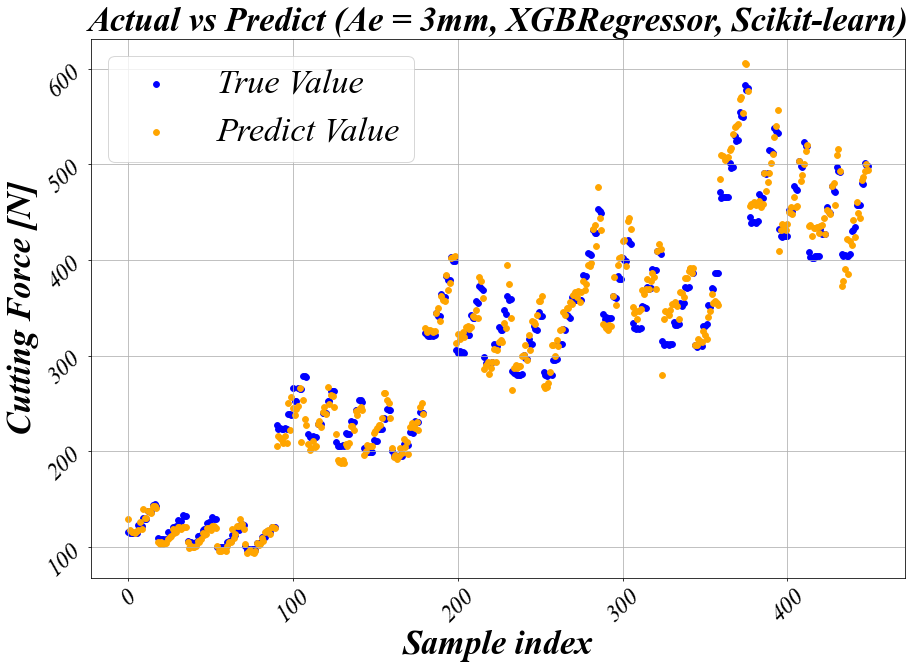

In [42]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 3mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ae3 12800.png")

## Ae4

In [8]:
train = pd.concat([ae_1, ae_2, ae_3], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [9]:
X_test = ae_4.iloc[: , 1:]
y_test = ae_4['RMS_CF_max']

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [11]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:272.99472	validation_0-mape:0.98741	validation_1-rmse:346.17417	validation_1-mape:0.98890
[1]	validation_0-rmse:270.31975	validation_0-mape:0.97754	validation_1-rmse:343.12401	validation_1-mape:0.97992
[2]	validation_0-rmse:267.67189	validation_0-mape:0.96775	validation_1-rmse:340.10214	validation_1-mape:0.97102
[3]	validation_0-rmse:265.05012	validation_0-mape:0.95809	validation_1-rmse:337.11298	validation_1-mape:0.96225
[4]	validation_0-rmse:262.45472	validation_0-mape:0.94853	validation_1-rmse:334.15154	validation_1-mape:0.95356
[5]	validation_0-rmse:259.88497	validation_0-mape:0.93906	validation_1-rmse:331.22427	validation_1-mape:0.94494
[6]	validation_0-rmse:257.34144	validation_0-mape:0.92967	validation_1-rmse:328.32181	validation_1-mape:0.93641
[7]	validation_0-rmse:254.82282	validation_0-mape:0.92039	validation_1-rmse:325.45287	validation_1-mape:0.92797
[8]	validation_0-rmse:252.32965	validation_0-mape:0.91121	validation_1-rmse:322.61799	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[21]	validation_0-rmse:222.09807	validation_0-mape:0.79961	validation_1-rmse:288.04089	validation_1-mape:0.81785
[22]	validation_0-rmse:219.93093	validation_0-mape:0.79162	validation_1-rmse:285.57444	validation_1-mape:0.81048
[23]	validation_0-rmse:217.78550	validation_0-mape:0.78371	validation_1-rmse:283.10153	validation_1-mape:0.80326
[24]	validation_0-rmse:215.66092	validation_0-mape:0.77589	validation_1-rmse:280.68631	validation_1-mape:0.79605
[25]	validation_0-rmse:213.55776	validation_0-mape:0.76813	validation_1-rmse:278.26596	validation_1-mape:0.78895
[26]	validation_0-rmse:211.47570	validation_0-mape:0.76046	validation_1-rmse:275.90879	validation_1-mape:0.78192
[27]	validation_0-rmse:209.41452	validation_0-mape:0.75286	validation_1-rmse:273.53010	validation_1-mape:0.77498
[28]	validation_0-rmse:207.37323	validation_0-mape:0.74535	validation_1-rmse:271.21979	validation_1-mape:0.76806
[29]	validation_0-rmse:205.35305	validation_0-mape:0.73790	validation_1-rmse:268.85424	validatio

[94]	validation_0-rmse:109.09015	validation_0-mape:0.38458	validation_1-rmse:156.63329	validation_1-mape:0.42550
[95]	validation_0-rmse:108.04234	validation_0-mape:0.38075	validation_1-rmse:155.39752	validation_1-mape:0.42173
[96]	validation_0-rmse:107.00536	validation_0-mape:0.37697	validation_1-rmse:154.21583	validation_1-mape:0.41808
[97]	validation_0-rmse:105.97890	validation_0-mape:0.37323	validation_1-rmse:153.05079	validation_1-mape:0.41449
[98]	validation_0-rmse:104.95972	validation_0-mape:0.36951	validation_1-rmse:151.83004	validation_1-mape:0.41080
[99]	validation_0-rmse:103.95355	validation_0-mape:0.36584	validation_1-rmse:150.65810	validation_1-mape:0.40722
[100]	validation_0-rmse:102.95442	validation_0-mape:0.36219	validation_1-rmse:149.47673	validation_1-mape:0.40372
[101]	validation_0-rmse:101.96697	validation_0-mape:0.35859	validation_1-rmse:148.30783	validation_1-mape:0.40012
[102]	validation_0-rmse:100.98841	validation_0-mape:0.35502	validation_1-rmse:147.15337	valida

[167]	validation_0-rmse:54.15561	validation_0-mape:0.18565	validation_1-rmse:90.14574	validation_1-mape:0.22669
[168]	validation_0-rmse:53.64153	validation_0-mape:0.18382	validation_1-rmse:89.54416	validation_1-mape:0.22488
[169]	validation_0-rmse:53.13305	validation_0-mape:0.18200	validation_1-rmse:88.93520	validation_1-mape:0.22314
[170]	validation_0-rmse:52.62914	validation_0-mape:0.18021	validation_1-rmse:88.34259	validation_1-mape:0.22137
[171]	validation_0-rmse:52.13043	validation_0-mape:0.17843	validation_1-rmse:87.75981	validation_1-mape:0.21965
[172]	validation_0-rmse:51.63668	validation_0-mape:0.17667	validation_1-rmse:87.19242	validation_1-mape:0.21794
[173]	validation_0-rmse:51.14807	validation_0-mape:0.17493	validation_1-rmse:86.59901	validation_1-mape:0.21621
[174]	validation_0-rmse:50.66391	validation_0-mape:0.17320	validation_1-rmse:86.04311	validation_1-mape:0.21448
[175]	validation_0-rmse:50.18430	validation_0-mape:0.17149	validation_1-rmse:85.49291	validation_1-mape:

[241]	validation_0-rmse:27.13857	validation_0-mape:0.08908	validation_1-rmse:58.20853	validation_1-mape:0.12926
[242]	validation_0-rmse:26.89204	validation_0-mape:0.08820	validation_1-rmse:57.95963	validation_1-mape:0.12846
[243]	validation_0-rmse:26.64758	validation_0-mape:0.08733	validation_1-rmse:57.68843	validation_1-mape:0.12758
[244]	validation_0-rmse:26.40607	validation_0-mape:0.08647	validation_1-rmse:57.44337	validation_1-mape:0.12681
[245]	validation_0-rmse:26.16626	validation_0-mape:0.08561	validation_1-rmse:57.18467	validation_1-mape:0.12592
[246]	validation_0-rmse:25.92915	validation_0-mape:0.08477	validation_1-rmse:56.92105	validation_1-mape:0.12511
[247]	validation_0-rmse:25.69413	validation_0-mape:0.08394	validation_1-rmse:56.63081	validation_1-mape:0.12427
[248]	validation_0-rmse:25.46148	validation_0-mape:0.08311	validation_1-rmse:56.37898	validation_1-mape:0.12346
[249]	validation_0-rmse:25.23344	validation_0-mape:0.08229	validation_1-rmse:56.13126	validation_1-mape:

[315]	validation_0-rmse:14.07829	validation_0-mape:0.04282	validation_1-rmse:44.12042	validation_1-mape:0.08744
[316]	validation_0-rmse:13.95873	validation_0-mape:0.04240	validation_1-rmse:43.99748	validation_1-mape:0.08711
[317]	validation_0-rmse:13.84058	validation_0-mape:0.04198	validation_1-rmse:43.88285	validation_1-mape:0.08673
[318]	validation_0-rmse:13.72333	validation_0-mape:0.04157	validation_1-rmse:43.77177	validation_1-mape:0.08636
[319]	validation_0-rmse:13.60735	validation_0-mape:0.04116	validation_1-rmse:43.66102	validation_1-mape:0.08602
[320]	validation_0-rmse:13.49271	validation_0-mape:0.04076	validation_1-rmse:43.53548	validation_1-mape:0.08569
[321]	validation_0-rmse:13.37912	validation_0-mape:0.04036	validation_1-rmse:43.42682	validation_1-mape:0.08536
[322]	validation_0-rmse:13.26621	validation_0-mape:0.03997	validation_1-rmse:43.30726	validation_1-mape:0.08507
[323]	validation_0-rmse:13.15450	validation_0-mape:0.03958	validation_1-rmse:43.18786	validation_1-mape:

[389]	validation_0-rmse:7.79848	validation_0-mape:0.02134	validation_1-rmse:37.78827	validation_1-mape:0.07293
[390]	validation_0-rmse:7.73980	validation_0-mape:0.02116	validation_1-rmse:37.73237	validation_1-mape:0.07283
[391]	validation_0-rmse:7.68293	validation_0-mape:0.02097	validation_1-rmse:37.67838	validation_1-mape:0.07274
[392]	validation_0-rmse:7.62651	validation_0-mape:0.02079	validation_1-rmse:37.62773	validation_1-mape:0.07265
[393]	validation_0-rmse:7.57031	validation_0-mape:0.02061	validation_1-rmse:37.56430	validation_1-mape:0.07252
[394]	validation_0-rmse:7.51661	validation_0-mape:0.02043	validation_1-rmse:37.50790	validation_1-mape:0.07243
[395]	validation_0-rmse:7.46190	validation_0-mape:0.02025	validation_1-rmse:37.45122	validation_1-mape:0.07234
[396]	validation_0-rmse:7.40789	validation_0-mape:0.02008	validation_1-rmse:37.39804	validation_1-mape:0.07223
[397]	validation_0-rmse:7.35397	validation_0-mape:0.01991	validation_1-rmse:37.35283	validation_1-mape:0.07215
[

[463]	validation_0-rmse:4.65787	validation_0-mape:0.01207	validation_1-rmse:34.66230	validation_1-mape:0.06731
[464]	validation_0-rmse:4.62954	validation_0-mape:0.01200	validation_1-rmse:34.64058	validation_1-mape:0.06727
[465]	validation_0-rmse:4.60148	validation_0-mape:0.01193	validation_1-rmse:34.61821	validation_1-mape:0.06724
[466]	validation_0-rmse:4.57333	validation_0-mape:0.01186	validation_1-rmse:34.59435	validation_1-mape:0.06721
[467]	validation_0-rmse:4.54563	validation_0-mape:0.01179	validation_1-rmse:34.57118	validation_1-mape:0.06718
[468]	validation_0-rmse:4.51740	validation_0-mape:0.01171	validation_1-rmse:34.53802	validation_1-mape:0.06712
[469]	validation_0-rmse:4.49035	validation_0-mape:0.01164	validation_1-rmse:34.51120	validation_1-mape:0.06709
[470]	validation_0-rmse:4.46383	validation_0-mape:0.01157	validation_1-rmse:34.49028	validation_1-mape:0.06707
[471]	validation_0-rmse:4.43735	validation_0-mape:0.01150	validation_1-rmse:34.46557	validation_1-mape:0.06703
[

[537]	validation_0-rmse:3.17547	validation_0-mape:0.00849	validation_1-rmse:33.24588	validation_1-mape:0.06557
[538]	validation_0-rmse:3.16199	validation_0-mape:0.00847	validation_1-rmse:33.23433	validation_1-mape:0.06556
[539]	validation_0-rmse:3.14887	validation_0-mape:0.00844	validation_1-rmse:33.22093	validation_1-mape:0.06554
[540]	validation_0-rmse:3.13456	validation_0-mape:0.00841	validation_1-rmse:33.20779	validation_1-mape:0.06553
[541]	validation_0-rmse:3.12086	validation_0-mape:0.00838	validation_1-rmse:33.19466	validation_1-mape:0.06551
[542]	validation_0-rmse:3.10646	validation_0-mape:0.00835	validation_1-rmse:33.18157	validation_1-mape:0.06549
[543]	validation_0-rmse:3.09304	validation_0-mape:0.00833	validation_1-rmse:33.16825	validation_1-mape:0.06548
[544]	validation_0-rmse:3.07997	validation_0-mape:0.00830	validation_1-rmse:33.15757	validation_1-mape:0.06546
[545]	validation_0-rmse:3.06646	validation_0-mape:0.00827	validation_1-rmse:33.14079	validation_1-mape:0.06543
[

[611]	validation_0-rmse:2.41306	validation_0-mape:0.00695	validation_1-rmse:32.48899	validation_1-mape:0.06453
[612]	validation_0-rmse:2.40663	validation_0-mape:0.00694	validation_1-rmse:32.48320	validation_1-mape:0.06452
[613]	validation_0-rmse:2.39895	validation_0-mape:0.00692	validation_1-rmse:32.47795	validation_1-mape:0.06453
[614]	validation_0-rmse:2.39173	validation_0-mape:0.00691	validation_1-rmse:32.47258	validation_1-mape:0.06456
[615]	validation_0-rmse:2.38496	validation_0-mape:0.00689	validation_1-rmse:32.46634	validation_1-mape:0.06455
[616]	validation_0-rmse:2.37754	validation_0-mape:0.00688	validation_1-rmse:32.46212	validation_1-mape:0.06456
[617]	validation_0-rmse:2.37057	validation_0-mape:0.00686	validation_1-rmse:32.45606	validation_1-mape:0.06458
[618]	validation_0-rmse:2.36331	validation_0-mape:0.00685	validation_1-rmse:32.45157	validation_1-mape:0.06458
[619]	validation_0-rmse:2.35651	validation_0-mape:0.00683	validation_1-rmse:32.44557	validation_1-mape:0.06461
[

[685]	validation_0-rmse:1.96714	validation_0-mape:0.00600	validation_1-rmse:32.08275	validation_1-mape:0.06455
[686]	validation_0-rmse:1.96235	validation_0-mape:0.00599	validation_1-rmse:32.07830	validation_1-mape:0.06454
[687]	validation_0-rmse:1.95835	validation_0-mape:0.00599	validation_1-rmse:32.07408	validation_1-mape:0.06454
[688]	validation_0-rmse:1.95420	validation_0-mape:0.00598	validation_1-rmse:32.06705	validation_1-mape:0.06453
[689]	validation_0-rmse:1.94946	validation_0-mape:0.00597	validation_1-rmse:32.06275	validation_1-mape:0.06453
[690]	validation_0-rmse:1.94547	validation_0-mape:0.00596	validation_1-rmse:32.05867	validation_1-mape:0.06454
[691]	validation_0-rmse:1.94043	validation_0-mape:0.00595	validation_1-rmse:32.05410	validation_1-mape:0.06453
[692]	validation_0-rmse:1.93651	validation_0-mape:0.00594	validation_1-rmse:32.04996	validation_1-mape:0.06452
[693]	validation_0-rmse:1.93300	validation_0-mape:0.00593	validation_1-rmse:32.04604	validation_1-mape:0.06452
[

[759]	validation_0-rmse:1.70233	validation_0-mape:0.00537	validation_1-rmse:31.85994	validation_1-mape:0.06425
[760]	validation_0-rmse:1.69932	validation_0-mape:0.00536	validation_1-rmse:31.85769	validation_1-mape:0.06424
[761]	validation_0-rmse:1.69586	validation_0-mape:0.00536	validation_1-rmse:31.85255	validation_1-mape:0.06423
[762]	validation_0-rmse:1.69243	validation_0-mape:0.00534	validation_1-rmse:31.85088	validation_1-mape:0.06423
[763]	validation_0-rmse:1.68977	validation_0-mape:0.00534	validation_1-rmse:31.84940	validation_1-mape:0.06422
[764]	validation_0-rmse:1.68533	validation_0-mape:0.00533	validation_1-rmse:31.84708	validation_1-mape:0.06421
[765]	validation_0-rmse:1.68283	validation_0-mape:0.00532	validation_1-rmse:31.84391	validation_1-mape:0.06421
[766]	validation_0-rmse:1.67998	validation_0-mape:0.00531	validation_1-rmse:31.84199	validation_1-mape:0.06420
[767]	validation_0-rmse:1.67586	validation_0-mape:0.00530	validation_1-rmse:31.84000	validation_1-mape:0.06420
[

[833]	validation_0-rmse:1.50084	validation_0-mape:0.00488	validation_1-rmse:31.71994	validation_1-mape:0.06420
[834]	validation_0-rmse:1.49809	validation_0-mape:0.00487	validation_1-rmse:31.71810	validation_1-mape:0.06419
[835]	validation_0-rmse:1.49643	validation_0-mape:0.00487	validation_1-rmse:31.71690	validation_1-mape:0.06419
[836]	validation_0-rmse:1.49392	validation_0-mape:0.00486	validation_1-rmse:31.71446	validation_1-mape:0.06419
[837]	validation_0-rmse:1.49124	validation_0-mape:0.00486	validation_1-rmse:31.71258	validation_1-mape:0.06418
[838]	validation_0-rmse:1.48911	validation_0-mape:0.00485	validation_1-rmse:31.71131	validation_1-mape:0.06418
[839]	validation_0-rmse:1.48736	validation_0-mape:0.00485	validation_1-rmse:31.70999	validation_1-mape:0.06417
[840]	validation_0-rmse:1.48543	validation_0-mape:0.00484	validation_1-rmse:31.70781	validation_1-mape:0.06417
[841]	validation_0-rmse:1.48300	validation_0-mape:0.00484	validation_1-rmse:31.70676	validation_1-mape:0.06418
[

[907]	validation_0-rmse:1.36676	validation_0-mape:0.00451	validation_1-rmse:31.64166	validation_1-mape:0.06408
[908]	validation_0-rmse:1.36550	validation_0-mape:0.00451	validation_1-rmse:31.64117	validation_1-mape:0.06408
[909]	validation_0-rmse:1.36406	validation_0-mape:0.00451	validation_1-rmse:31.64037	validation_1-mape:0.06408
[910]	validation_0-rmse:1.36297	validation_0-mape:0.00451	validation_1-rmse:31.63976	validation_1-mape:0.06408
[911]	validation_0-rmse:1.36155	validation_0-mape:0.00450	validation_1-rmse:31.64010	validation_1-mape:0.06409
[912]	validation_0-rmse:1.36078	validation_0-mape:0.00450	validation_1-rmse:31.63953	validation_1-mape:0.06409
[913]	validation_0-rmse:1.35924	validation_0-mape:0.00450	validation_1-rmse:31.63832	validation_1-mape:0.06409
[914]	validation_0-rmse:1.35795	validation_0-mape:0.00449	validation_1-rmse:31.63818	validation_1-mape:0.06409
[915]	validation_0-rmse:1.35596	validation_0-mape:0.00449	validation_1-rmse:31.63720	validation_1-mape:0.06409
[

[981]	validation_0-rmse:1.26579	validation_0-mape:0.00423	validation_1-rmse:31.61655	validation_1-mape:0.06408
[982]	validation_0-rmse:1.26484	validation_0-mape:0.00423	validation_1-rmse:31.61640	validation_1-mape:0.06408
[983]	validation_0-rmse:1.26411	validation_0-mape:0.00423	validation_1-rmse:31.61633	validation_1-mape:0.06408
[984]	validation_0-rmse:1.26238	validation_0-mape:0.00422	validation_1-rmse:31.61555	validation_1-mape:0.06408
[985]	validation_0-rmse:1.26158	validation_0-mape:0.00422	validation_1-rmse:31.61549	validation_1-mape:0.06408
[986]	validation_0-rmse:1.26001	validation_0-mape:0.00421	validation_1-rmse:31.61490	validation_1-mape:0.06408
[987]	validation_0-rmse:1.25953	validation_0-mape:0.00421	validation_1-rmse:31.61460	validation_1-mape:0.06408
[988]	validation_0-rmse:1.25812	validation_0-mape:0.00421	validation_1-rmse:31.61442	validation_1-mape:0.06408
[989]	validation_0-rmse:1.25712	validation_0-mape:0.00420	validation_1-rmse:31.61433	validation_1-mape:0.06408
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [12]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.2454
Train MAPE: 0.4172
Test RMSE: 31.6127
Test MAPE: 6.4085


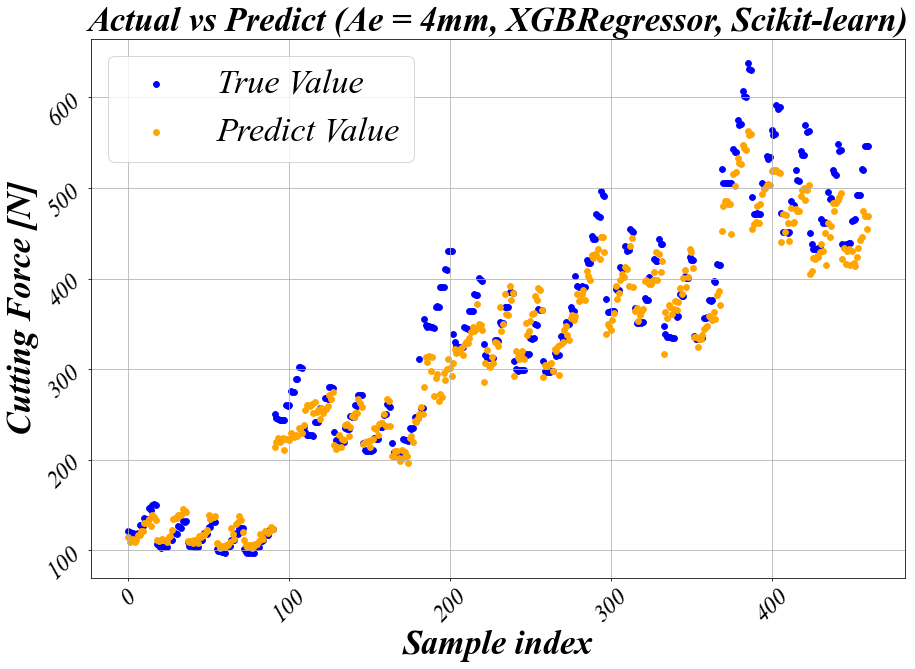

In [13]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 4mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ae4 12800.png")

# Ap

In [49]:
ap_100 = groups_ap.get_group(1)
ap_100 = ap_100.reset_index(drop=True)
ap_100 = ap_100.drop(['Milling_Type'], axis=1)

ap_225 = groups_ap.get_group(2.25)
ap_225 = ap_225.reset_index(drop=True)
ap_225 = ap_225.drop(['Milling_Type'], axis=1)

ap_350 = groups_ap.get_group(3.5)
ap_350 = ap_350.reset_index(drop=True)
ap_350 = ap_350.drop(['Milling_Type'], axis=1)

ap_475 = groups_ap.get_group(4.75)
ap_475 = ap_475.reset_index(drop=True)
ap_475 = ap_475.drop(['Milling_Type'], axis=1)

ap_600 = groups_ap.get_group(6)
ap_600 = ap_600.reset_index(drop=True)
ap_600 = ap_600.drop(['Milling_Type'], axis=1)

## Ap 100

In [50]:
train = pd.concat([ap_225, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [51]:
X_test = ap_100.iloc[: , 1:]
y_test = ap_100['RMS_CF_max']

In [52]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [77]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 75,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:323.94375	validation_0-mape:0.98820	validation_1-rmse:100.94644	validation_1-mape:0.97322
[1]	validation_0-rmse:320.76957	validation_0-mape:0.97830	validation_1-rmse:98.90383	validation_1-mape:0.95182
[2]	validation_0-rmse:317.62698	validation_0-mape:0.96852	validation_1-rmse:96.88317	validation_1-mape:0.93063
[3]	validation_0-rmse:314.51591	validation_0-mape:0.95883	validation_1-rmse:94.88432	validation_1-mape:0.90965
[4]	validation_0-rmse:311.43580	validation_0-mape:0.94924	validation_1-rmse:92.90713	validation_1-mape:0.88889
[5]	validation_0-rmse:308.38647	validation_0-mape:0.93974	validation_1-rmse:90.95148	validation_1-mape:0.86832
[6]	validation_0-rmse:305.36979	validation_0-mape:0.93030	validation_1-rmse:89.01371	validation_1-mape:0.84794
[7]	validation_0-rmse:302.37864	validation_0-mape:0.92097	validation_1-rmse:87.10076	validation_1-mape:0.82778
[8]	validation_0-rmse:299.41972	validation_0-mape:0.91176	validation_1-rmse:85.20552	validation_1-mape:0.80780


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[31]	validation_0-rmse:238.90317	validation_0-mape:0.72321	validation_1-rmse:47.37073	validation_1-mape:0.40144
[32]	validation_0-rmse:236.57132	validation_0-mape:0.71598	validation_1-rmse:45.81622	validation_1-mape:0.38413
[33]	validation_0-rmse:234.26615	validation_0-mape:0.70880	validation_1-rmse:44.29463	validation_1-mape:0.36674
[34]	validation_0-rmse:231.98052	validation_0-mape:0.70172	validation_1-rmse:42.79202	validation_1-mape:0.34977
[35]	validation_0-rmse:229.72071	validation_0-mape:0.69470	validation_1-rmse:41.42422	validation_1-mape:0.33476
[36]	validation_0-rmse:227.47801	validation_0-mape:0.68775	validation_1-rmse:39.97335	validation_1-mape:0.31932
[37]	validation_0-rmse:225.25996	validation_0-mape:0.68088	validation_1-rmse:38.55056	validation_1-mape:0.30519
[38]	validation_0-rmse:223.06507	validation_0-mape:0.67407	validation_1-rmse:37.25521	validation_1-mape:0.29284
[39]	validation_0-rmse:220.89101	validation_0-mape:0.66732	validation_1-rmse:35.88871	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=75, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [78]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 156.9561
Train MAPE: 46.9597
Test RMSE: 21.1457
Test MAPE: 19.3951


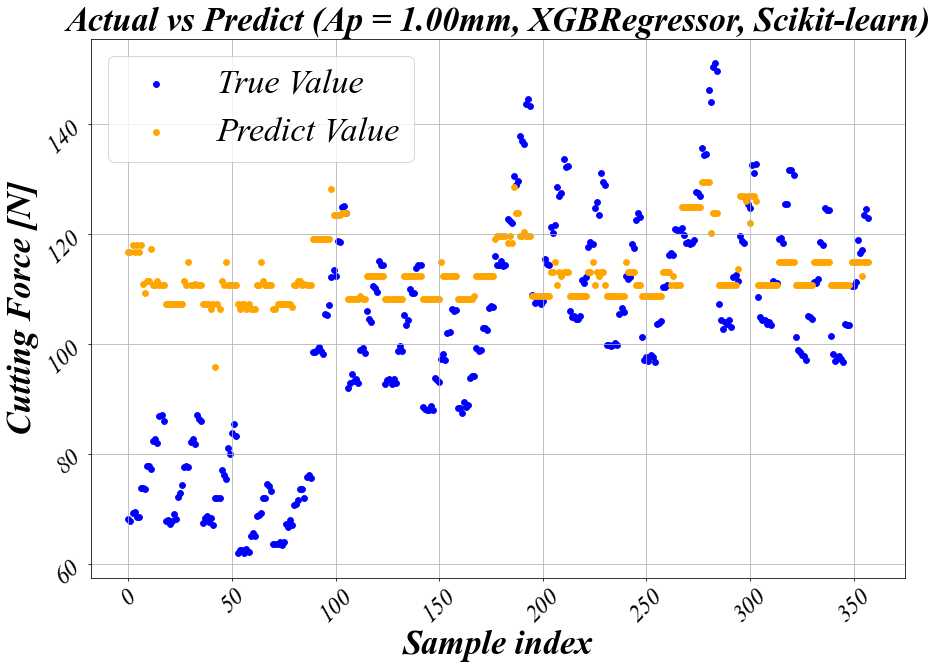

In [80]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 1.00mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ap1 12800.png")

## Ap 225

In [114]:
train = pd.concat([ap_100, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [115]:
X_test = ap_225.iloc[: , 1:]
y_test = ap_225['RMS_CF_max']

In [116]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [117]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 180,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:311.48326	validation_0-mape:0.98755	validation_1-rmse:205.66658	validation_1-mape:0.98309
[1]	validation_0-rmse:308.42845	validation_0-mape:0.97766	validation_1-rmse:202.78458	validation_1-mape:0.96888
[2]	validation_0-rmse:305.40424	validation_0-mape:0.96787	validation_1-rmse:199.93356	validation_1-mape:0.95481
[3]	validation_0-rmse:302.41034	validation_0-mape:0.95817	validation_1-rmse:197.11328	validation_1-mape:0.94087
[4]	validation_0-rmse:299.44645	validation_0-mape:0.94857	validation_1-rmse:194.32350	validation_1-mape:0.92708
[5]	validation_0-rmse:296.51231	validation_0-mape:0.93905	validation_1-rmse:191.56375	validation_1-mape:0.91342
[6]	validation_0-rmse:293.60750	validation_0-mape:0.92964	validation_1-rmse:188.83424	validation_1-mape:0.89990
[7]	validation_0-rmse:290.73123	validation_0-mape:0.92031	validation_1-rmse:186.13723	validation_1-mape:0.88652
[8]	validation_0-rmse:287.88432	validation_0-mape:0.91110	validation_1-rmse:183.46685	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[38]	validation_0-rmse:214.49045	validation_0-mape:0.67393	validation_1-rmse:116.87529	validation_1-mape:0.53686
[39]	validation_0-rmse:212.40407	validation_0-mape:0.66721	validation_1-rmse:115.14929	validation_1-mape:0.52791
[40]	validation_0-rmse:210.33642	validation_0-mape:0.66055	validation_1-rmse:113.57967	validation_1-mape:0.51994
[41]	validation_0-rmse:208.28908	validation_0-mape:0.65396	validation_1-rmse:112.01782	validation_1-mape:0.51201
[42]	validation_0-rmse:206.26419	validation_0-mape:0.64745	validation_1-rmse:110.20545	validation_1-mape:0.50250
[43]	validation_0-rmse:204.25773	validation_0-mape:0.64099	validation_1-rmse:108.65966	validation_1-mape:0.49444
[44]	validation_0-rmse:202.27125	validation_0-mape:0.63459	validation_1-rmse:107.15501	validation_1-mape:0.48678
[45]	validation_0-rmse:200.30565	validation_0-mape:0.62828	validation_1-rmse:105.39873	validation_1-mape:0.47742
[46]	validation_0-rmse:198.35851	validation_0-mape:0.62200	validation_1-rmse:103.89820	validatio

[111]	validation_0-rmse:105.50985	validation_0-mape:0.32439	validation_1-rmse:38.94814	validation_1-mape:0.12583
[112]	validation_0-rmse:104.49689	validation_0-mape:0.32116	validation_1-rmse:38.49568	validation_1-mape:0.12385
[113]	validation_0-rmse:103.49358	validation_0-mape:0.31796	validation_1-rmse:38.04641	validation_1-mape:0.12192
[114]	validation_0-rmse:102.50045	validation_0-mape:0.31479	validation_1-rmse:37.62060	validation_1-mape:0.12018
[115]	validation_0-rmse:101.51694	validation_0-mape:0.31165	validation_1-rmse:37.20398	validation_1-mape:0.11845
[116]	validation_0-rmse:100.54291	validation_0-mape:0.30856	validation_1-rmse:36.80212	validation_1-mape:0.11692
[117]	validation_0-rmse:99.57842	validation_0-mape:0.30548	validation_1-rmse:36.42902	validation_1-mape:0.11569
[118]	validation_0-rmse:98.62340	validation_0-mape:0.30244	validation_1-rmse:36.02474	validation_1-mape:0.11440
[119]	validation_0-rmse:97.67765	validation_0-mape:0.29943	validation_1-rmse:35.63391	validation_1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [118]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 55.0369
Train MAPE: 16.4458
Test RMSE: 32.9516
Test MAPE: 14.7731


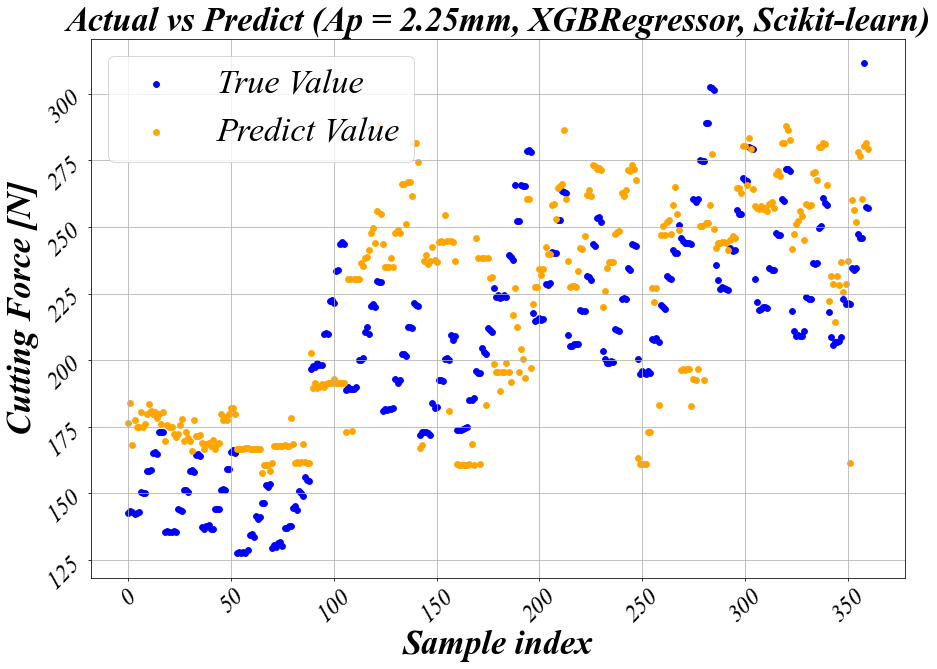

In [119]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 2.25mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ap2.25 12800.png")

## Ap 350

In [120]:
train = pd.concat([ap_100, ap_225, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [121]:
X_test = ap_350.iloc[: , 1:]
y_test = ap_350['RMS_CF_max']

In [122]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [123]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 350,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:293.48418	validation_0-mape:0.98738	validation_1-rmse:292.94630	validation_1-mape:0.98732
[1]	validation_0-rmse:290.61009	validation_0-mape:0.97751	validation_1-rmse:289.85185	validation_1-mape:0.97656
[2]	validation_0-rmse:287.76478	validation_0-mape:0.96773	validation_1-rmse:286.78863	validation_1-mape:0.96590
[3]	validation_0-rmse:284.94796	validation_0-mape:0.95806	validation_1-rmse:283.75629	validation_1-mape:0.95535
[4]	validation_0-rmse:282.15931	validation_0-mape:0.94849	validation_1-rmse:280.75550	validation_1-mape:0.94490
[5]	validation_0-rmse:279.39857	validation_0-mape:0.93903	validation_1-rmse:277.66603	validation_1-mape:0.93425
[6]	validation_0-rmse:276.66519	validation_0-mape:0.92965	validation_1-rmse:274.72881	validation_1-mape:0.92404
[7]	validation_0-rmse:273.95924	validation_0-mape:0.92035	validation_1-rmse:271.69963	validation_1-mape:0.91358
[8]	validation_0-rmse:271.28012	validation_0-mape:0.91118	validation_1-rmse:268.82033	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[34]	validation_0-rmse:210.24083	validation_0-mape:0.70203	validation_1-rmse:202.87855	validation_1-mape:0.67498
[35]	validation_0-rmse:208.19483	validation_0-mape:0.69504	validation_1-rmse:200.58960	validation_1-mape:0.66709
[36]	validation_0-rmse:206.16902	validation_0-mape:0.68809	validation_1-rmse:198.54288	validation_1-mape:0.65985
[37]	validation_0-rmse:204.16314	validation_0-mape:0.68125	validation_1-rmse:196.30804	validation_1-mape:0.65221
[38]	validation_0-rmse:202.17691	validation_0-mape:0.67446	validation_1-rmse:194.15756	validation_1-mape:0.64484
[39]	validation_0-rmse:200.21110	validation_0-mape:0.66774	validation_1-rmse:191.96756	validation_1-mape:0.63735
[40]	validation_0-rmse:198.26401	validation_0-mape:0.66109	validation_1-rmse:190.00592	validation_1-mape:0.63040
[41]	validation_0-rmse:196.33657	validation_0-mape:0.65451	validation_1-rmse:187.92872	validation_1-mape:0.62324
[42]	validation_0-rmse:194.42791	validation_0-mape:0.64800	validation_1-rmse:185.86369	validatio

[107]	validation_0-rmse:103.29969	validation_0-mape:0.33815	validation_1-rmse:89.26222	validation_1-mape:0.28604
[108]	validation_0-rmse:102.30522	validation_0-mape:0.33479	validation_1-rmse:88.32890	validation_1-mape:0.28275
[109]	validation_0-rmse:101.32082	validation_0-mape:0.33146	validation_1-rmse:87.40612	validation_1-mape:0.27956
[110]	validation_0-rmse:100.34641	validation_0-mape:0.32816	validation_1-rmse:86.48831	validation_1-mape:0.27638
[111]	validation_0-rmse:99.38271	validation_0-mape:0.32490	validation_1-rmse:85.50354	validation_1-mape:0.27297
[112]	validation_0-rmse:98.42736	validation_0-mape:0.32168	validation_1-rmse:84.58758	validation_1-mape:0.26980
[113]	validation_0-rmse:97.48252	validation_0-mape:0.31849	validation_1-rmse:83.63027	validation_1-mape:0.26640
[114]	validation_0-rmse:96.54608	validation_0-mape:0.31532	validation_1-rmse:82.75034	validation_1-mape:0.26332
[115]	validation_0-rmse:95.61961	validation_0-mape:0.31219	validation_1-rmse:81.81327	validation_1-m

[181]	validation_0-rmse:50.88264	validation_0-mape:0.16166	validation_1-rmse:40.28670	validation_1-mape:0.11335
[182]	validation_0-rmse:50.40274	validation_0-mape:0.16006	validation_1-rmse:39.82864	validation_1-mape:0.11175
[183]	validation_0-rmse:49.93070	validation_0-mape:0.15848	validation_1-rmse:39.45276	validation_1-mape:0.11038
[184]	validation_0-rmse:49.46158	validation_0-mape:0.15690	validation_1-rmse:39.08696	validation_1-mape:0.10906
[185]	validation_0-rmse:48.99524	validation_0-mape:0.15535	validation_1-rmse:38.68852	validation_1-mape:0.10766
[186]	validation_0-rmse:48.53718	validation_0-mape:0.15380	validation_1-rmse:38.33247	validation_1-mape:0.10635
[187]	validation_0-rmse:48.08343	validation_0-mape:0.15228	validation_1-rmse:37.94911	validation_1-mape:0.10501
[188]	validation_0-rmse:47.63267	validation_0-mape:0.15077	validation_1-rmse:37.60178	validation_1-mape:0.10374
[189]	validation_0-rmse:47.18858	validation_0-mape:0.14927	validation_1-rmse:37.23619	validation_1-mape:

[255]	validation_0-rmse:25.57869	validation_0-mape:0.07745	validation_1-rmse:21.84135	validation_1-mape:0.04941
[256]	validation_0-rmse:25.34863	validation_0-mape:0.07668	validation_1-rmse:21.71268	validation_1-mape:0.04905
[257]	validation_0-rmse:25.11975	validation_0-mape:0.07593	validation_1-rmse:21.59652	validation_1-mape:0.04873
[258]	validation_0-rmse:24.89135	validation_0-mape:0.07518	validation_1-rmse:21.47658	validation_1-mape:0.04840
[259]	validation_0-rmse:24.66736	validation_0-mape:0.07443	validation_1-rmse:21.36475	validation_1-mape:0.04809
[260]	validation_0-rmse:24.44631	validation_0-mape:0.07370	validation_1-rmse:21.25373	validation_1-mape:0.04783
[261]	validation_0-rmse:24.22487	validation_0-mape:0.07298	validation_1-rmse:21.14663	validation_1-mape:0.04757
[262]	validation_0-rmse:24.00570	validation_0-mape:0.07226	validation_1-rmse:21.04206	validation_1-mape:0.04731
[263]	validation_0-rmse:23.78800	validation_0-mape:0.07155	validation_1-rmse:20.93590	validation_1-mape:

[329]	validation_0-rmse:13.33891	validation_0-mape:0.03734	validation_1-rmse:17.49589	validation_1-mape:0.04167
[330]	validation_0-rmse:13.22750	validation_0-mape:0.03698	validation_1-rmse:17.48741	validation_1-mape:0.04170
[331]	validation_0-rmse:13.11717	validation_0-mape:0.03663	validation_1-rmse:17.47796	validation_1-mape:0.04173
[332]	validation_0-rmse:13.00562	validation_0-mape:0.03628	validation_1-rmse:17.46055	validation_1-mape:0.04174
[333]	validation_0-rmse:12.89774	validation_0-mape:0.03593	validation_1-rmse:17.45326	validation_1-mape:0.04178
[334]	validation_0-rmse:12.78844	validation_0-mape:0.03559	validation_1-rmse:17.43738	validation_1-mape:0.04180
[335]	validation_0-rmse:12.68266	validation_0-mape:0.03525	validation_1-rmse:17.43409	validation_1-mape:0.04184
[336]	validation_0-rmse:12.57779	validation_0-mape:0.03491	validation_1-rmse:17.42503	validation_1-mape:0.04188
[337]	validation_0-rmse:12.47371	validation_0-mape:0.03457	validation_1-rmse:17.41243	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=350, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [124]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 11.2960
Train MAPE: 3.0836
Test RMSE: 17.2959
Test MAPE: 4.2292


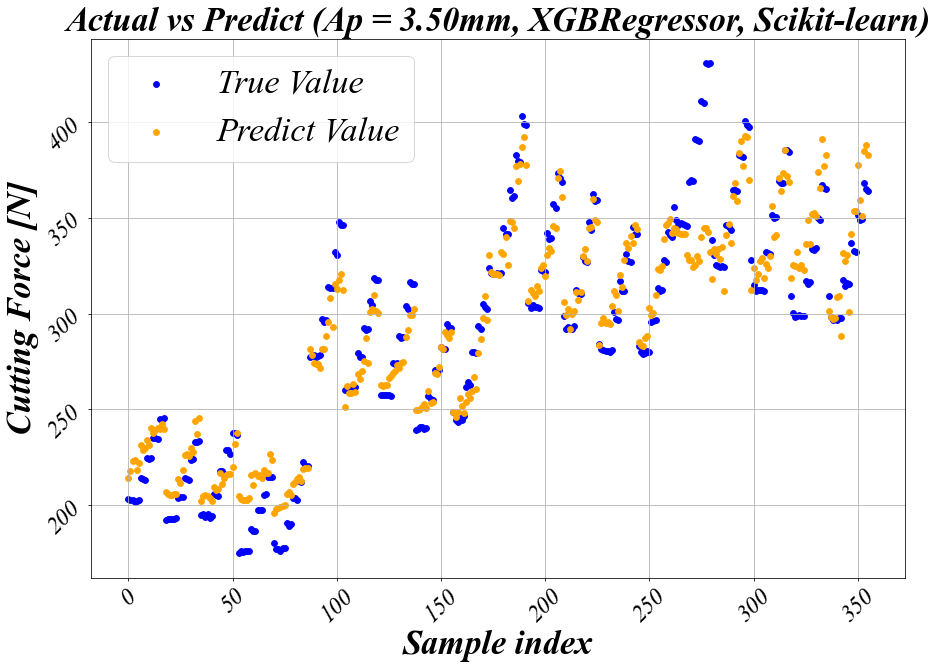

In [125]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 3.50mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ap3.5 12800.png")

## Ap 475

In [126]:
train = pd.concat([ap_100, ap_225, ap_350, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [127]:
X_test = ap_475.iloc[: , 1:]
y_test = ap_475['RMS_CF_max']

In [131]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [132]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:283.75059	validation_0-mape:0.98733	validation_1-rmse:329.41024	validation_1-mape:0.98809
[1]	validation_0-rmse:280.97317	validation_0-mape:0.97745	validation_1-rmse:326.15900	validation_1-mape:0.97788
[2]	validation_0-rmse:278.22354	validation_0-mape:0.96767	validation_1-rmse:322.93769	validation_1-mape:0.96776
[3]	validation_0-rmse:275.49849	validation_0-mape:0.95797	validation_1-rmse:319.76910	validation_1-mape:0.95775
[4]	validation_0-rmse:272.80117	validation_0-mape:0.94837	validation_1-rmse:316.67268	validation_1-mape:0.94796
[5]	validation_0-rmse:270.13094	validation_0-mape:0.93886	validation_1-rmse:313.59631	validation_1-mape:0.93823
[6]	validation_0-rmse:267.48746	validation_0-mape:0.92945	validation_1-rmse:310.50850	validation_1-mape:0.92850
[7]	validation_0-rmse:264.86979	validation_0-mape:0.92014	validation_1-rmse:307.46739	validation_1-mape:0.91887
[8]	validation_0-rmse:262.27867	validation_0-mape:0.91091	validation_1-rmse:304.43018	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[39]	validation_0-rmse:193.55724	validation_0-mape:0.66716	validation_1-rmse:225.41180	validation_1-mape:0.66003
[40]	validation_0-rmse:191.67483	validation_0-mape:0.66051	validation_1-rmse:223.21944	validation_1-mape:0.65319
[41]	validation_0-rmse:189.81041	validation_0-mape:0.65391	validation_1-rmse:221.09078	validation_1-mape:0.64637
[42]	validation_0-rmse:187.96328	validation_0-mape:0.64740	validation_1-rmse:218.91416	validation_1-mape:0.63960
[43]	validation_0-rmse:186.13572	validation_0-mape:0.64093	validation_1-rmse:216.87083	validation_1-mape:0.63304
[44]	validation_0-rmse:184.32416	validation_0-mape:0.63455	validation_1-rmse:214.55300	validation_1-mape:0.62572
[45]	validation_0-rmse:182.53197	validation_0-mape:0.62824	validation_1-rmse:212.57807	validation_1-mape:0.61945
[46]	validation_0-rmse:180.75654	validation_0-mape:0.62199	validation_1-rmse:210.48778	validation_1-mape:0.61293
[47]	validation_0-rmse:179.00055	validation_0-mape:0.61576	validation_1-rmse:208.49283	validatio

[112]	validation_0-rmse:95.23546	validation_0-mape:0.32148	validation_1-rmse:113.50617	validation_1-mape:0.30204
[113]	validation_0-rmse:94.32131	validation_0-mape:0.31829	validation_1-rmse:112.48237	validation_1-mape:0.29857
[114]	validation_0-rmse:93.41683	validation_0-mape:0.31511	validation_1-rmse:111.46574	validation_1-mape:0.29509
[115]	validation_0-rmse:92.51969	validation_0-mape:0.31199	validation_1-rmse:110.47628	validation_1-mape:0.29182
[116]	validation_0-rmse:91.63219	validation_0-mape:0.30889	validation_1-rmse:109.47980	validation_1-mape:0.28853
[117]	validation_0-rmse:90.75388	validation_0-mape:0.30582	validation_1-rmse:108.66087	validation_1-mape:0.28569
[118]	validation_0-rmse:89.88482	validation_0-mape:0.30278	validation_1-rmse:107.71239	validation_1-mape:0.28248
[119]	validation_0-rmse:89.02382	validation_0-mape:0.29977	validation_1-rmse:106.78453	validation_1-mape:0.27934
[120]	validation_0-rmse:88.17147	validation_0-mape:0.29680	validation_1-rmse:105.83873	validatio

[186]	validation_0-rmse:46.96170	validation_0-mape:0.15395	validation_1-rmse:65.27044	validation_1-mape:0.15314
[187]	validation_0-rmse:46.51977	validation_0-mape:0.15243	validation_1-rmse:64.90290	validation_1-mape:0.15222
[188]	validation_0-rmse:46.08332	validation_0-mape:0.15092	validation_1-rmse:64.50871	validation_1-mape:0.15120
[189]	validation_0-rmse:45.64993	validation_0-mape:0.14943	validation_1-rmse:64.15201	validation_1-mape:0.15032
[190]	validation_0-rmse:45.22205	validation_0-mape:0.14796	validation_1-rmse:63.78747	validation_1-mape:0.14941
[191]	validation_0-rmse:44.79759	validation_0-mape:0.14650	validation_1-rmse:63.41158	validation_1-mape:0.14840
[192]	validation_0-rmse:44.37817	validation_0-mape:0.14506	validation_1-rmse:63.04296	validation_1-mape:0.14749
[193]	validation_0-rmse:43.96163	validation_0-mape:0.14363	validation_1-rmse:62.70536	validation_1-mape:0.14663
[194]	validation_0-rmse:43.55042	validation_0-mape:0.14221	validation_1-rmse:62.33266	validation_1-mape:

[260]	validation_0-rmse:23.68704	validation_0-mape:0.07394	validation_1-rmse:47.43603	validation_1-mape:0.11104
[261]	validation_0-rmse:23.47515	validation_0-mape:0.07321	validation_1-rmse:47.31069	validation_1-mape:0.11079
[262]	validation_0-rmse:23.26539	validation_0-mape:0.07248	validation_1-rmse:47.18007	validation_1-mape:0.11053
[263]	validation_0-rmse:23.05798	validation_0-mape:0.07177	validation_1-rmse:47.04316	validation_1-mape:0.11025
[264]	validation_0-rmse:22.85259	validation_0-mape:0.07106	validation_1-rmse:46.90921	validation_1-mape:0.10999
[265]	validation_0-rmse:22.64900	validation_0-mape:0.07036	validation_1-rmse:46.78961	validation_1-mape:0.10973
[266]	validation_0-rmse:22.44750	validation_0-mape:0.06966	validation_1-rmse:46.65666	validation_1-mape:0.10946
[267]	validation_0-rmse:22.24828	validation_0-mape:0.06897	validation_1-rmse:46.52717	validation_1-mape:0.10920
[268]	validation_0-rmse:22.05095	validation_0-mape:0.06829	validation_1-rmse:46.40936	validation_1-mape:

[334]	validation_0-rmse:12.44355	validation_0-mape:0.03565	validation_1-rmse:41.89768	validation_1-mape:0.09994
[335]	validation_0-rmse:12.34003	validation_0-mape:0.03531	validation_1-rmse:41.85296	validation_1-mape:0.09983
[336]	validation_0-rmse:12.23756	validation_0-mape:0.03497	validation_1-rmse:41.83056	validation_1-mape:0.09978
[337]	validation_0-rmse:12.13575	validation_0-mape:0.03463	validation_1-rmse:41.79383	validation_1-mape:0.09970
[338]	validation_0-rmse:12.03526	validation_0-mape:0.03430	validation_1-rmse:41.74862	validation_1-mape:0.09959
[339]	validation_0-rmse:11.93530	validation_0-mape:0.03397	validation_1-rmse:41.71787	validation_1-mape:0.09953
[340]	validation_0-rmse:11.83751	validation_0-mape:0.03364	validation_1-rmse:41.66935	validation_1-mape:0.09941
[341]	validation_0-rmse:11.74017	validation_0-mape:0.03332	validation_1-rmse:41.65007	validation_1-mape:0.09938
[342]	validation_0-rmse:11.64374	validation_0-mape:0.03300	validation_1-rmse:41.62841	validation_1-mape:

[408]	validation_0-rmse:7.03664	validation_0-mape:0.01822	validation_1-rmse:40.28299	validation_1-mape:0.09663
[409]	validation_0-rmse:6.98784	validation_0-mape:0.01808	validation_1-rmse:40.27300	validation_1-mape:0.09661
[410]	validation_0-rmse:6.94040	validation_0-mape:0.01793	validation_1-rmse:40.25989	validation_1-mape:0.09659
[411]	validation_0-rmse:6.89405	validation_0-mape:0.01779	validation_1-rmse:40.25067	validation_1-mape:0.09658
[412]	validation_0-rmse:6.84588	validation_0-mape:0.01765	validation_1-rmse:40.23463	validation_1-mape:0.09655
[413]	validation_0-rmse:6.79914	validation_0-mape:0.01751	validation_1-rmse:40.22544	validation_1-mape:0.09654
[414]	validation_0-rmse:6.75384	validation_0-mape:0.01737	validation_1-rmse:40.21969	validation_1-mape:0.09653
[415]	validation_0-rmse:6.70947	validation_0-mape:0.01724	validation_1-rmse:40.21342	validation_1-mape:0.09653
[416]	validation_0-rmse:6.66442	validation_0-mape:0.01710	validation_1-rmse:40.20563	validation_1-mape:0.09652
[

[482]	validation_0-rmse:4.47999	validation_0-mape:0.01114	validation_1-rmse:39.72956	validation_1-mape:0.09601
[483]	validation_0-rmse:4.45678	validation_0-mape:0.01109	validation_1-rmse:39.71879	validation_1-mape:0.09599
[484]	validation_0-rmse:4.43407	validation_0-mape:0.01104	validation_1-rmse:39.71541	validation_1-mape:0.09599
[485]	validation_0-rmse:4.41084	validation_0-mape:0.01099	validation_1-rmse:39.70559	validation_1-mape:0.09597
[486]	validation_0-rmse:4.38836	validation_0-mape:0.01094	validation_1-rmse:39.69794	validation_1-mape:0.09596
[487]	validation_0-rmse:4.36638	validation_0-mape:0.01089	validation_1-rmse:39.69090	validation_1-mape:0.09594
[488]	validation_0-rmse:4.34461	validation_0-mape:0.01083	validation_1-rmse:39.68991	validation_1-mape:0.09595
[489]	validation_0-rmse:4.32101	validation_0-mape:0.01078	validation_1-rmse:39.68301	validation_1-mape:0.09594
[490]	validation_0-rmse:4.29901	validation_0-mape:0.01073	validation_1-rmse:39.67397	validation_1-mape:0.09592
[

[556]	validation_0-rmse:3.23338	validation_0-mape:0.00862	validation_1-rmse:39.37482	validation_1-mape:0.09542
[557]	validation_0-rmse:3.22051	validation_0-mape:0.00860	validation_1-rmse:39.36890	validation_1-mape:0.09541
[558]	validation_0-rmse:3.20733	validation_0-mape:0.00857	validation_1-rmse:39.36742	validation_1-mape:0.09541
[559]	validation_0-rmse:3.19613	validation_0-mape:0.00855	validation_1-rmse:39.36587	validation_1-mape:0.09541
[560]	validation_0-rmse:3.18456	validation_0-mape:0.00853	validation_1-rmse:39.36164	validation_1-mape:0.09540
[561]	validation_0-rmse:3.17198	validation_0-mape:0.00851	validation_1-rmse:39.35998	validation_1-mape:0.09540
[562]	validation_0-rmse:3.16065	validation_0-mape:0.00849	validation_1-rmse:39.35519	validation_1-mape:0.09539
[563]	validation_0-rmse:3.14926	validation_0-mape:0.00847	validation_1-rmse:39.35605	validation_1-mape:0.09539
[564]	validation_0-rmse:3.13696	validation_0-mape:0.00844	validation_1-rmse:39.35295	validation_1-mape:0.09538
[

[630]	validation_0-rmse:2.55151	validation_0-mape:0.00734	validation_1-rmse:39.27788	validation_1-mape:0.09530
[631]	validation_0-rmse:2.54633	validation_0-mape:0.00732	validation_1-rmse:39.27848	validation_1-mape:0.09531
[632]	validation_0-rmse:2.54105	validation_0-mape:0.00731	validation_1-rmse:39.27662	validation_1-mape:0.09530
[633]	validation_0-rmse:2.53386	validation_0-mape:0.00730	validation_1-rmse:39.27837	validation_1-mape:0.09531
[634]	validation_0-rmse:2.52869	validation_0-mape:0.00729	validation_1-rmse:39.27644	validation_1-mape:0.09530
[635]	validation_0-rmse:2.52093	validation_0-mape:0.00727	validation_1-rmse:39.27766	validation_1-mape:0.09531
[636]	validation_0-rmse:2.51343	validation_0-mape:0.00726	validation_1-rmse:39.27960	validation_1-mape:0.09531
[637]	validation_0-rmse:2.50628	validation_0-mape:0.00725	validation_1-rmse:39.28080	validation_1-mape:0.09531
[638]	validation_0-rmse:2.50090	validation_0-mape:0.00724	validation_1-rmse:39.27878	validation_1-mape:0.09531
[

[704]	validation_0-rmse:2.17321	validation_0-mape:0.00656	validation_1-rmse:39.21639	validation_1-mape:0.09519
[705]	validation_0-rmse:2.16873	validation_0-mape:0.00655	validation_1-rmse:39.21619	validation_1-mape:0.09519
[706]	validation_0-rmse:2.16506	validation_0-mape:0.00654	validation_1-rmse:39.21462	validation_1-mape:0.09519
[707]	validation_0-rmse:2.16261	validation_0-mape:0.00654	validation_1-rmse:39.21423	validation_1-mape:0.09519
[708]	validation_0-rmse:2.15864	validation_0-mape:0.00653	validation_1-rmse:39.21317	validation_1-mape:0.09519
[709]	validation_0-rmse:2.15457	validation_0-mape:0.00652	validation_1-rmse:39.20981	validation_1-mape:0.09518
[710]	validation_0-rmse:2.15127	validation_0-mape:0.00651	validation_1-rmse:39.20849	validation_1-mape:0.09519
[711]	validation_0-rmse:2.14745	validation_0-mape:0.00650	validation_1-rmse:39.20737	validation_1-mape:0.09518
[712]	validation_0-rmse:2.14509	validation_0-mape:0.00650	validation_1-rmse:39.20698	validation_1-mape:0.09518
[

[778]	validation_0-rmse:1.93087	validation_0-mape:0.00603	validation_1-rmse:39.14647	validation_1-mape:0.09509
[779]	validation_0-rmse:1.92837	validation_0-mape:0.00602	validation_1-rmse:39.14489	validation_1-mape:0.09509
[780]	validation_0-rmse:1.92581	validation_0-mape:0.00602	validation_1-rmse:39.14357	validation_1-mape:0.09509
[781]	validation_0-rmse:1.92311	validation_0-mape:0.00601	validation_1-rmse:39.14453	validation_1-mape:0.09509
[782]	validation_0-rmse:1.91946	validation_0-mape:0.00600	validation_1-rmse:39.14246	validation_1-mape:0.09509
[783]	validation_0-rmse:1.91666	validation_0-mape:0.00600	validation_1-rmse:39.14063	validation_1-mape:0.09509
[784]	validation_0-rmse:1.91446	validation_0-mape:0.00599	validation_1-rmse:39.14038	validation_1-mape:0.09509
[785]	validation_0-rmse:1.91170	validation_0-mape:0.00599	validation_1-rmse:39.13954	validation_1-mape:0.09508
[786]	validation_0-rmse:1.90915	validation_0-mape:0.00598	validation_1-rmse:39.13976	validation_1-mape:0.09509
[

[852]	validation_0-rmse:1.75655	validation_0-mape:0.00559	validation_1-rmse:39.11794	validation_1-mape:0.09502
[853]	validation_0-rmse:1.75516	validation_0-mape:0.00559	validation_1-rmse:39.11723	validation_1-mape:0.09502
[854]	validation_0-rmse:1.75246	validation_0-mape:0.00558	validation_1-rmse:39.11632	validation_1-mape:0.09501
[855]	validation_0-rmse:1.75063	validation_0-mape:0.00557	validation_1-rmse:39.11610	validation_1-mape:0.09501
[856]	validation_0-rmse:1.74907	validation_0-mape:0.00557	validation_1-rmse:39.11606	validation_1-mape:0.09501
[857]	validation_0-rmse:1.74749	validation_0-mape:0.00556	validation_1-rmse:39.11606	validation_1-mape:0.09501
[858]	validation_0-rmse:1.74632	validation_0-mape:0.00556	validation_1-rmse:39.11603	validation_1-mape:0.09501
[859]	validation_0-rmse:1.74484	validation_0-mape:0.00555	validation_1-rmse:39.11528	validation_1-mape:0.09501
[860]	validation_0-rmse:1.74305	validation_0-mape:0.00555	validation_1-rmse:39.11506	validation_1-mape:0.09501
[

[926]	validation_0-rmse:1.62215	validation_0-mape:0.00525	validation_1-rmse:39.09717	validation_1-mape:0.09495
[927]	validation_0-rmse:1.62041	validation_0-mape:0.00524	validation_1-rmse:39.09619	validation_1-mape:0.09495
[928]	validation_0-rmse:1.61929	validation_0-mape:0.00524	validation_1-rmse:39.09623	validation_1-mape:0.09495
[929]	validation_0-rmse:1.61791	validation_0-mape:0.00524	validation_1-rmse:39.09595	validation_1-mape:0.09495
[930]	validation_0-rmse:1.61620	validation_0-mape:0.00523	validation_1-rmse:39.09482	validation_1-mape:0.09494
[931]	validation_0-rmse:1.61336	validation_0-mape:0.00522	validation_1-rmse:39.09430	validation_1-mape:0.09494
[932]	validation_0-rmse:1.61249	validation_0-mape:0.00522	validation_1-rmse:39.09459	validation_1-mape:0.09494
[933]	validation_0-rmse:1.61184	validation_0-mape:0.00522	validation_1-rmse:39.09482	validation_1-mape:0.09494
[934]	validation_0-rmse:1.61059	validation_0-mape:0.00522	validation_1-rmse:39.09411	validation_1-mape:0.09494
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [133]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.5222
Train MAPE: 0.4973
Test RMSE: 39.0834
Test MAPE: 9.4903


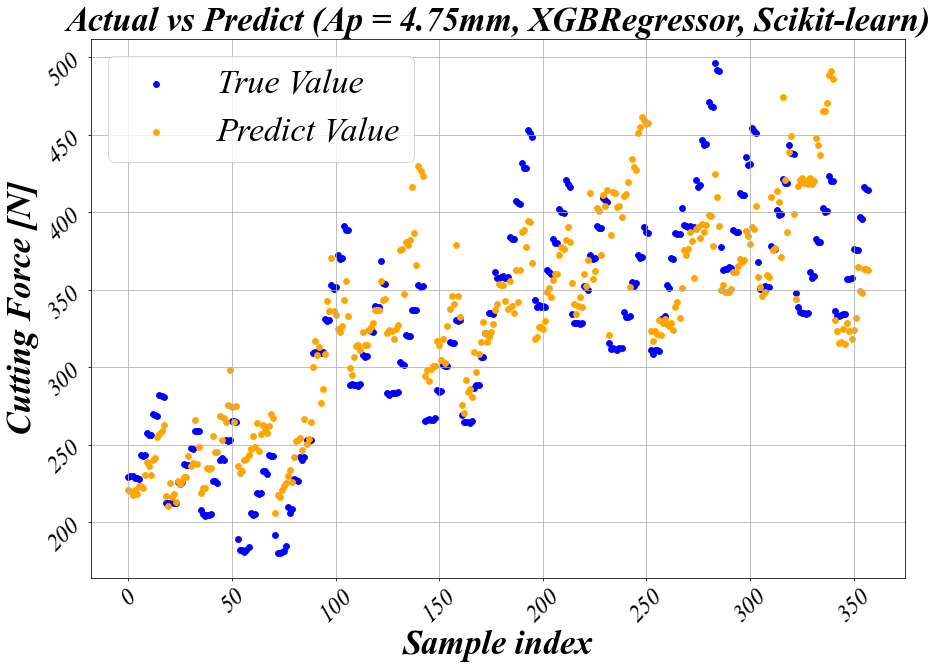

In [134]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 4.75mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ap4.75 12800.png")

## Ap 600

In [135]:
train = pd.concat([ap_100, ap_225, ap_350, ap_475], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [136]:
X_test = ap_600.iloc[: , 1:]
y_test = ap_600['RMS_CF_max']

In [137]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [138]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:248.60954	validation_0-mape:0.98722	validation_1-rmse:427.49688	validation_1-mape:0.99084
[1]	validation_0-rmse:246.16891	validation_0-mape:0.97732	validation_1-rmse:424.22393	validation_1-mape:0.98301
[2]	validation_0-rmse:243.75279	validation_0-mape:0.96753	validation_1-rmse:420.98389	validation_1-mape:0.97526
[3]	validation_0-rmse:241.36093	validation_0-mape:0.95783	validation_1-rmse:417.77641	validation_1-mape:0.96759
[4]	validation_0-rmse:238.99311	validation_0-mape:0.94822	validation_1-rmse:414.60119	validation_1-mape:0.95999
[5]	validation_0-rmse:236.64906	validation_0-mape:0.93873	validation_1-rmse:411.45791	validation_1-mape:0.95247
[6]	validation_0-rmse:234.32856	validation_0-mape:0.92932	validation_1-rmse:408.34624	validation_1-mape:0.94502
[7]	validation_0-rmse:232.03121	validation_0-mape:0.92001	validation_1-rmse:405.26391	validation_1-mape:0.93765
[8]	validation_0-rmse:229.75694	validation_0-mape:0.91078	validation_1-rmse:402.21260	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[40]	validation_0-rmse:167.85096	validation_0-mape:0.66041	validation_1-rmse:320.11344	validation_1-mape:0.73331
[41]	validation_0-rmse:166.21551	validation_0-mape:0.65383	validation_1-rmse:317.91975	validation_1-mape:0.72788
[42]	validation_0-rmse:164.59639	validation_0-mape:0.64731	validation_1-rmse:315.66180	validation_1-mape:0.72248
[43]	validation_0-rmse:162.99295	validation_0-mape:0.64083	validation_1-rmse:313.44416	validation_1-mape:0.71710
[44]	validation_0-rmse:161.40886	validation_0-mape:0.63445	validation_1-rmse:311.37718	validation_1-mape:0.71216
[45]	validation_0-rmse:159.83758	validation_0-mape:0.62813	validation_1-rmse:309.18547	validation_1-mape:0.70692
[46]	validation_0-rmse:158.28155	validation_0-mape:0.62186	validation_1-rmse:306.94515	validation_1-mape:0.70144
[47]	validation_0-rmse:156.74350	validation_0-mape:0.61567	validation_1-rmse:304.91415	validation_1-mape:0.69651
[48]	validation_0-rmse:155.21849	validation_0-mape:0.60954	validation_1-rmse:302.78752	validatio

[113]	validation_0-rmse:82.31902	validation_0-mape:0.31794	validation_1-rmse:203.34953	validation_1-mape:0.45508
[114]	validation_0-rmse:81.52382	validation_0-mape:0.31478	validation_1-rmse:202.29384	validation_1-mape:0.45263
[115]	validation_0-rmse:80.73703	validation_0-mape:0.31165	validation_1-rmse:201.23693	validation_1-mape:0.45016
[116]	validation_0-rmse:79.95807	validation_0-mape:0.30854	validation_1-rmse:200.14946	validation_1-mape:0.44765
[117]	validation_0-rmse:79.18643	validation_0-mape:0.30547	validation_1-rmse:199.11976	validation_1-mape:0.44525
[118]	validation_0-rmse:78.42307	validation_0-mape:0.30243	validation_1-rmse:198.09280	validation_1-mape:0.44285
[119]	validation_0-rmse:77.66536	validation_0-mape:0.29942	validation_1-rmse:197.07811	validation_1-mape:0.44051
[120]	validation_0-rmse:76.91728	validation_0-mape:0.29645	validation_1-rmse:195.97620	validation_1-mape:0.43798
[121]	validation_0-rmse:76.17571	validation_0-mape:0.29350	validation_1-rmse:195.00979	validatio

[186]	validation_0-rmse:40.81930	validation_0-mape:0.15370	validation_1-rmse:145.92756	validation_1-mape:0.32211
[187]	validation_0-rmse:40.43358	validation_0-mape:0.15218	validation_1-rmse:145.38016	validation_1-mape:0.32086
[188]	validation_0-rmse:40.05247	validation_0-mape:0.15068	validation_1-rmse:144.85212	validation_1-mape:0.31963
[189]	validation_0-rmse:39.67442	validation_0-mape:0.14919	validation_1-rmse:144.30880	validation_1-mape:0.31837
[190]	validation_0-rmse:39.30027	validation_0-mape:0.14772	validation_1-rmse:143.78638	validation_1-mape:0.31716
[191]	validation_0-rmse:38.92942	validation_0-mape:0.14626	validation_1-rmse:143.26169	validation_1-mape:0.31591
[192]	validation_0-rmse:38.56257	validation_0-mape:0.14481	validation_1-rmse:142.76115	validation_1-mape:0.31472
[193]	validation_0-rmse:38.19935	validation_0-mape:0.14338	validation_1-rmse:142.25722	validation_1-mape:0.31350
[194]	validation_0-rmse:37.83964	validation_0-mape:0.14197	validation_1-rmse:141.73165	validatio

[259]	validation_0-rmse:20.67755	validation_0-mape:0.07457	validation_1-rmse:117.18200	validation_1-mape:0.25436
[260]	validation_0-rmse:20.49005	validation_0-mape:0.07383	validation_1-rmse:116.89071	validation_1-mape:0.25366
[261]	validation_0-rmse:20.30493	validation_0-mape:0.07311	validation_1-rmse:116.61180	validation_1-mape:0.25300
[262]	validation_0-rmse:20.12044	validation_0-mape:0.07239	validation_1-rmse:116.36940	validation_1-mape:0.25242
[263]	validation_0-rmse:19.93830	validation_0-mape:0.07167	validation_1-rmse:116.09863	validation_1-mape:0.25178
[264]	validation_0-rmse:19.75824	validation_0-mape:0.07097	validation_1-rmse:115.82387	validation_1-mape:0.25113
[265]	validation_0-rmse:19.57948	validation_0-mape:0.07026	validation_1-rmse:115.56021	validation_1-mape:0.25049
[266]	validation_0-rmse:19.40298	validation_0-mape:0.06957	validation_1-rmse:115.29852	validation_1-mape:0.24987
[267]	validation_0-rmse:19.22887	validation_0-mape:0.06889	validation_1-rmse:115.04663	validatio

[332]	validation_0-rmse:10.87693	validation_0-mape:0.03637	validation_1-rmse:102.89896	validation_1-mape:0.21991
[333]	validation_0-rmse:10.78539	validation_0-mape:0.03602	validation_1-rmse:102.76306	validation_1-mape:0.21958
[334]	validation_0-rmse:10.69427	validation_0-mape:0.03567	validation_1-rmse:102.63438	validation_1-mape:0.21928
[335]	validation_0-rmse:10.60481	validation_0-mape:0.03533	validation_1-rmse:102.50055	validation_1-mape:0.21896
[336]	validation_0-rmse:10.51527	validation_0-mape:0.03499	validation_1-rmse:102.37645	validation_1-mape:0.21869
[337]	validation_0-rmse:10.42694	validation_0-mape:0.03466	validation_1-rmse:102.25065	validation_1-mape:0.21839
[338]	validation_0-rmse:10.33921	validation_0-mape:0.03432	validation_1-rmse:102.12280	validation_1-mape:0.21810
[339]	validation_0-rmse:10.25301	validation_0-mape:0.03399	validation_1-rmse:101.99334	validation_1-mape:0.21779
[340]	validation_0-rmse:10.16706	validation_0-mape:0.03367	validation_1-rmse:101.87733	validatio

[406]	validation_0-rmse:6.06929	validation_0-mape:0.01854	validation_1-rmse:95.42685	validation_1-mape:0.20203
[407]	validation_0-rmse:6.02573	validation_0-mape:0.01839	validation_1-rmse:95.35895	validation_1-mape:0.20188
[408]	validation_0-rmse:5.98419	validation_0-mape:0.01824	validation_1-rmse:95.27492	validation_1-mape:0.20168
[409]	validation_0-rmse:5.94055	validation_0-mape:0.01809	validation_1-rmse:95.21865	validation_1-mape:0.20154
[410]	validation_0-rmse:5.89680	validation_0-mape:0.01794	validation_1-rmse:95.15578	validation_1-mape:0.20140
[411]	validation_0-rmse:5.85501	validation_0-mape:0.01779	validation_1-rmse:95.09101	validation_1-mape:0.20126
[412]	validation_0-rmse:5.81513	validation_0-mape:0.01765	validation_1-rmse:95.02100	validation_1-mape:0.20108
[413]	validation_0-rmse:5.77418	validation_0-mape:0.01751	validation_1-rmse:94.94896	validation_1-mape:0.20090
[414]	validation_0-rmse:5.73423	validation_0-mape:0.01737	validation_1-rmse:94.86611	validation_1-mape:0.20070
[

[480]	validation_0-rmse:3.76787	validation_0-mape:0.01107	validation_1-rmse:91.60359	validation_1-mape:0.19324
[481]	validation_0-rmse:3.74745	validation_0-mape:0.01101	validation_1-rmse:91.56067	validation_1-mape:0.19314
[482]	validation_0-rmse:3.72719	validation_0-mape:0.01095	validation_1-rmse:91.52741	validation_1-mape:0.19307
[483]	validation_0-rmse:3.70723	validation_0-mape:0.01089	validation_1-rmse:91.48510	validation_1-mape:0.19297
[484]	validation_0-rmse:3.68575	validation_0-mape:0.01083	validation_1-rmse:91.44898	validation_1-mape:0.19290
[485]	validation_0-rmse:3.66598	validation_0-mape:0.01078	validation_1-rmse:91.40912	validation_1-mape:0.19280
[486]	validation_0-rmse:3.64607	validation_0-mape:0.01072	validation_1-rmse:91.36783	validation_1-mape:0.19271
[487]	validation_0-rmse:3.62700	validation_0-mape:0.01066	validation_1-rmse:91.32950	validation_1-mape:0.19262
[488]	validation_0-rmse:3.60817	validation_0-mape:0.01061	validation_1-rmse:91.30049	validation_1-mape:0.19255
[

[554]	validation_0-rmse:2.62564	validation_0-mape:0.00818	validation_1-rmse:89.32446	validation_1-mape:0.18813
[555]	validation_0-rmse:2.61485	validation_0-mape:0.00816	validation_1-rmse:89.30769	validation_1-mape:0.18809
[556]	validation_0-rmse:2.60438	validation_0-mape:0.00814	validation_1-rmse:89.28029	validation_1-mape:0.18803
[557]	validation_0-rmse:2.59340	validation_0-mape:0.00811	validation_1-rmse:89.25563	validation_1-mape:0.18797
[558]	validation_0-rmse:2.58238	validation_0-mape:0.00808	validation_1-rmse:89.23338	validation_1-mape:0.18792
[559]	validation_0-rmse:2.57167	validation_0-mape:0.00806	validation_1-rmse:89.20911	validation_1-mape:0.18787
[560]	validation_0-rmse:2.56125	validation_0-mape:0.00804	validation_1-rmse:89.19487	validation_1-mape:0.18783
[561]	validation_0-rmse:2.55046	validation_0-mape:0.00801	validation_1-rmse:89.17107	validation_1-mape:0.18778
[562]	validation_0-rmse:2.54033	validation_0-mape:0.00799	validation_1-rmse:89.15192	validation_1-mape:0.18774
[

[628]	validation_0-rmse:2.07022	validation_0-mape:0.00683	validation_1-rmse:88.23050	validation_1-mape:0.18568
[629]	validation_0-rmse:2.06487	validation_0-mape:0.00682	validation_1-rmse:88.21461	validation_1-mape:0.18565
[630]	validation_0-rmse:2.06013	validation_0-mape:0.00681	validation_1-rmse:88.20293	validation_1-mape:0.18562
[631]	validation_0-rmse:2.05479	validation_0-mape:0.00679	validation_1-rmse:88.18761	validation_1-mape:0.18559
[632]	validation_0-rmse:2.04953	validation_0-mape:0.00678	validation_1-rmse:88.17236	validation_1-mape:0.18555
[633]	validation_0-rmse:2.04370	validation_0-mape:0.00677	validation_1-rmse:88.16082	validation_1-mape:0.18553
[634]	validation_0-rmse:2.03789	validation_0-mape:0.00675	validation_1-rmse:88.15021	validation_1-mape:0.18551
[635]	validation_0-rmse:2.03326	validation_0-mape:0.00674	validation_1-rmse:88.13493	validation_1-mape:0.18547
[636]	validation_0-rmse:2.02864	validation_0-mape:0.00672	validation_1-rmse:88.12462	validation_1-mape:0.18545
[

[702]	validation_0-rmse:1.74995	validation_0-mape:0.00598	validation_1-rmse:87.50352	validation_1-mape:0.18403
[703]	validation_0-rmse:1.74717	validation_0-mape:0.00597	validation_1-rmse:87.49614	validation_1-mape:0.18402
[704]	validation_0-rmse:1.74469	validation_0-mape:0.00596	validation_1-rmse:87.49055	validation_1-mape:0.18400
[705]	validation_0-rmse:1.74063	validation_0-mape:0.00595	validation_1-rmse:87.48368	validation_1-mape:0.18399
[706]	validation_0-rmse:1.73800	validation_0-mape:0.00595	validation_1-rmse:87.47740	validation_1-mape:0.18397
[707]	validation_0-rmse:1.73323	validation_0-mape:0.00594	validation_1-rmse:87.47314	validation_1-mape:0.18397
[708]	validation_0-rmse:1.73023	validation_0-mape:0.00593	validation_1-rmse:87.46153	validation_1-mape:0.18394
[709]	validation_0-rmse:1.72771	validation_0-mape:0.00592	validation_1-rmse:87.45383	validation_1-mape:0.18392
[710]	validation_0-rmse:1.72531	validation_0-mape:0.00591	validation_1-rmse:87.44904	validation_1-mape:0.18391
[

[776]	validation_0-rmse:1.55256	validation_0-mape:0.00543	validation_1-rmse:87.12570	validation_1-mape:0.18319
[777]	validation_0-rmse:1.55088	validation_0-mape:0.00542	validation_1-rmse:87.12250	validation_1-mape:0.18319
[778]	validation_0-rmse:1.54943	validation_0-mape:0.00542	validation_1-rmse:87.11991	validation_1-mape:0.18318
[779]	validation_0-rmse:1.54759	validation_0-mape:0.00541	validation_1-rmse:87.11675	validation_1-mape:0.18318
[780]	validation_0-rmse:1.54443	validation_0-mape:0.00540	validation_1-rmse:87.11065	validation_1-mape:0.18316
[781]	validation_0-rmse:1.54299	validation_0-mape:0.00540	validation_1-rmse:87.10768	validation_1-mape:0.18315
[782]	validation_0-rmse:1.54160	validation_0-mape:0.00540	validation_1-rmse:87.10554	validation_1-mape:0.18315
[783]	validation_0-rmse:1.53925	validation_0-mape:0.00539	validation_1-rmse:87.09871	validation_1-mape:0.18313
[784]	validation_0-rmse:1.53747	validation_0-mape:0.00538	validation_1-rmse:87.09583	validation_1-mape:0.18313
[

[850]	validation_0-rmse:1.41937	validation_0-mape:0.00504	validation_1-rmse:86.89385	validation_1-mape:0.18267
[851]	validation_0-rmse:1.41828	validation_0-mape:0.00504	validation_1-rmse:86.89227	validation_1-mape:0.18267
[852]	validation_0-rmse:1.41628	validation_0-mape:0.00503	validation_1-rmse:86.88759	validation_1-mape:0.18266
[853]	validation_0-rmse:1.41491	validation_0-mape:0.00503	validation_1-rmse:86.88458	validation_1-mape:0.18265
[854]	validation_0-rmse:1.41338	validation_0-mape:0.00503	validation_1-rmse:86.88283	validation_1-mape:0.18265
[855]	validation_0-rmse:1.41147	validation_0-mape:0.00502	validation_1-rmse:86.88078	validation_1-mape:0.18264
[856]	validation_0-rmse:1.41033	validation_0-mape:0.00501	validation_1-rmse:86.87918	validation_1-mape:0.18264
[857]	validation_0-rmse:1.40870	validation_0-mape:0.00501	validation_1-rmse:86.87632	validation_1-mape:0.18263
[858]	validation_0-rmse:1.40655	validation_0-mape:0.00500	validation_1-rmse:86.87342	validation_1-mape:0.18263
[

[924]	validation_0-rmse:1.31071	validation_0-mape:0.00472	validation_1-rmse:86.76378	validation_1-mape:0.18235
[925]	validation_0-rmse:1.30912	validation_0-mape:0.00471	validation_1-rmse:86.75932	validation_1-mape:0.18234
[926]	validation_0-rmse:1.30822	validation_0-mape:0.00471	validation_1-rmse:86.75554	validation_1-mape:0.18233
[927]	validation_0-rmse:1.30710	validation_0-mape:0.00471	validation_1-rmse:86.75392	validation_1-mape:0.18233
[928]	validation_0-rmse:1.30519	validation_0-mape:0.00470	validation_1-rmse:86.75191	validation_1-mape:0.18232
[929]	validation_0-rmse:1.30439	validation_0-mape:0.00470	validation_1-rmse:86.75202	validation_1-mape:0.18232
[930]	validation_0-rmse:1.30219	validation_0-mape:0.00469	validation_1-rmse:86.75078	validation_1-mape:0.18232
[931]	validation_0-rmse:1.30110	validation_0-mape:0.00469	validation_1-rmse:86.74843	validation_1-mape:0.18231
[932]	validation_0-rmse:1.29938	validation_0-mape:0.00468	validation_1-rmse:86.74260	validation_1-mape:0.18230
[

[998]	validation_0-rmse:1.21777	validation_0-mape:0.00443	validation_1-rmse:86.67943	validation_1-mape:0.18214
[999]	validation_0-rmse:1.21608	validation_0-mape:0.00442	validation_1-rmse:86.67962	validation_1-mape:0.18214


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [139]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.2161
Train MAPE: 0.4423
Test RMSE: 86.6796
Test MAPE: 18.2144


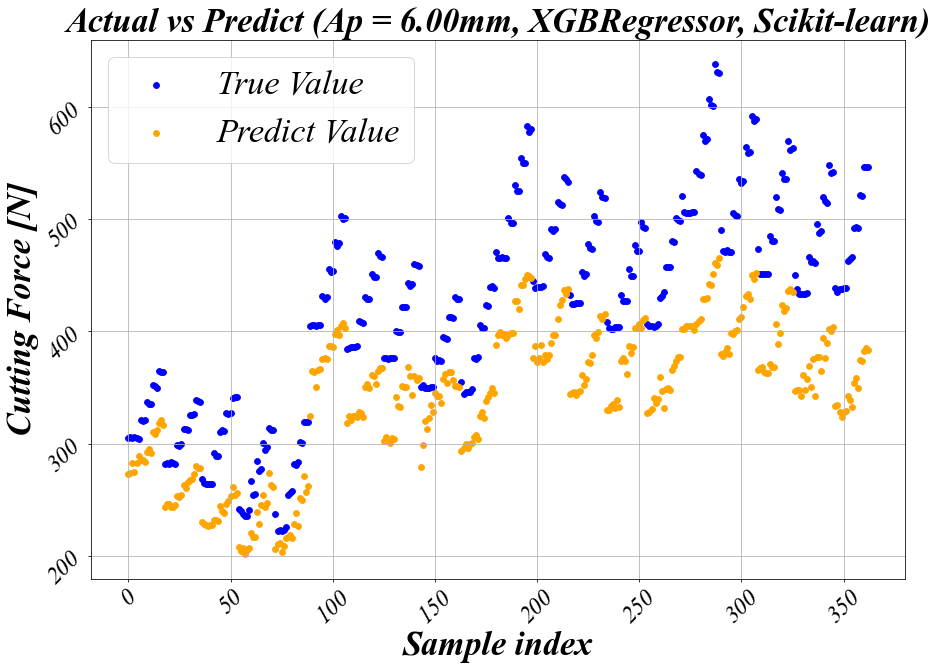

In [140]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 6.00mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning Ap6.0 12800.png")

# Feed

In [141]:
feed_300 = groups_feed.get_group(300)
feed_300 = feed_300.reset_index(drop=True)
feed_300 = feed_300.drop(['Milling_Type'], axis=1)

feed_350 = groups_feed.get_group(350)
feed_350 = feed_350.reset_index(drop=True)
feed_350 = feed_350.drop(['Milling_Type'], axis=1)

feed_400 = groups_feed.get_group(400)
feed_400 = feed_400.reset_index(drop=True)
feed_400 = feed_400.drop(['Milling_Type'], axis=1)

feed_450 = groups_feed.get_group(450)
feed_450 = feed_450.reset_index(drop=True)
feed_450 = feed_450.drop(['Milling_Type'], axis=1)

feed_500 = groups_feed.get_group(500)
feed_500 = feed_500.reset_index(drop=True)
feed_500 = feed_500.drop(['Milling_Type'], axis=1)

## feed 300

In [166]:
train = pd.concat([feed_350, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [167]:
X_test = feed_300.iloc[: , 1:]
y_test = feed_300['RMS_CF_max']

In [168]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [169]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 300,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:307.02431	validation_0-mape:0.98770	validation_1-rmse:265.83842	validation_1-mape:0.98621
[1]	validation_0-rmse:304.01709	validation_0-mape:0.97785	validation_1-rmse:262.87536	validation_1-mape:0.97507
[2]	validation_0-rmse:301.03957	validation_0-mape:0.96810	validation_1-rmse:259.99840	validation_1-mape:0.96419
[3]	validation_0-rmse:298.09206	validation_0-mape:0.95844	validation_1-rmse:257.09442	validation_1-mape:0.95327
[4]	validation_0-rmse:295.17360	validation_0-mape:0.94889	validation_1-rmse:254.27500	validation_1-mape:0.94261
[5]	validation_0-rmse:292.28464	validation_0-mape:0.93942	validation_1-rmse:251.42895	validation_1-mape:0.93190
[6]	validation_0-rmse:289.42409	validation_0-mape:0.93006	validation_1-rmse:248.66597	validation_1-mape:0.92145
[7]	validation_0-rmse:286.59210	validation_0-mape:0.92079	validation_1-rmse:245.93075	validation_1-mape:0.91110
[8]	validation_0-rmse:283.78875	validation_0-mape:0.91159	validation_1-rmse:243.18954	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[43]	validation_0-rmse:201.41177	validation_0-mape:0.64164	validation_1-rmse:163.73150	validation_1-mape:0.59963
[44]	validation_0-rmse:199.45637	validation_0-mape:0.63522	validation_1-rmse:161.85172	validation_1-mape:0.59252
[45]	validation_0-rmse:197.51794	validation_0-mape:0.62888	validation_1-rmse:159.99102	validation_1-mape:0.58542
[46]	validation_0-rmse:195.59903	validation_0-mape:0.62260	validation_1-rmse:158.17852	validation_1-mape:0.57842
[47]	validation_0-rmse:193.70103	validation_0-mape:0.61640	validation_1-rmse:156.40052	validation_1-mape:0.57166
[48]	validation_0-rmse:191.82028	validation_0-mape:0.61023	validation_1-rmse:154.62477	validation_1-mape:0.56479
[49]	validation_0-rmse:189.95868	validation_0-mape:0.60416	validation_1-rmse:152.88599	validation_1-mape:0.55812
[50]	validation_0-rmse:188.11597	validation_0-mape:0.59811	validation_1-rmse:151.14628	validation_1-mape:0.55151
[51]	validation_0-rmse:186.29144	validation_0-mape:0.59213	validation_1-rmse:149.43187	validatio

[116]	validation_0-rmse:99.32218	validation_0-mape:0.30929	validation_1-rmse:70.53361	validation_1-mape:0.24693
[117]	validation_0-rmse:98.37476	validation_0-mape:0.30623	validation_1-rmse:69.70749	validation_1-mape:0.24379
[118]	validation_0-rmse:97.43675	validation_0-mape:0.30320	validation_1-rmse:68.90325	validation_1-mape:0.24083
[119]	validation_0-rmse:96.50535	validation_0-mape:0.30018	validation_1-rmse:68.10975	validation_1-mape:0.23780
[120]	validation_0-rmse:95.58301	validation_0-mape:0.29720	validation_1-rmse:67.35626	validation_1-mape:0.23488
[121]	validation_0-rmse:94.66986	validation_0-mape:0.29424	validation_1-rmse:66.60462	validation_1-mape:0.23190
[122]	validation_0-rmse:93.76751	validation_0-mape:0.29132	validation_1-rmse:65.83485	validation_1-mape:0.22897
[123]	validation_0-rmse:92.87490	validation_0-mape:0.28844	validation_1-rmse:65.06642	validation_1-mape:0.22607
[124]	validation_0-rmse:91.98808	validation_0-mape:0.28557	validation_1-rmse:64.33403	validation_1-mape:

[190]	validation_0-rmse:49.17630	validation_0-mape:0.14798	validation_1-rmse:30.29459	validation_1-mape:0.09278
[191]	validation_0-rmse:48.71600	validation_0-mape:0.14652	validation_1-rmse:29.96545	validation_1-mape:0.09154
[192]	validation_0-rmse:48.26196	validation_0-mape:0.14507	validation_1-rmse:29.64937	validation_1-mape:0.09037
[193]	validation_0-rmse:47.81424	validation_0-mape:0.14364	validation_1-rmse:29.33634	validation_1-mape:0.08920
[194]	validation_0-rmse:47.36944	validation_0-mape:0.14222	validation_1-rmse:29.02682	validation_1-mape:0.08801
[195]	validation_0-rmse:46.92829	validation_0-mape:0.14082	validation_1-rmse:28.70742	validation_1-mape:0.08685
[196]	validation_0-rmse:46.49029	validation_0-mape:0.13943	validation_1-rmse:28.39356	validation_1-mape:0.08570
[197]	validation_0-rmse:46.05619	validation_0-mape:0.13805	validation_1-rmse:28.07974	validation_1-mape:0.08453
[198]	validation_0-rmse:45.62825	validation_0-mape:0.13669	validation_1-rmse:27.79207	validation_1-mape:

[264]	validation_0-rmse:24.85799	validation_0-mape:0.07121	validation_1-rmse:15.90507	validation_1-mape:0.04227
[265]	validation_0-rmse:24.63440	validation_0-mape:0.07051	validation_1-rmse:15.82898	validation_1-mape:0.04208
[266]	validation_0-rmse:24.41185	validation_0-mape:0.06982	validation_1-rmse:15.74250	validation_1-mape:0.04188
[267]	validation_0-rmse:24.19153	validation_0-mape:0.06913	validation_1-rmse:15.64097	validation_1-mape:0.04168
[268]	validation_0-rmse:23.97445	validation_0-mape:0.06846	validation_1-rmse:15.56693	validation_1-mape:0.04151
[269]	validation_0-rmse:23.75813	validation_0-mape:0.06778	validation_1-rmse:15.49010	validation_1-mape:0.04133
[270]	validation_0-rmse:23.54430	validation_0-mape:0.06712	validation_1-rmse:15.41125	validation_1-mape:0.04114
[271]	validation_0-rmse:23.33351	validation_0-mape:0.06646	validation_1-rmse:15.34599	validation_1-mape:0.04098
[272]	validation_0-rmse:23.12372	validation_0-mape:0.06580	validation_1-rmse:15.25547	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [170]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 18.1693
Train MAPE: 5.0428
Test RMSE: 13.9748
Test MAPE: 3.9260


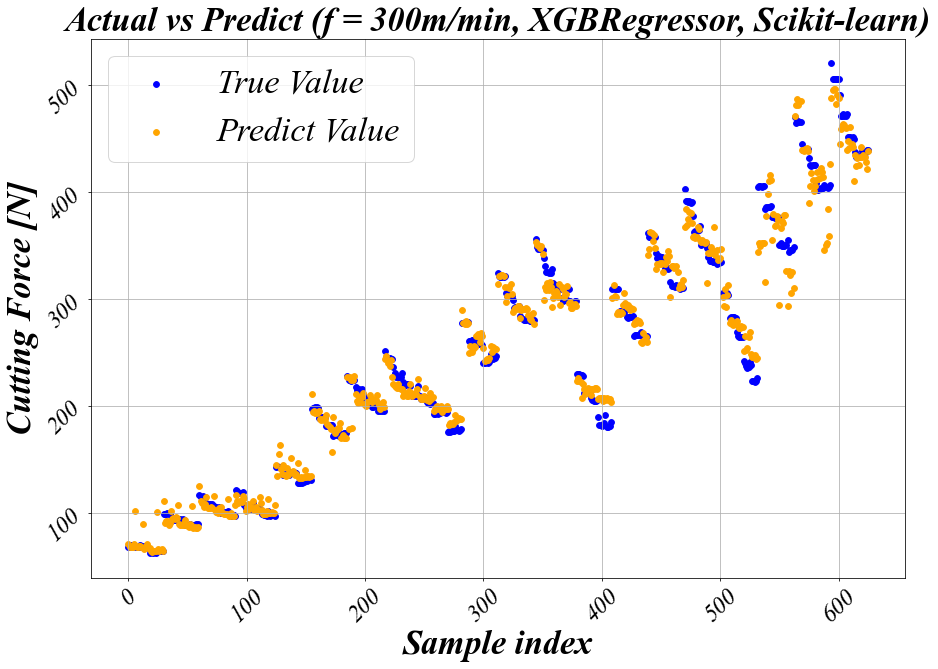

In [171]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 300m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning feed300 12800.png")

## feed 350

In [172]:
train = pd.concat([feed_300, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [173]:
X_test = feed_350.iloc[: , 1:]
y_test = feed_350['RMS_CF_max']

In [174]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [175]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 400,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:295.54492	validation_0-mape:0.98753	validation_1-rmse:282.91816	validation_1-mape:0.98709
[1]	validation_0-rmse:292.65392	validation_0-mape:0.97765	validation_1-rmse:280.05288	validation_1-mape:0.97685
[2]	validation_0-rmse:289.79185	validation_0-mape:0.96787	validation_1-rmse:277.21618	validation_1-mape:0.96672
[3]	validation_0-rmse:286.95964	validation_0-mape:0.95815	validation_1-rmse:274.40669	validation_1-mape:0.95664
[4]	validation_0-rmse:284.15450	validation_0-mape:0.94856	validation_1-rmse:271.60889	validation_1-mape:0.94668
[5]	validation_0-rmse:281.37512	validation_0-mape:0.93906	validation_1-rmse:268.83695	validation_1-mape:0.93675
[6]	validation_0-rmse:278.62686	validation_0-mape:0.92965	validation_1-rmse:266.10845	validation_1-mape:0.92698
[7]	validation_0-rmse:275.90248	validation_0-mape:0.92035	validation_1-rmse:263.32266	validation_1-mape:0.91715
[8]	validation_0-rmse:273.20747	validation_0-mape:0.91113	validation_1-rmse:260.64477	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[39]	validation_0-rmse:201.71157	validation_0-mape:0.66701	validation_1-rmse:188.84390	validation_1-mape:0.65258
[40]	validation_0-rmse:199.75316	validation_0-mape:0.66034	validation_1-rmse:186.89814	validation_1-mape:0.64558
[41]	validation_0-rmse:197.81510	validation_0-mape:0.65373	validation_1-rmse:184.97547	validation_1-mape:0.63877
[42]	validation_0-rmse:195.89529	validation_0-mape:0.64721	validation_1-rmse:183.06416	validation_1-mape:0.63193
[43]	validation_0-rmse:193.99301	validation_0-mape:0.64074	validation_1-rmse:181.16796	validation_1-mape:0.62526
[44]	validation_0-rmse:192.11096	validation_0-mape:0.63434	validation_1-rmse:179.32999	validation_1-mape:0.61870
[45]	validation_0-rmse:190.24153	validation_0-mape:0.62800	validation_1-rmse:177.44335	validation_1-mape:0.61212
[46]	validation_0-rmse:188.39549	validation_0-mape:0.62173	validation_1-rmse:175.60016	validation_1-mape:0.60555
[47]	validation_0-rmse:186.56275	validation_0-mape:0.61553	validation_1-rmse:173.77489	validatio

[112]	validation_0-rmse:99.29354	validation_0-mape:0.32113	validation_1-rmse:87.49632	validation_1-mape:0.29761
[113]	validation_0-rmse:98.34303	validation_0-mape:0.31794	validation_1-rmse:86.59960	validation_1-mape:0.29442
[114]	validation_0-rmse:97.40238	validation_0-mape:0.31478	validation_1-rmse:85.68906	validation_1-mape:0.29124
[115]	validation_0-rmse:96.47192	validation_0-mape:0.31165	validation_1-rmse:84.78273	validation_1-mape:0.28804
[116]	validation_0-rmse:95.54928	validation_0-mape:0.30855	validation_1-rmse:83.91047	validation_1-mape:0.28496
[117]	validation_0-rmse:94.63465	validation_0-mape:0.30549	validation_1-rmse:83.03468	validation_1-mape:0.28194
[118]	validation_0-rmse:93.72961	validation_0-mape:0.30246	validation_1-rmse:82.18438	validation_1-mape:0.27895
[119]	validation_0-rmse:92.83436	validation_0-mape:0.29945	validation_1-rmse:81.33448	validation_1-mape:0.27593
[120]	validation_0-rmse:91.94562	validation_0-mape:0.29648	validation_1-rmse:80.43769	validation_1-mape:

[186]	validation_0-rmse:49.06105	validation_0-mape:0.15347	validation_1-rmse:39.67159	validation_1-mape:0.12956
[187]	validation_0-rmse:48.60398	validation_0-mape:0.15194	validation_1-rmse:39.25940	validation_1-mape:0.12808
[188]	validation_0-rmse:48.14991	validation_0-mape:0.15044	validation_1-rmse:38.81344	validation_1-mape:0.12652
[189]	validation_0-rmse:47.70077	validation_0-mape:0.14894	validation_1-rmse:38.38582	validation_1-mape:0.12500
[190]	validation_0-rmse:47.25502	validation_0-mape:0.14746	validation_1-rmse:37.97239	validation_1-mape:0.12357
[191]	validation_0-rmse:46.81434	validation_0-mape:0.14600	validation_1-rmse:37.54250	validation_1-mape:0.12209
[192]	validation_0-rmse:46.37759	validation_0-mape:0.14455	validation_1-rmse:37.13907	validation_1-mape:0.12069
[193]	validation_0-rmse:45.94545	validation_0-mape:0.14312	validation_1-rmse:36.73327	validation_1-mape:0.11928
[194]	validation_0-rmse:45.51808	validation_0-mape:0.14170	validation_1-rmse:36.31538	validation_1-mape:

[260]	validation_0-rmse:24.84369	validation_0-mape:0.07354	validation_1-rmse:18.39113	validation_1-mape:0.05418
[261]	validation_0-rmse:24.62084	validation_0-mape:0.07281	validation_1-rmse:18.21412	validation_1-mape:0.05358
[262]	validation_0-rmse:24.39973	validation_0-mape:0.07210	validation_1-rmse:18.04070	validation_1-mape:0.05302
[263]	validation_0-rmse:24.18211	validation_0-mape:0.07139	validation_1-rmse:17.87866	validation_1-mape:0.05246
[264]	validation_0-rmse:23.96599	validation_0-mape:0.07069	validation_1-rmse:17.71087	validation_1-mape:0.05190
[265]	validation_0-rmse:23.75237	validation_0-mape:0.06999	validation_1-rmse:17.54601	validation_1-mape:0.05135
[266]	validation_0-rmse:23.54214	validation_0-mape:0.06930	validation_1-rmse:17.38597	validation_1-mape:0.05079
[267]	validation_0-rmse:23.33366	validation_0-mape:0.06862	validation_1-rmse:17.22711	validation_1-mape:0.05024
[268]	validation_0-rmse:23.12587	validation_0-mape:0.06794	validation_1-rmse:17.07413	validation_1-mape:

[334]	validation_0-rmse:13.10229	validation_0-mape:0.03554	validation_1-rmse:10.77408	validation_1-mape:0.02894
[335]	validation_0-rmse:12.99495	validation_0-mape:0.03520	validation_1-rmse:10.73099	validation_1-mape:0.02882
[336]	validation_0-rmse:12.88948	validation_0-mape:0.03486	validation_1-rmse:10.69172	validation_1-mape:0.02871
[337]	validation_0-rmse:12.78433	validation_0-mape:0.03453	validation_1-rmse:10.64501	validation_1-mape:0.02859
[338]	validation_0-rmse:12.68130	validation_0-mape:0.03420	validation_1-rmse:10.60727	validation_1-mape:0.02848
[339]	validation_0-rmse:12.57865	validation_0-mape:0.03387	validation_1-rmse:10.55905	validation_1-mape:0.02835
[340]	validation_0-rmse:12.47666	validation_0-mape:0.03354	validation_1-rmse:10.51414	validation_1-mape:0.02824
[341]	validation_0-rmse:12.37545	validation_0-mape:0.03323	validation_1-rmse:10.47262	validation_1-mape:0.02813
[342]	validation_0-rmse:12.27638	validation_0-mape:0.03291	validation_1-rmse:10.43870	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [176]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 7.9792
Train MAPE: 1.9873
Test RMSE: 9.4761
Test MAPE: 2.6443


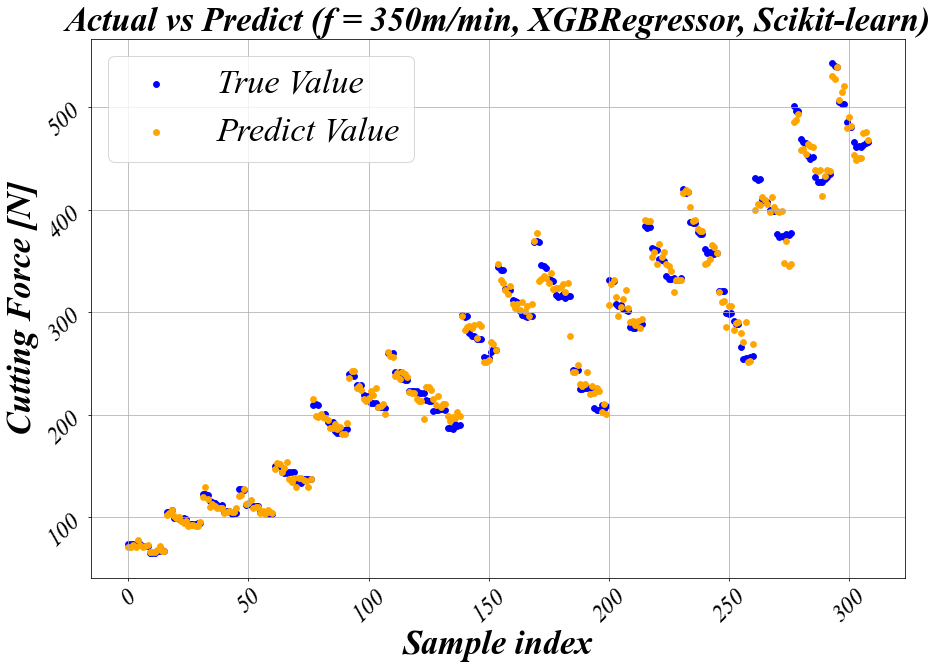

In [177]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 350m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning feed350 12800.png")

## feed 400

In [178]:
train = pd.concat([feed_300, feed_350, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [179]:
X_test = feed_400.iloc[: , 1:]
y_test = feed_400['RMS_CF_max']

In [180]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [184]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 390,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:292.39825	validation_0-mape:0.98754	validation_1-rmse:298.55044	validation_1-mape:0.98759
[1]	validation_0-rmse:289.53843	validation_0-mape:0.97767	validation_1-rmse:295.64121	validation_1-mape:0.97770
[2]	validation_0-rmse:286.70759	validation_0-mape:0.96789	validation_1-rmse:292.75999	validation_1-mape:0.96790
[3]	validation_0-rmse:283.90467	validation_0-mape:0.95821	validation_1-rmse:289.90654	validation_1-mape:0.95818
[4]	validation_0-rmse:281.12977	validation_0-mape:0.94863	validation_1-rmse:287.08407	validation_1-mape:0.94858
[5]	validation_0-rmse:278.38206	validation_0-mape:0.93913	validation_1-rmse:284.28560	validation_1-mape:0.93908
[6]	validation_0-rmse:275.66238	validation_0-mape:0.92974	validation_1-rmse:281.52088	validation_1-mape:0.92967
[7]	validation_0-rmse:272.96894	validation_0-mape:0.92043	validation_1-rmse:278.77881	validation_1-mape:0.92037
[8]	validation_0-rmse:270.30369	validation_0-mape:0.91122	validation_1-rmse:275.99237	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[33]	validation_0-rmse:211.62263	validation_0-mape:0.70847	validation_1-rmse:215.58041	validation_1-mape:0.70677
[34]	validation_0-rmse:209.56539	validation_0-mape:0.70137	validation_1-rmse:213.47782	validation_1-mape:0.69970
[35]	validation_0-rmse:207.52860	validation_0-mape:0.69436	validation_1-rmse:211.36200	validation_1-mape:0.69259
[36]	validation_0-rmse:205.51213	validation_0-mape:0.68741	validation_1-rmse:209.27506	validation_1-mape:0.68558
[37]	validation_0-rmse:203.51563	validation_0-mape:0.68053	validation_1-rmse:207.21156	validation_1-mape:0.67862
[38]	validation_0-rmse:201.53902	validation_0-mape:0.67373	validation_1-rmse:205.15366	validation_1-mape:0.67169
[39]	validation_0-rmse:199.58223	validation_0-mape:0.66700	validation_1-rmse:203.11920	validation_1-mape:0.66485
[40]	validation_0-rmse:197.64513	validation_0-mape:0.66033	validation_1-rmse:201.12843	validation_1-mape:0.65808
[41]	validation_0-rmse:195.72652	validation_0-mape:0.65373	validation_1-rmse:199.12727	validatio

[106]	validation_0-rmse:104.15818	validation_0-mape:0.34103	validation_1-rmse:102.49493	validation_1-mape:0.33132
[107]	validation_0-rmse:103.15858	validation_0-mape:0.33764	validation_1-rmse:101.39283	validation_1-mape:0.32772
[108]	validation_0-rmse:102.17195	validation_0-mape:0.33429	validation_1-rmse:100.36338	validation_1-mape:0.32432
[109]	validation_0-rmse:101.19567	validation_0-mape:0.33096	validation_1-rmse:99.34111	validation_1-mape:0.32091
[110]	validation_0-rmse:100.22575	validation_0-mape:0.32767	validation_1-rmse:98.29861	validation_1-mape:0.31743
[111]	validation_0-rmse:99.26768	validation_0-mape:0.32441	validation_1-rmse:97.29266	validation_1-mape:0.31408
[112]	validation_0-rmse:98.31651	validation_0-mape:0.32119	validation_1-rmse:96.27327	validation_1-mape:0.31071
[113]	validation_0-rmse:97.37462	validation_0-mape:0.31800	validation_1-rmse:95.28431	validation_1-mape:0.30746
[114]	validation_0-rmse:96.44397	validation_0-mape:0.31484	validation_1-rmse:94.30266	validation

[180]	validation_0-rmse:51.42105	validation_0-mape:0.16308	validation_1-rmse:45.69503	validation_1-mape:0.14444
[181]	validation_0-rmse:50.93846	validation_0-mape:0.16146	validation_1-rmse:45.20125	validation_1-mape:0.14275
[182]	validation_0-rmse:50.46293	validation_0-mape:0.15987	validation_1-rmse:44.69099	validation_1-mape:0.14103
[183]	validation_0-rmse:49.98727	validation_0-mape:0.15829	validation_1-rmse:44.16694	validation_1-mape:0.13935
[184]	validation_0-rmse:49.51877	validation_0-mape:0.15672	validation_1-rmse:43.68987	validation_1-mape:0.13772
[185]	validation_0-rmse:49.05251	validation_0-mape:0.15518	validation_1-rmse:43.17495	validation_1-mape:0.13607
[186]	validation_0-rmse:48.59380	validation_0-mape:0.15364	validation_1-rmse:42.71421	validation_1-mape:0.13452
[187]	validation_0-rmse:48.13659	validation_0-mape:0.15213	validation_1-rmse:42.21015	validation_1-mape:0.13290
[188]	validation_0-rmse:47.68666	validation_0-mape:0.15062	validation_1-rmse:41.75116	validation_1-mape:

[254]	validation_0-rmse:25.99854	validation_0-mape:0.07819	validation_1-rmse:20.46211	validation_1-mape:0.05844
[255]	validation_0-rmse:25.76715	validation_0-mape:0.07741	validation_1-rmse:20.25158	validation_1-mape:0.05769
[256]	validation_0-rmse:25.53909	validation_0-mape:0.07665	validation_1-rmse:20.03908	validation_1-mape:0.05696
[257]	validation_0-rmse:25.31029	validation_0-mape:0.07589	validation_1-rmse:19.85114	validation_1-mape:0.05627
[258]	validation_0-rmse:25.08584	validation_0-mape:0.07514	validation_1-rmse:19.64780	validation_1-mape:0.05554
[259]	validation_0-rmse:24.86456	validation_0-mape:0.07440	validation_1-rmse:19.44474	validation_1-mape:0.05484
[260]	validation_0-rmse:24.64282	validation_0-mape:0.07367	validation_1-rmse:19.26622	validation_1-mape:0.05418
[261]	validation_0-rmse:24.42462	validation_0-mape:0.07294	validation_1-rmse:19.08266	validation_1-mape:0.05350
[262]	validation_0-rmse:24.20901	validation_0-mape:0.07222	validation_1-rmse:18.89547	validation_1-mape:

[328]	validation_0-rmse:13.75303	validation_0-mape:0.03775	validation_1-rmse:11.37019	validation_1-mape:0.02794
[329]	validation_0-rmse:13.63801	validation_0-mape:0.03739	validation_1-rmse:11.31201	validation_1-mape:0.02779
[330]	validation_0-rmse:13.52702	validation_0-mape:0.03704	validation_1-rmse:11.25745	validation_1-mape:0.02764
[331]	validation_0-rmse:13.41643	validation_0-mape:0.03668	validation_1-rmse:11.20750	validation_1-mape:0.02751
[332]	validation_0-rmse:13.30505	validation_0-mape:0.03633	validation_1-rmse:11.15832	validation_1-mape:0.02737
[333]	validation_0-rmse:13.19690	validation_0-mape:0.03599	validation_1-rmse:11.11017	validation_1-mape:0.02726
[334]	validation_0-rmse:13.08982	validation_0-mape:0.03564	validation_1-rmse:11.06309	validation_1-mape:0.02714
[335]	validation_0-rmse:12.98203	validation_0-mape:0.03531	validation_1-rmse:11.01632	validation_1-mape:0.02702
[336]	validation_0-rmse:12.87732	validation_0-mape:0.03497	validation_1-rmse:10.97414	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=390, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [185]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 8.5980
Train MAPE: 2.1669
Test RMSE: 10.0002
Test MAPE: 2.5228


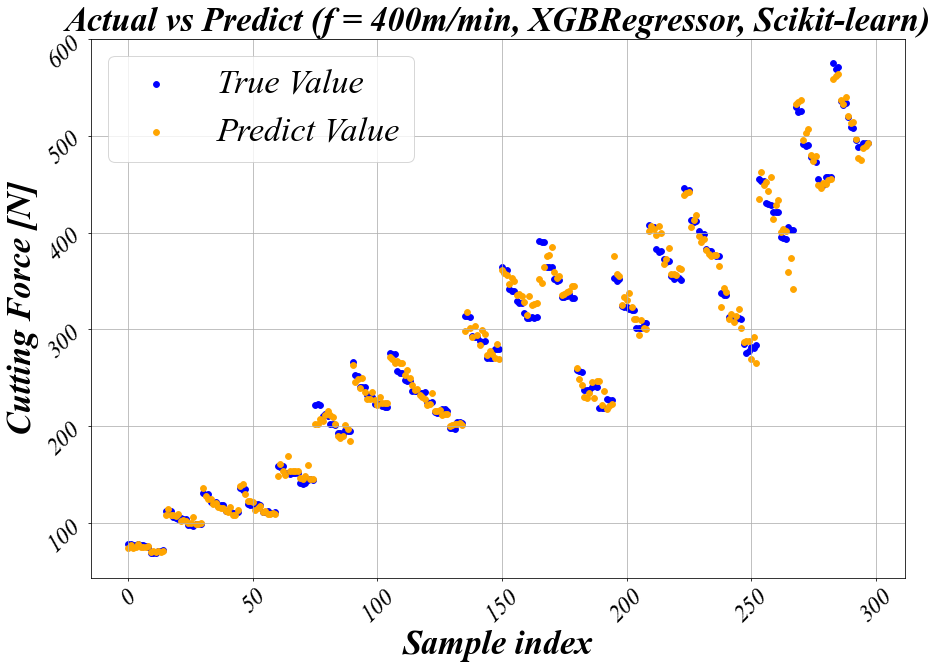

In [187]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 400m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning feed400 12800.png")

## feed 450

In [188]:
train = pd.concat([feed_300, feed_350, feed_400, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [189]:
X_test = feed_450.iloc[: , 1:]
y_test = feed_450['RMS_CF_max']

In [190]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [191]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:288.95642	validation_0-mape:0.98751	validation_1-rmse:318.37558	validation_1-mape:0.98821
[1]	validation_0-rmse:286.12832	validation_0-mape:0.97763	validation_1-rmse:315.41376	validation_1-mape:0.97879
[2]	validation_0-rmse:283.32850	validation_0-mape:0.96785	validation_1-rmse:312.48320	validation_1-mape:0.96946
[3]	validation_0-rmse:280.55669	validation_0-mape:0.95817	validation_1-rmse:309.60132	validation_1-mape:0.96025
[4]	validation_0-rmse:277.81310	validation_0-mape:0.94859	validation_1-rmse:306.71408	validation_1-mape:0.95105
[5]	validation_0-rmse:275.09375	validation_0-mape:0.93909	validation_1-rmse:303.84736	validation_1-mape:0.94191
[6]	validation_0-rmse:272.40368	validation_0-mape:0.92970	validation_1-rmse:301.04305	validation_1-mape:0.93296
[7]	validation_0-rmse:269.73826	validation_0-mape:0.92038	validation_1-rmse:298.23288	validation_1-mape:0.92400
[8]	validation_0-rmse:267.10159	validation_0-mape:0.91117	validation_1-rmse:295.48460	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[38]	validation_0-rmse:199.10286	validation_0-mape:0.67370	validation_1-rmse:223.82461	validation_1-mape:0.68810
[39]	validation_0-rmse:197.16888	validation_0-mape:0.66695	validation_1-rmse:221.76690	validation_1-mape:0.68166
[40]	validation_0-rmse:195.25558	validation_0-mape:0.66028	validation_1-rmse:219.73105	validation_1-mape:0.67516
[41]	validation_0-rmse:193.35945	validation_0-mape:0.65366	validation_1-rmse:217.70286	validation_1-mape:0.66868
[42]	validation_0-rmse:191.48335	validation_0-mape:0.64715	validation_1-rmse:215.71263	validation_1-mape:0.66246
[43]	validation_0-rmse:189.62517	validation_0-mape:0.64066	validation_1-rmse:213.75689	validation_1-mape:0.65616
[44]	validation_0-rmse:187.78671	validation_0-mape:0.63424	validation_1-rmse:211.81088	validation_1-mape:0.64997
[45]	validation_0-rmse:185.96486	validation_0-mape:0.62789	validation_1-rmse:209.87785	validation_1-mape:0.64387
[46]	validation_0-rmse:184.16263	validation_0-mape:0.62163	validation_1-rmse:207.95650	validatio

[111]	validation_0-rmse:98.08357	validation_0-mape:0.32425	validation_1-rmse:114.65076	validation_1-mape:0.34532
[112]	validation_0-rmse:97.14303	validation_0-mape:0.32103	validation_1-rmse:113.61083	validation_1-mape:0.34206
[113]	validation_0-rmse:96.21371	validation_0-mape:0.31785	validation_1-rmse:112.54360	validation_1-mape:0.33886
[114]	validation_0-rmse:95.29121	validation_0-mape:0.31469	validation_1-rmse:111.52302	validation_1-mape:0.33566
[115]	validation_0-rmse:94.38026	validation_0-mape:0.31157	validation_1-rmse:110.48163	validation_1-mape:0.33253
[116]	validation_0-rmse:93.47597	validation_0-mape:0.30847	validation_1-rmse:109.47590	validation_1-mape:0.32938
[117]	validation_0-rmse:92.58290	validation_0-mape:0.30541	validation_1-rmse:108.43739	validation_1-mape:0.32630
[118]	validation_0-rmse:91.69713	validation_0-mape:0.30238	validation_1-rmse:107.41376	validation_1-mape:0.32311
[119]	validation_0-rmse:90.81890	validation_0-mape:0.29937	validation_1-rmse:106.46367	validatio

[185]	validation_0-rmse:48.53126	validation_0-mape:0.15505	validation_1-rmse:58.51268	validation_1-mape:0.17207
[186]	validation_0-rmse:48.07753	validation_0-mape:0.15352	validation_1-rmse:57.97617	validation_1-mape:0.17037
[187]	validation_0-rmse:47.62872	validation_0-mape:0.15200	validation_1-rmse:57.44812	validation_1-mape:0.16873
[188]	validation_0-rmse:47.18419	validation_0-mape:0.15050	validation_1-rmse:56.92279	validation_1-mape:0.16706
[189]	validation_0-rmse:46.74065	validation_0-mape:0.14901	validation_1-rmse:56.37103	validation_1-mape:0.16539
[190]	validation_0-rmse:46.30190	validation_0-mape:0.14754	validation_1-rmse:55.83328	validation_1-mape:0.16381
[191]	validation_0-rmse:45.87057	validation_0-mape:0.14609	validation_1-rmse:55.32376	validation_1-mape:0.16219
[192]	validation_0-rmse:45.44008	validation_0-mape:0.14465	validation_1-rmse:54.78796	validation_1-mape:0.16059
[193]	validation_0-rmse:45.01432	validation_0-mape:0.14322	validation_1-rmse:54.26663	validation_1-mape:

[259]	validation_0-rmse:24.60373	validation_0-mape:0.07443	validation_1-rmse:30.58370	validation_1-mape:0.08643
[260]	validation_0-rmse:24.38641	validation_0-mape:0.07369	validation_1-rmse:30.32994	validation_1-mape:0.08564
[261]	validation_0-rmse:24.16879	validation_0-mape:0.07297	validation_1-rmse:30.05888	validation_1-mape:0.08483
[262]	validation_0-rmse:23.95322	validation_0-mape:0.07225	validation_1-rmse:29.79664	validation_1-mape:0.08407
[263]	validation_0-rmse:23.73984	validation_0-mape:0.07155	validation_1-rmse:29.53584	validation_1-mape:0.08331
[264]	validation_0-rmse:23.52859	validation_0-mape:0.07085	validation_1-rmse:29.27612	validation_1-mape:0.08253
[265]	validation_0-rmse:23.31938	validation_0-mape:0.07015	validation_1-rmse:29.02297	validation_1-mape:0.08178
[266]	validation_0-rmse:23.11285	validation_0-mape:0.06947	validation_1-rmse:28.76633	validation_1-mape:0.08104
[267]	validation_0-rmse:22.90948	validation_0-mape:0.06878	validation_1-rmse:28.54230	validation_1-mape:

[333]	validation_0-rmse:13.06319	validation_0-mape:0.03614	validation_1-rmse:17.79199	validation_1-mape:0.04670
[334]	validation_0-rmse:12.95886	validation_0-mape:0.03580	validation_1-rmse:17.69203	validation_1-mape:0.04640
[335]	validation_0-rmse:12.85476	validation_0-mape:0.03547	validation_1-rmse:17.59174	validation_1-mape:0.04608
[336]	validation_0-rmse:12.75183	validation_0-mape:0.03513	validation_1-rmse:17.48252	validation_1-mape:0.04575
[337]	validation_0-rmse:12.64963	validation_0-mape:0.03481	validation_1-rmse:17.38764	validation_1-mape:0.04546
[338]	validation_0-rmse:12.54990	validation_0-mape:0.03448	validation_1-rmse:17.29835	validation_1-mape:0.04517
[339]	validation_0-rmse:12.45049	validation_0-mape:0.03416	validation_1-rmse:17.20119	validation_1-mape:0.04486
[340]	validation_0-rmse:12.35100	validation_0-mape:0.03384	validation_1-rmse:17.11345	validation_1-mape:0.04458
[341]	validation_0-rmse:12.25286	validation_0-mape:0.03353	validation_1-rmse:17.02041	validation_1-mape:

[407]	validation_0-rmse:7.53907	validation_0-mape:0.01889	validation_1-rmse:13.11139	validation_1-mape:0.03266
[408]	validation_0-rmse:7.49064	validation_0-mape:0.01875	validation_1-rmse:13.07634	validation_1-mape:0.03256
[409]	validation_0-rmse:7.44087	validation_0-mape:0.01860	validation_1-rmse:13.04855	validation_1-mape:0.03248
[410]	validation_0-rmse:7.39310	validation_0-mape:0.01846	validation_1-rmse:13.01259	validation_1-mape:0.03239
[411]	validation_0-rmse:7.34350	validation_0-mape:0.01832	validation_1-rmse:12.98668	validation_1-mape:0.03231
[412]	validation_0-rmse:7.29645	validation_0-mape:0.01818	validation_1-rmse:12.95578	validation_1-mape:0.03223
[413]	validation_0-rmse:7.24997	validation_0-mape:0.01804	validation_1-rmse:12.92248	validation_1-mape:0.03214
[414]	validation_0-rmse:7.20259	validation_0-mape:0.01790	validation_1-rmse:12.89755	validation_1-mape:0.03207
[415]	validation_0-rmse:7.15726	validation_0-mape:0.01777	validation_1-rmse:12.86348	validation_1-mape:0.03200
[

[481]	validation_0-rmse:4.94935	validation_0-mape:0.01205	validation_1-rmse:11.77048	validation_1-mape:0.02919
[482]	validation_0-rmse:4.92624	validation_0-mape:0.01200	validation_1-rmse:11.76516	validation_1-mape:0.02917
[483]	validation_0-rmse:4.90373	validation_0-mape:0.01195	validation_1-rmse:11.75638	validation_1-mape:0.02914
[484]	validation_0-rmse:4.88052	validation_0-mape:0.01189	validation_1-rmse:11.75131	validation_1-mape:0.02912
[485]	validation_0-rmse:4.85757	validation_0-mape:0.01184	validation_1-rmse:11.74621	validation_1-mape:0.02910
[486]	validation_0-rmse:4.83585	validation_0-mape:0.01179	validation_1-rmse:11.74029	validation_1-mape:0.02908
[487]	validation_0-rmse:4.81391	validation_0-mape:0.01174	validation_1-rmse:11.73632	validation_1-mape:0.02906
[488]	validation_0-rmse:4.79044	validation_0-mape:0.01168	validation_1-rmse:11.72937	validation_1-mape:0.02904
[489]	validation_0-rmse:4.76838	validation_0-mape:0.01163	validation_1-rmse:11.72566	validation_1-mape:0.02903
[

[555]	validation_0-rmse:3.68891	validation_0-mape:0.00941	validation_1-rmse:11.47792	validation_1-mape:0.02842
[556]	validation_0-rmse:3.67650	validation_0-mape:0.00939	validation_1-rmse:11.47762	validation_1-mape:0.02842
[557]	validation_0-rmse:3.66222	validation_0-mape:0.00937	validation_1-rmse:11.47368	validation_1-mape:0.02841
[558]	validation_0-rmse:3.65042	validation_0-mape:0.00934	validation_1-rmse:11.47266	validation_1-mape:0.02841
[559]	validation_0-rmse:3.63909	validation_0-mape:0.00932	validation_1-rmse:11.47132	validation_1-mape:0.02841
[560]	validation_0-rmse:3.62710	validation_0-mape:0.00931	validation_1-rmse:11.47057	validation_1-mape:0.02841
[561]	validation_0-rmse:3.61621	validation_0-mape:0.00928	validation_1-rmse:11.47029	validation_1-mape:0.02841
[562]	validation_0-rmse:3.60253	validation_0-mape:0.00926	validation_1-rmse:11.46628	validation_1-mape:0.02840
[563]	validation_0-rmse:3.59166	validation_0-mape:0.00924	validation_1-rmse:11.46604	validation_1-mape:0.02840
[

[629]	validation_0-rmse:2.97229	validation_0-mape:0.00810	validation_1-rmse:11.32297	validation_1-mape:0.02832
[630]	validation_0-rmse:2.96666	validation_0-mape:0.00809	validation_1-rmse:11.32071	validation_1-mape:0.02832
[631]	validation_0-rmse:2.95870	validation_0-mape:0.00808	validation_1-rmse:11.31992	validation_1-mape:0.02832
[632]	validation_0-rmse:2.95040	validation_0-mape:0.00807	validation_1-rmse:11.32013	validation_1-mape:0.02832
[633]	validation_0-rmse:2.94337	validation_0-mape:0.00805	validation_1-rmse:11.31782	validation_1-mape:0.02832
[634]	validation_0-rmse:2.93548	validation_0-mape:0.00804	validation_1-rmse:11.31782	validation_1-mape:0.02832
[635]	validation_0-rmse:2.92778	validation_0-mape:0.00803	validation_1-rmse:11.31645	validation_1-mape:0.02832
[636]	validation_0-rmse:2.92251	validation_0-mape:0.00802	validation_1-rmse:11.31425	validation_1-mape:0.02832
[637]	validation_0-rmse:2.91500	validation_0-mape:0.00801	validation_1-rmse:11.31343	validation_1-mape:0.02832
[

[703]	validation_0-rmse:2.53684	validation_0-mape:0.00728	validation_1-rmse:11.29579	validation_1-mape:0.02839
[704]	validation_0-rmse:2.53050	validation_0-mape:0.00727	validation_1-rmse:11.29453	validation_1-mape:0.02839
[705]	validation_0-rmse:2.52498	validation_0-mape:0.00725	validation_1-rmse:11.29400	validation_1-mape:0.02839
[706]	validation_0-rmse:2.52070	validation_0-mape:0.00724	validation_1-rmse:11.29194	validation_1-mape:0.02839
[707]	validation_0-rmse:2.51491	validation_0-mape:0.00723	validation_1-rmse:11.29031	validation_1-mape:0.02838
[708]	validation_0-rmse:2.50947	validation_0-mape:0.00722	validation_1-rmse:11.29011	validation_1-mape:0.02838
[709]	validation_0-rmse:2.50371	validation_0-mape:0.00721	validation_1-rmse:11.29003	validation_1-mape:0.02839
[710]	validation_0-rmse:2.49971	validation_0-mape:0.00720	validation_1-rmse:11.28931	validation_1-mape:0.02839
[711]	validation_0-rmse:2.49409	validation_0-mape:0.00719	validation_1-rmse:11.28852	validation_1-mape:0.02839
[

[777]	validation_0-rmse:2.22323	validation_0-mape:0.00659	validation_1-rmse:11.30311	validation_1-mape:0.02844
[778]	validation_0-rmse:2.22004	validation_0-mape:0.00658	validation_1-rmse:11.30393	validation_1-mape:0.02844
[779]	validation_0-rmse:2.21591	validation_0-mape:0.00657	validation_1-rmse:11.30353	validation_1-mape:0.02844
[780]	validation_0-rmse:2.21083	validation_0-mape:0.00656	validation_1-rmse:11.30389	validation_1-mape:0.02844
[781]	validation_0-rmse:2.20729	validation_0-mape:0.00655	validation_1-rmse:11.30588	validation_1-mape:0.02845
[782]	validation_0-rmse:2.20343	validation_0-mape:0.00654	validation_1-rmse:11.30529	validation_1-mape:0.02844
[783]	validation_0-rmse:2.20167	validation_0-mape:0.00653	validation_1-rmse:11.30555	validation_1-mape:0.02845
[784]	validation_0-rmse:2.19785	validation_0-mape:0.00652	validation_1-rmse:11.30494	validation_1-mape:0.02844
[785]	validation_0-rmse:2.19540	validation_0-mape:0.00652	validation_1-rmse:11.30476	validation_1-mape:0.02844
[

[851]	validation_0-rmse:2.02761	validation_0-mape:0.00610	validation_1-rmse:11.32064	validation_1-mape:0.02850
[852]	validation_0-rmse:2.02601	validation_0-mape:0.00609	validation_1-rmse:11.32024	validation_1-mape:0.02849
[853]	validation_0-rmse:2.02401	validation_0-mape:0.00608	validation_1-rmse:11.32058	validation_1-mape:0.02849
[854]	validation_0-rmse:2.02282	validation_0-mape:0.00608	validation_1-rmse:11.32075	validation_1-mape:0.02849
[855]	validation_0-rmse:2.02130	validation_0-mape:0.00608	validation_1-rmse:11.32176	validation_1-mape:0.02849
[856]	validation_0-rmse:2.01794	validation_0-mape:0.00607	validation_1-rmse:11.32145	validation_1-mape:0.02849
[857]	validation_0-rmse:2.01628	validation_0-mape:0.00606	validation_1-rmse:11.32154	validation_1-mape:0.02849
[858]	validation_0-rmse:2.01512	validation_0-mape:0.00606	validation_1-rmse:11.32170	validation_1-mape:0.02849
[859]	validation_0-rmse:2.01158	validation_0-mape:0.00605	validation_1-rmse:11.32143	validation_1-mape:0.02849
[

[925]	validation_0-rmse:1.89770	validation_0-mape:0.00574	validation_1-rmse:11.33030	validation_1-mape:0.02848
[926]	validation_0-rmse:1.89521	validation_0-mape:0.00573	validation_1-rmse:11.33010	validation_1-mape:0.02848
[927]	validation_0-rmse:1.89297	validation_0-mape:0.00573	validation_1-rmse:11.32962	validation_1-mape:0.02848
[928]	validation_0-rmse:1.89210	validation_0-mape:0.00572	validation_1-rmse:11.32981	validation_1-mape:0.02848
[929]	validation_0-rmse:1.89085	validation_0-mape:0.00572	validation_1-rmse:11.32932	validation_1-mape:0.02848
[930]	validation_0-rmse:1.89004	validation_0-mape:0.00571	validation_1-rmse:11.32932	validation_1-mape:0.02848
[931]	validation_0-rmse:1.88868	validation_0-mape:0.00571	validation_1-rmse:11.32971	validation_1-mape:0.02848
[932]	validation_0-rmse:1.88808	validation_0-mape:0.00571	validation_1-rmse:11.32992	validation_1-mape:0.02848
[933]	validation_0-rmse:1.88684	validation_0-mape:0.00570	validation_1-rmse:11.32941	validation_1-mape:0.02848
[

[999]	validation_0-rmse:1.78166	validation_0-mape:0.00543	validation_1-rmse:11.32581	validation_1-mape:0.02849


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [192]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7817
Train MAPE: 0.5426
Test RMSE: 11.3258
Test MAPE: 2.8487


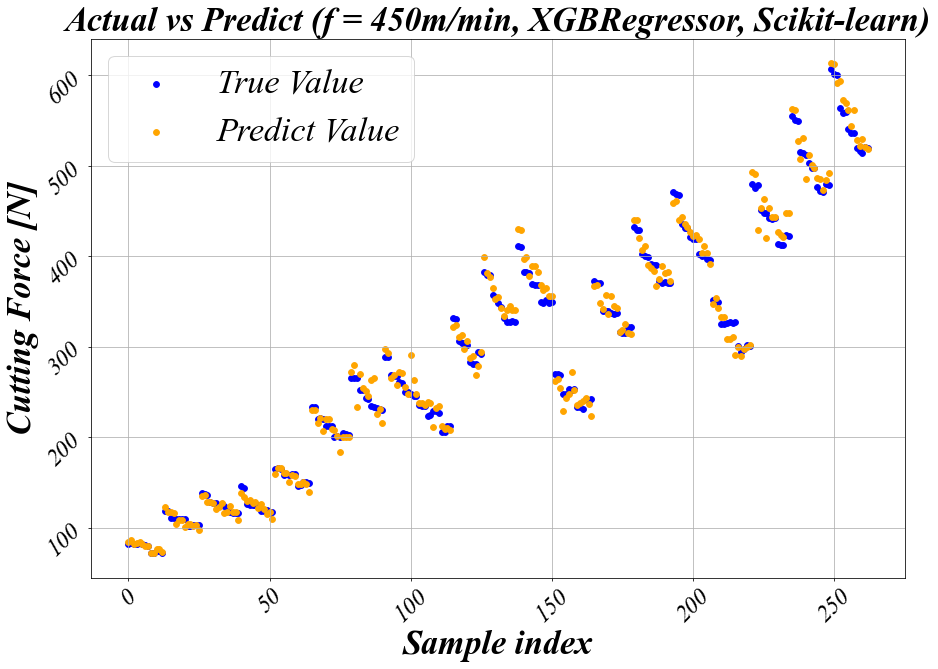

In [193]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 450m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning feed450 12800.png")

## feed 500

In [194]:
train = pd.concat([feed_300, feed_350, feed_400, feed_450], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [195]:
X_test = feed_500.iloc[: , 1:]
y_test = feed_500['RMS_CF_max']

In [196]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [197]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:285.89636	validation_0-mape:0.98748	validation_1-rmse:328.67855	validation_1-mape:0.98874
[1]	validation_0-rmse:283.09428	validation_0-mape:0.97759	validation_1-rmse:325.76076	validation_1-mape:0.97977
[2]	validation_0-rmse:280.32023	validation_0-mape:0.96780	validation_1-rmse:322.87215	validation_1-mape:0.97089
[3]	validation_0-rmse:277.57385	validation_0-mape:0.95812	validation_1-rmse:320.00866	validation_1-mape:0.96209
[4]	validation_0-rmse:274.85185	validation_0-mape:0.94854	validation_1-rmse:317.22388	validation_1-mape:0.95363
[5]	validation_0-rmse:272.15708	validation_0-mape:0.93906	validation_1-rmse:314.47502	validation_1-mape:0.94530
[6]	validation_0-rmse:269.49180	validation_0-mape:0.92968	validation_1-rmse:311.69866	validation_1-mape:0.93677
[7]	validation_0-rmse:266.85039	validation_0-mape:0.92039	validation_1-rmse:308.97037	validation_1-mape:0.92854
[8]	validation_0-rmse:264.23538	validation_0-mape:0.91120	validation_1-rmse:306.29472	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[33]	validation_0-rmse:206.67791	validation_0-mape:0.70889	validation_1-rmse:246.64696	validation_1-mape:0.73854
[34]	validation_0-rmse:204.66269	validation_0-mape:0.70181	validation_1-rmse:244.49137	validation_1-mape:0.73182
[35]	validation_0-rmse:202.66504	validation_0-mape:0.69480	validation_1-rmse:242.41719	validation_1-mape:0.72543
[36]	validation_0-rmse:200.68918	validation_0-mape:0.68784	validation_1-rmse:240.36787	validation_1-mape:0.71919
[37]	validation_0-rmse:198.73341	validation_0-mape:0.68097	validation_1-rmse:238.27943	validation_1-mape:0.71268
[38]	validation_0-rmse:196.79491	validation_0-mape:0.67417	validation_1-rmse:236.25812	validation_1-mape:0.70653
[39]	validation_0-rmse:194.87443	validation_0-mape:0.66744	validation_1-rmse:234.28412	validation_1-mape:0.70056
[40]	validation_0-rmse:192.97590	validation_0-mape:0.66076	validation_1-rmse:232.30797	validation_1-mape:0.69445
[41]	validation_0-rmse:191.09664	validation_0-mape:0.65416	validation_1-rmse:230.30104	validatio

[106]	validation_0-rmse:101.54170	validation_0-mape:0.34077	validation_1-rmse:135.91180	validation_1-mape:0.39678
[107]	validation_0-rmse:100.56523	validation_0-mape:0.33738	validation_1-rmse:134.87042	validation_1-mape:0.39348
[108]	validation_0-rmse:99.59968	validation_0-mape:0.33401	validation_1-rmse:133.82350	validation_1-mape:0.39027
[109]	validation_0-rmse:98.64305	validation_0-mape:0.33069	validation_1-rmse:132.77231	validation_1-mape:0.38698
[110]	validation_0-rmse:97.69447	validation_0-mape:0.32739	validation_1-rmse:131.75205	validation_1-mape:0.38385
[111]	validation_0-rmse:96.75621	validation_0-mape:0.32413	validation_1-rmse:130.74133	validation_1-mape:0.38069
[112]	validation_0-rmse:95.82780	validation_0-mape:0.32091	validation_1-rmse:129.72507	validation_1-mape:0.37750
[113]	validation_0-rmse:94.90832	validation_0-mape:0.31772	validation_1-rmse:128.72683	validation_1-mape:0.37449
[114]	validation_0-rmse:93.99666	validation_0-mape:0.31456	validation_1-rmse:127.74335	validat

[179]	validation_0-rmse:50.51437	validation_0-mape:0.16452	validation_1-rmse:78.62611	validation_1-mape:0.22012
[180]	validation_0-rmse:50.03998	validation_0-mape:0.16289	validation_1-rmse:78.05795	validation_1-mape:0.21840
[181]	validation_0-rmse:49.57100	validation_0-mape:0.16127	validation_1-rmse:77.52053	validation_1-mape:0.21670
[182]	validation_0-rmse:49.10680	validation_0-mape:0.15967	validation_1-rmse:76.98973	validation_1-mape:0.21503
[183]	validation_0-rmse:48.64431	validation_0-mape:0.15809	validation_1-rmse:76.46841	validation_1-mape:0.21340
[184]	validation_0-rmse:48.18574	validation_0-mape:0.15653	validation_1-rmse:75.94440	validation_1-mape:0.21178
[185]	validation_0-rmse:47.73241	validation_0-mape:0.15498	validation_1-rmse:75.41622	validation_1-mape:0.21018
[186]	validation_0-rmse:47.28366	validation_0-mape:0.15345	validation_1-rmse:74.89338	validation_1-mape:0.20859
[187]	validation_0-rmse:46.83920	validation_0-mape:0.15194	validation_1-rmse:74.38895	validation_1-mape:

[253]	validation_0-rmse:25.40713	validation_0-mape:0.07887	validation_1-rmse:48.91288	validation_1-mape:0.12894
[254]	validation_0-rmse:25.17815	validation_0-mape:0.07810	validation_1-rmse:48.65635	validation_1-mape:0.12812
[255]	validation_0-rmse:24.95205	validation_0-mape:0.07732	validation_1-rmse:48.37874	validation_1-mape:0.12730
[256]	validation_0-rmse:24.72815	validation_0-mape:0.07656	validation_1-rmse:48.10946	validation_1-mape:0.12646
[257]	validation_0-rmse:24.50434	validation_0-mape:0.07580	validation_1-rmse:47.81807	validation_1-mape:0.12560
[258]	validation_0-rmse:24.28222	validation_0-mape:0.07506	validation_1-rmse:47.53105	validation_1-mape:0.12476
[259]	validation_0-rmse:24.06250	validation_0-mape:0.07432	validation_1-rmse:47.24844	validation_1-mape:0.12392
[260]	validation_0-rmse:23.84501	validation_0-mape:0.07359	validation_1-rmse:46.96692	validation_1-mape:0.12309
[261]	validation_0-rmse:23.63201	validation_0-mape:0.07286	validation_1-rmse:46.69900	validation_1-mape:

[327]	validation_0-rmse:13.27420	validation_0-mape:0.03801	validation_1-rmse:33.82929	validation_1-mape:0.08262
[328]	validation_0-rmse:13.16424	validation_0-mape:0.03765	validation_1-rmse:33.69670	validation_1-mape:0.08220
[329]	validation_0-rmse:13.05426	validation_0-mape:0.03728	validation_1-rmse:33.56046	validation_1-mape:0.08177
[330]	validation_0-rmse:12.94543	validation_0-mape:0.03693	validation_1-rmse:33.42853	validation_1-mape:0.08136
[331]	validation_0-rmse:12.83894	validation_0-mape:0.03657	validation_1-rmse:33.29759	validation_1-mape:0.08095
[332]	validation_0-rmse:12.73234	validation_0-mape:0.03622	validation_1-rmse:33.16685	validation_1-mape:0.08055
[333]	validation_0-rmse:12.62687	validation_0-mape:0.03587	validation_1-rmse:33.03365	validation_1-mape:0.08015
[334]	validation_0-rmse:12.52216	validation_0-mape:0.03552	validation_1-rmse:32.91062	validation_1-mape:0.07976
[335]	validation_0-rmse:12.41872	validation_0-mape:0.03518	validation_1-rmse:32.78795	validation_1-mape:

[401]	validation_0-rmse:7.47161	validation_0-mape:0.01933	validation_1-rmse:26.52677	validation_1-mape:0.06079
[402]	validation_0-rmse:7.41842	validation_0-mape:0.01917	validation_1-rmse:26.45788	validation_1-mape:0.06059
[403]	validation_0-rmse:7.36583	validation_0-mape:0.01901	validation_1-rmse:26.38846	validation_1-mape:0.06038
[404]	validation_0-rmse:7.31374	validation_0-mape:0.01885	validation_1-rmse:26.32236	validation_1-mape:0.06021
[405]	validation_0-rmse:7.26434	validation_0-mape:0.01870	validation_1-rmse:26.25606	validation_1-mape:0.06002
[406]	validation_0-rmse:7.21340	validation_0-mape:0.01855	validation_1-rmse:26.18896	validation_1-mape:0.05982
[407]	validation_0-rmse:7.16293	validation_0-mape:0.01840	validation_1-rmse:26.12400	validation_1-mape:0.05965
[408]	validation_0-rmse:7.11283	validation_0-mape:0.01825	validation_1-rmse:26.05781	validation_1-mape:0.05946
[409]	validation_0-rmse:7.06362	validation_0-mape:0.01810	validation_1-rmse:25.99360	validation_1-mape:0.05929
[

[475]	validation_0-rmse:4.67109	validation_0-mape:0.01150	validation_1-rmse:22.94495	validation_1-mape:0.05051
[476]	validation_0-rmse:4.64486	validation_0-mape:0.01144	validation_1-rmse:22.91386	validation_1-mape:0.05042
[477]	validation_0-rmse:4.61986	validation_0-mape:0.01138	validation_1-rmse:22.88608	validation_1-mape:0.05034
[478]	validation_0-rmse:4.59371	validation_0-mape:0.01132	validation_1-rmse:22.85434	validation_1-mape:0.05025
[479]	validation_0-rmse:4.56834	validation_0-mape:0.01126	validation_1-rmse:22.81944	validation_1-mape:0.05016
[480]	validation_0-rmse:4.54465	validation_0-mape:0.01121	validation_1-rmse:22.78260	validation_1-mape:0.05007
[481]	validation_0-rmse:4.51947	validation_0-mape:0.01115	validation_1-rmse:22.75301	validation_1-mape:0.04998
[482]	validation_0-rmse:4.49590	validation_0-mape:0.01109	validation_1-rmse:22.72316	validation_1-mape:0.04990
[483]	validation_0-rmse:4.47188	validation_0-mape:0.01104	validation_1-rmse:22.69283	validation_1-mape:0.04982
[

[549]	validation_0-rmse:3.26323	validation_0-mape:0.00849	validation_1-rmse:21.10739	validation_1-mape:0.04548
[550]	validation_0-rmse:3.25001	validation_0-mape:0.00846	validation_1-rmse:21.08871	validation_1-mape:0.04543
[551]	validation_0-rmse:3.23661	validation_0-mape:0.00844	validation_1-rmse:21.07074	validation_1-mape:0.04537
[552]	validation_0-rmse:3.22359	validation_0-mape:0.00841	validation_1-rmse:21.05375	validation_1-mape:0.04533
[553]	validation_0-rmse:3.21013	validation_0-mape:0.00838	validation_1-rmse:21.03579	validation_1-mape:0.04530
[554]	validation_0-rmse:3.19728	validation_0-mape:0.00836	validation_1-rmse:21.01892	validation_1-mape:0.04526
[555]	validation_0-rmse:3.18473	validation_0-mape:0.00833	validation_1-rmse:21.00111	validation_1-mape:0.04520
[556]	validation_0-rmse:3.17235	validation_0-mape:0.00831	validation_1-rmse:20.98277	validation_1-mape:0.04515
[557]	validation_0-rmse:3.16016	validation_0-mape:0.00829	validation_1-rmse:20.96509	validation_1-mape:0.04510
[

[623]	validation_0-rmse:2.58004	validation_0-mape:0.00721	validation_1-rmse:20.11018	validation_1-mape:0.04286
[624]	validation_0-rmse:2.57258	validation_0-mape:0.00720	validation_1-rmse:20.09966	validation_1-mape:0.04283
[625]	validation_0-rmse:2.56591	validation_0-mape:0.00718	validation_1-rmse:20.09100	validation_1-mape:0.04280
[626]	validation_0-rmse:2.55942	validation_0-mape:0.00717	validation_1-rmse:20.08009	validation_1-mape:0.04277
[627]	validation_0-rmse:2.55221	validation_0-mape:0.00716	validation_1-rmse:20.07066	validation_1-mape:0.04274
[628]	validation_0-rmse:2.54626	validation_0-mape:0.00714	validation_1-rmse:20.05973	validation_1-mape:0.04271
[629]	validation_0-rmse:2.53835	validation_0-mape:0.00713	validation_1-rmse:20.05003	validation_1-mape:0.04269
[630]	validation_0-rmse:2.53210	validation_0-mape:0.00711	validation_1-rmse:20.04115	validation_1-mape:0.04267
[631]	validation_0-rmse:2.52456	validation_0-mape:0.00710	validation_1-rmse:20.03288	validation_1-mape:0.04265
[

[697]	validation_0-rmse:2.18546	validation_0-mape:0.00635	validation_1-rmse:19.56941	validation_1-mape:0.04146
[698]	validation_0-rmse:2.18144	validation_0-mape:0.00634	validation_1-rmse:19.56417	validation_1-mape:0.04145
[699]	validation_0-rmse:2.17762	validation_0-mape:0.00633	validation_1-rmse:19.56031	validation_1-mape:0.04144
[700]	validation_0-rmse:2.17428	validation_0-mape:0.00632	validation_1-rmse:19.55545	validation_1-mape:0.04143
[701]	validation_0-rmse:2.16962	validation_0-mape:0.00632	validation_1-rmse:19.55082	validation_1-mape:0.04142
[702]	validation_0-rmse:2.16450	validation_0-mape:0.00631	validation_1-rmse:19.54514	validation_1-mape:0.04140
[703]	validation_0-rmse:2.16124	validation_0-mape:0.00630	validation_1-rmse:19.53985	validation_1-mape:0.04139
[704]	validation_0-rmse:2.15703	validation_0-mape:0.00629	validation_1-rmse:19.53486	validation_1-mape:0.04138
[705]	validation_0-rmse:2.15322	validation_0-mape:0.00628	validation_1-rmse:19.53219	validation_1-mape:0.04137
[

[771]	validation_0-rmse:1.94654	validation_0-mape:0.00578	validation_1-rmse:19.30835	validation_1-mape:0.04075
[772]	validation_0-rmse:1.94521	validation_0-mape:0.00577	validation_1-rmse:19.30514	validation_1-mape:0.04074
[773]	validation_0-rmse:1.94246	validation_0-mape:0.00577	validation_1-rmse:19.30280	validation_1-mape:0.04073
[774]	validation_0-rmse:1.93941	validation_0-mape:0.00576	validation_1-rmse:19.30021	validation_1-mape:0.04073
[775]	validation_0-rmse:1.93796	validation_0-mape:0.00576	validation_1-rmse:19.29708	validation_1-mape:0.04072
[776]	validation_0-rmse:1.93550	validation_0-mape:0.00575	validation_1-rmse:19.29453	validation_1-mape:0.04071
[777]	validation_0-rmse:1.93157	validation_0-mape:0.00574	validation_1-rmse:19.29206	validation_1-mape:0.04070
[778]	validation_0-rmse:1.92800	validation_0-mape:0.00574	validation_1-rmse:19.28993	validation_1-mape:0.04070
[779]	validation_0-rmse:1.92534	validation_0-mape:0.00573	validation_1-rmse:19.28752	validation_1-mape:0.04070
[

[845]	validation_0-rmse:1.76996	validation_0-mape:0.00533	validation_1-rmse:19.14469	validation_1-mape:0.04038
[846]	validation_0-rmse:1.76814	validation_0-mape:0.00533	validation_1-rmse:19.14244	validation_1-mape:0.04038
[847]	validation_0-rmse:1.76743	validation_0-mape:0.00533	validation_1-rmse:19.14086	validation_1-mape:0.04037
[848]	validation_0-rmse:1.76467	validation_0-mape:0.00532	validation_1-rmse:19.13870	validation_1-mape:0.04037
[849]	validation_0-rmse:1.76346	validation_0-mape:0.00531	validation_1-rmse:19.13657	validation_1-mape:0.04036
[850]	validation_0-rmse:1.76140	validation_0-mape:0.00531	validation_1-rmse:19.13492	validation_1-mape:0.04036
[851]	validation_0-rmse:1.76063	validation_0-mape:0.00531	validation_1-rmse:19.13251	validation_1-mape:0.04035
[852]	validation_0-rmse:1.75854	validation_0-mape:0.00530	validation_1-rmse:19.13055	validation_1-mape:0.04035
[853]	validation_0-rmse:1.75736	validation_0-mape:0.00530	validation_1-rmse:19.12813	validation_1-mape:0.04035
[

[919]	validation_0-rmse:1.64416	validation_0-mape:0.00498	validation_1-rmse:19.06467	validation_1-mape:0.04023
[920]	validation_0-rmse:1.64232	validation_0-mape:0.00497	validation_1-rmse:19.06380	validation_1-mape:0.04023
[921]	validation_0-rmse:1.64177	validation_0-mape:0.00497	validation_1-rmse:19.06308	validation_1-mape:0.04023
[922]	validation_0-rmse:1.64054	validation_0-mape:0.00497	validation_1-rmse:19.06208	validation_1-mape:0.04023
[923]	validation_0-rmse:1.63797	validation_0-mape:0.00496	validation_1-rmse:19.06180	validation_1-mape:0.04023
[924]	validation_0-rmse:1.63688	validation_0-mape:0.00496	validation_1-rmse:19.06082	validation_1-mape:0.04023
[925]	validation_0-rmse:1.63474	validation_0-mape:0.00495	validation_1-rmse:19.05884	validation_1-mape:0.04023
[926]	validation_0-rmse:1.63403	validation_0-mape:0.00495	validation_1-rmse:19.05778	validation_1-mape:0.04022
[927]	validation_0-rmse:1.63209	validation_0-mape:0.00495	validation_1-rmse:19.05557	validation_1-mape:0.04022
[

[993]	validation_0-rmse:1.53893	validation_0-mape:0.00468	validation_1-rmse:19.00899	validation_1-mape:0.04011
[994]	validation_0-rmse:1.53847	validation_0-mape:0.00468	validation_1-rmse:19.00870	validation_1-mape:0.04011
[995]	validation_0-rmse:1.53753	validation_0-mape:0.00468	validation_1-rmse:19.00804	validation_1-mape:0.04011
[996]	validation_0-rmse:1.53553	validation_0-mape:0.00467	validation_1-rmse:19.00781	validation_1-mape:0.04011
[997]	validation_0-rmse:1.53370	validation_0-mape:0.00467	validation_1-rmse:19.00653	validation_1-mape:0.04011
[998]	validation_0-rmse:1.53278	validation_0-mape:0.00467	validation_1-rmse:19.00589	validation_1-mape:0.04011
[999]	validation_0-rmse:1.53239	validation_0-mape:0.00467	validation_1-rmse:19.00543	validation_1-mape:0.04011


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [198]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.5324
Train MAPE: 0.4668
Test RMSE: 19.0054
Test MAPE: 4.0107


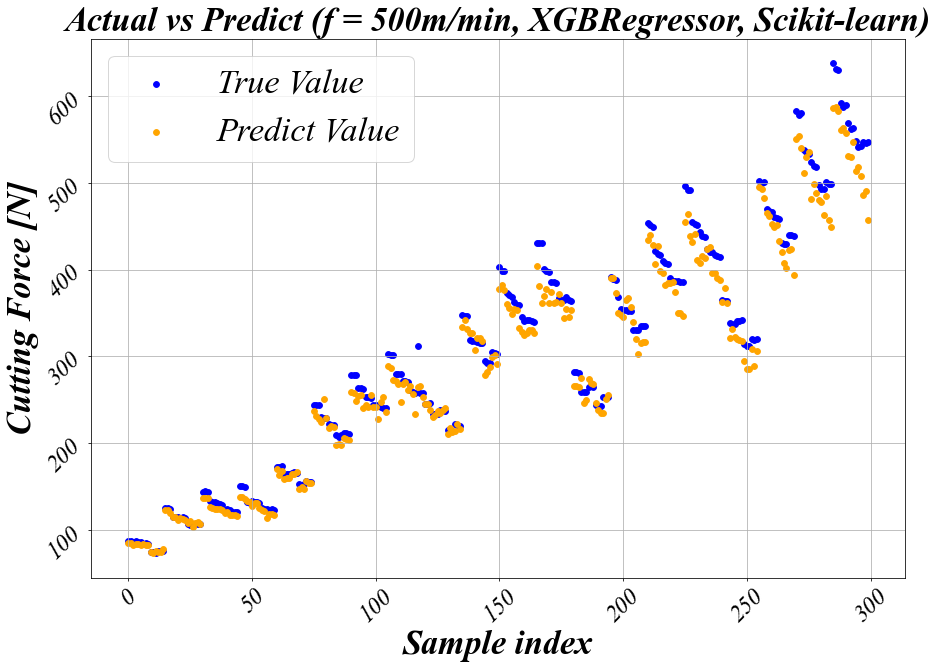

In [199]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 500m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning feed500 12800.png")

# RPM

In [200]:
rpm_3000 = groups_rpm.get_group(3000)
rpm_3000 = rpm_3000.reset_index(drop=True)
rpm_3000 = rpm_3000.drop(['Milling_Type'], axis=1)

rpm_3500 = groups_rpm.get_group(3500)
rpm_3500 = rpm_3500.reset_index(drop=True)
rpm_3500 = rpm_3500.drop(['Milling_Type'], axis=1)

rpm_4000 = groups_rpm.get_group(4000)
rpm_4000 = rpm_4000.reset_index(drop=True)
rpm_4000 = rpm_4000.drop(['Milling_Type'], axis=1)

rpm_4500 = groups_rpm.get_group(4500)
rpm_4500 = rpm_4500.reset_index(drop=True)
rpm_4500 = rpm_4500.drop(['Milling_Type'], axis=1)

rpm_5000 = groups_rpm.get_group(5000)
rpm_5000 = rpm_5000.reset_index(drop=True)
rpm_5000 = rpm_5000.drop(['Milling_Type'], axis=1)

## rpm 3000

In [201]:
train = pd.concat([rpm_3500, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [202]:
X_test = rpm_3000.iloc[: , 1:]
y_test = rpm_3000['RMS_CF_max']

In [203]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [214]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:285.85861	validation_0-mape:0.98751	validation_1-rmse:322.77091	validation_1-mape:0.99158
[1]	validation_0-rmse:283.05493	validation_0-mape:0.97765	validation_1-rmse:320.75513	validation_1-mape:0.98548
[2]	validation_0-rmse:280.27923	validation_0-mape:0.96791	validation_1-rmse:318.76075	validation_1-mape:0.97944
[3]	validation_0-rmse:277.53125	validation_0-mape:0.95826	validation_1-rmse:316.78760	validation_1-mape:0.97346
[4]	validation_0-rmse:274.81071	validation_0-mape:0.94871	validation_1-rmse:314.83539	validation_1-mape:0.96754
[5]	validation_0-rmse:272.11734	validation_0-mape:0.93925	validation_1-rmse:312.90396	validation_1-mape:0.96168
[6]	validation_0-rmse:269.45084	validation_0-mape:0.92988	validation_1-rmse:310.99471	validation_1-mape:0.95588
[7]	validation_0-rmse:266.81147	validation_0-mape:0.92058	validation_1-rmse:309.09849	validation_1-mape:0.95012
[8]	validation_0-rmse:264.19797	validation_0-mape:0.91140	validation_1-rmse:307.21160	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[40]	validation_0-rmse:192.96026	validation_0-mape:0.66080	validation_1-rmse:255.56745	validation_1-mape:0.78316
[41]	validation_0-rmse:191.08036	validation_0-mape:0.65417	validation_1-rmse:254.16322	validation_1-mape:0.77862
[42]	validation_0-rmse:189.22122	validation_0-mape:0.64762	validation_1-rmse:252.92489	validation_1-mape:0.77449
[43]	validation_0-rmse:187.37892	validation_0-mape:0.64116	validation_1-rmse:251.69420	validation_1-mape:0.77046
[44]	validation_0-rmse:185.55411	validation_0-mape:0.63475	validation_1-rmse:250.38522	validation_1-mape:0.76647
[45]	validation_0-rmse:183.74881	validation_0-mape:0.62840	validation_1-rmse:249.09919	validation_1-mape:0.76254
[46]	validation_0-rmse:181.96195	validation_0-mape:0.62212	validation_1-rmse:247.91153	validation_1-mape:0.75857
[47]	validation_0-rmse:180.19115	validation_0-mape:0.61590	validation_1-rmse:246.62309	validation_1-mape:0.75459
[48]	validation_0-rmse:178.44030	validation_0-mape:0.60974	validation_1-rmse:245.44701	validatio

[113]	validation_0-rmse:94.91875	validation_0-mape:0.31778	validation_1-rmse:186.87398	validation_1-mape:0.56169
[114]	validation_0-rmse:94.01037	validation_0-mape:0.31460	validation_1-rmse:186.20078	validation_1-mape:0.55957
[115]	validation_0-rmse:93.11062	validation_0-mape:0.31146	validation_1-rmse:185.57422	validation_1-mape:0.55756
[116]	validation_0-rmse:92.21936	validation_0-mape:0.30836	validation_1-rmse:184.91849	validation_1-mape:0.55551
[117]	validation_0-rmse:91.33818	validation_0-mape:0.30529	validation_1-rmse:184.22496	validation_1-mape:0.55327
[118]	validation_0-rmse:90.46447	validation_0-mape:0.30225	validation_1-rmse:183.57262	validation_1-mape:0.55114
[119]	validation_0-rmse:89.59730	validation_0-mape:0.29924	validation_1-rmse:182.94556	validation_1-mape:0.54918
[120]	validation_0-rmse:88.73997	validation_0-mape:0.29626	validation_1-rmse:182.28645	validation_1-mape:0.54711
[121]	validation_0-rmse:87.89286	validation_0-mape:0.29331	validation_1-rmse:181.76405	validatio

[186]	validation_0-rmse:47.36574	validation_0-mape:0.15341	validation_1-rmse:151.32431	validation_1-mape:0.44825
[187]	validation_0-rmse:46.92370	validation_0-mape:0.15189	validation_1-rmse:150.93894	validation_1-mape:0.44712
[188]	validation_0-rmse:46.48700	validation_0-mape:0.15038	validation_1-rmse:150.65336	validation_1-mape:0.44609
[189]	validation_0-rmse:46.05391	validation_0-mape:0.14889	validation_1-rmse:150.27925	validation_1-mape:0.44498
[190]	validation_0-rmse:45.62429	validation_0-mape:0.14742	validation_1-rmse:150.00406	validation_1-mape:0.44406
[191]	validation_0-rmse:45.19986	validation_0-mape:0.14596	validation_1-rmse:149.66434	validation_1-mape:0.44304
[192]	validation_0-rmse:44.77869	validation_0-mape:0.14451	validation_1-rmse:149.36964	validation_1-mape:0.44204
[193]	validation_0-rmse:44.36318	validation_0-mape:0.14308	validation_1-rmse:149.07504	validation_1-mape:0.44101
[194]	validation_0-rmse:43.95124	validation_0-mape:0.14166	validation_1-rmse:148.72888	validatio

[259]	validation_0-rmse:24.28347	validation_0-mape:0.07431	validation_1-rmse:135.61539	validation_1-mape:0.39434
[260]	validation_0-rmse:24.06799	validation_0-mape:0.07358	validation_1-rmse:135.51338	validation_1-mape:0.39392
[261]	validation_0-rmse:23.85492	validation_0-mape:0.07285	validation_1-rmse:135.40253	validation_1-mape:0.39347
[262]	validation_0-rmse:23.64514	validation_0-mape:0.07213	validation_1-rmse:135.22520	validation_1-mape:0.39287
[263]	validation_0-rmse:23.43621	validation_0-mape:0.07142	validation_1-rmse:135.12839	validation_1-mape:0.39244
[264]	validation_0-rmse:23.22947	validation_0-mape:0.07071	validation_1-rmse:135.01333	validation_1-mape:0.39200
[265]	validation_0-rmse:23.02646	validation_0-mape:0.07002	validation_1-rmse:134.82762	validation_1-mape:0.39139
[266]	validation_0-rmse:22.82580	validation_0-mape:0.06932	validation_1-rmse:134.70906	validation_1-mape:0.39097
[267]	validation_0-rmse:22.62558	validation_0-mape:0.06864	validation_1-rmse:134.63775	validatio

[332]	validation_0-rmse:13.08230	validation_0-mape:0.03652	validation_1-rmse:128.32459	validation_1-mape:0.36799
[333]	validation_0-rmse:12.97793	validation_0-mape:0.03617	validation_1-rmse:128.27706	validation_1-mape:0.36781
[334]	validation_0-rmse:12.87548	validation_0-mape:0.03584	validation_1-rmse:128.20169	validation_1-mape:0.36752
[335]	validation_0-rmse:12.77382	validation_0-mape:0.03551	validation_1-rmse:128.14744	validation_1-mape:0.36731
[336]	validation_0-rmse:12.67275	validation_0-mape:0.03518	validation_1-rmse:128.06161	validation_1-mape:0.36700
[337]	validation_0-rmse:12.57351	validation_0-mape:0.03486	validation_1-rmse:128.00412	validation_1-mape:0.36681
[338]	validation_0-rmse:12.47784	validation_0-mape:0.03454	validation_1-rmse:127.91808	validation_1-mape:0.36652
[339]	validation_0-rmse:12.38003	validation_0-mape:0.03422	validation_1-rmse:127.86818	validation_1-mape:0.36635
[340]	validation_0-rmse:12.28231	validation_0-mape:0.03391	validation_1-rmse:127.81458	validatio

[405]	validation_0-rmse:7.71369	validation_0-mape:0.01986	validation_1-rmse:124.78156	validation_1-mape:0.35439
[406]	validation_0-rmse:7.66489	validation_0-mape:0.01972	validation_1-rmse:124.73555	validation_1-mape:0.35421
[407]	validation_0-rmse:7.61925	validation_0-mape:0.01959	validation_1-rmse:124.69143	validation_1-mape:0.35404
[408]	validation_0-rmse:7.57136	validation_0-mape:0.01945	validation_1-rmse:124.64952	validation_1-mape:0.35387
[409]	validation_0-rmse:7.52416	validation_0-mape:0.01932	validation_1-rmse:124.59547	validation_1-mape:0.35365
[410]	validation_0-rmse:7.47730	validation_0-mape:0.01919	validation_1-rmse:124.55234	validation_1-mape:0.35349
[411]	validation_0-rmse:7.43111	validation_0-mape:0.01906	validation_1-rmse:124.49906	validation_1-mape:0.35330
[412]	validation_0-rmse:7.38599	validation_0-mape:0.01894	validation_1-rmse:124.45876	validation_1-mape:0.35314
[413]	validation_0-rmse:7.34381	validation_0-mape:0.01881	validation_1-rmse:124.42791	validation_1-mape:

[479]	validation_0-rmse:5.18140	validation_0-mape:0.01341	validation_1-rmse:122.27390	validation_1-mape:0.34486
[480]	validation_0-rmse:5.15660	validation_0-mape:0.01335	validation_1-rmse:122.23699	validation_1-mape:0.34477
[481]	validation_0-rmse:5.13207	validation_0-mape:0.01330	validation_1-rmse:122.21646	validation_1-mape:0.34469
[482]	validation_0-rmse:5.10855	validation_0-mape:0.01326	validation_1-rmse:122.20007	validation_1-mape:0.34463
[483]	validation_0-rmse:5.08417	validation_0-mape:0.01321	validation_1-rmse:122.18639	validation_1-mape:0.34458
[484]	validation_0-rmse:5.06071	validation_0-mape:0.01315	validation_1-rmse:122.14829	validation_1-mape:0.34448
[485]	validation_0-rmse:5.04055	validation_0-mape:0.01310	validation_1-rmse:122.12946	validation_1-mape:0.34441
[486]	validation_0-rmse:5.01678	validation_0-mape:0.01306	validation_1-rmse:122.11983	validation_1-mape:0.34436
[487]	validation_0-rmse:4.99337	validation_0-mape:0.01301	validation_1-rmse:122.10702	validation_1-mape:

[553]	validation_0-rmse:3.85431	validation_0-mape:0.01054	validation_1-rmse:120.78755	validation_1-mape:0.33985
[554]	validation_0-rmse:3.84307	validation_0-mape:0.01051	validation_1-rmse:120.78308	validation_1-mape:0.33984
[555]	validation_0-rmse:3.83173	validation_0-mape:0.01049	validation_1-rmse:120.77755	validation_1-mape:0.33982
[556]	validation_0-rmse:3.81627	validation_0-mape:0.01046	validation_1-rmse:120.77073	validation_1-mape:0.33979
[557]	validation_0-rmse:3.80667	validation_0-mape:0.01044	validation_1-rmse:120.75930	validation_1-mape:0.33976
[558]	validation_0-rmse:3.79438	validation_0-mape:0.01041	validation_1-rmse:120.75130	validation_1-mape:0.33974
[559]	validation_0-rmse:3.78321	validation_0-mape:0.01039	validation_1-rmse:120.74617	validation_1-mape:0.33972
[560]	validation_0-rmse:3.77175	validation_0-mape:0.01036	validation_1-rmse:120.72148	validation_1-mape:0.33966
[561]	validation_0-rmse:3.76029	validation_0-mape:0.01034	validation_1-rmse:120.70801	validation_1-mape:

[627]	validation_0-rmse:3.18359	validation_0-mape:0.00922	validation_1-rmse:119.72189	validation_1-mape:0.33664
[628]	validation_0-rmse:3.17880	validation_0-mape:0.00922	validation_1-rmse:119.71022	validation_1-mape:0.33659
[629]	validation_0-rmse:3.17089	validation_0-mape:0.00920	validation_1-rmse:119.69269	validation_1-mape:0.33656
[630]	validation_0-rmse:3.16260	validation_0-mape:0.00918	validation_1-rmse:119.67838	validation_1-mape:0.33652
[631]	validation_0-rmse:3.15672	validation_0-mape:0.00917	validation_1-rmse:119.67202	validation_1-mape:0.33650
[632]	validation_0-rmse:3.15208	validation_0-mape:0.00917	validation_1-rmse:119.66068	validation_1-mape:0.33646
[633]	validation_0-rmse:3.14414	validation_0-mape:0.00915	validation_1-rmse:119.65611	validation_1-mape:0.33645
[634]	validation_0-rmse:3.13595	validation_0-mape:0.00913	validation_1-rmse:119.64877	validation_1-mape:0.33643
[635]	validation_0-rmse:3.12975	validation_0-mape:0.00912	validation_1-rmse:119.64443	validation_1-mape:

[701]	validation_0-rmse:2.72924	validation_0-mape:0.00826	validation_1-rmse:119.20532	validation_1-mape:0.33471
[702]	validation_0-rmse:2.72684	validation_0-mape:0.00826	validation_1-rmse:119.19742	validation_1-mape:0.33468
[703]	validation_0-rmse:2.72052	validation_0-mape:0.00824	validation_1-rmse:119.19124	validation_1-mape:0.33467
[704]	validation_0-rmse:2.71330	validation_0-mape:0.00823	validation_1-rmse:119.18857	validation_1-mape:0.33466
[705]	validation_0-rmse:2.71127	validation_0-mape:0.00822	validation_1-rmse:119.18001	validation_1-mape:0.33465
[706]	validation_0-rmse:2.70927	validation_0-mape:0.00821	validation_1-rmse:119.17151	validation_1-mape:0.33463
[707]	validation_0-rmse:2.70560	validation_0-mape:0.00820	validation_1-rmse:119.16993	validation_1-mape:0.33462
[708]	validation_0-rmse:2.70202	validation_0-mape:0.00819	validation_1-rmse:119.16745	validation_1-mape:0.33461
[709]	validation_0-rmse:2.69959	validation_0-mape:0.00818	validation_1-rmse:119.15867	validation_1-mape:

[775]	validation_0-rmse:2.43846	validation_0-mape:0.00754	validation_1-rmse:118.94913	validation_1-mape:0.33385
[776]	validation_0-rmse:2.43674	validation_0-mape:0.00754	validation_1-rmse:118.94490	validation_1-mape:0.33383
[777]	validation_0-rmse:2.43170	validation_0-mape:0.00752	validation_1-rmse:118.94152	validation_1-mape:0.33383
[778]	validation_0-rmse:2.42859	validation_0-mape:0.00751	validation_1-rmse:118.93986	validation_1-mape:0.33382
[779]	validation_0-rmse:2.42591	validation_0-mape:0.00751	validation_1-rmse:118.93232	validation_1-mape:0.33379
[780]	validation_0-rmse:2.42126	validation_0-mape:0.00749	validation_1-rmse:118.93059	validation_1-mape:0.33379
[781]	validation_0-rmse:2.41869	validation_0-mape:0.00749	validation_1-rmse:118.93006	validation_1-mape:0.33379
[782]	validation_0-rmse:2.41563	validation_0-mape:0.00748	validation_1-rmse:118.92875	validation_1-mape:0.33379
[783]	validation_0-rmse:2.41020	validation_0-mape:0.00746	validation_1-rmse:118.92739	validation_1-mape:

[849]	validation_0-rmse:2.20093	validation_0-mape:0.00692	validation_1-rmse:118.65089	validation_1-mape:0.33205
[850]	validation_0-rmse:2.19730	validation_0-mape:0.00691	validation_1-rmse:118.64904	validation_1-mape:0.33206
[851]	validation_0-rmse:2.19636	validation_0-mape:0.00691	validation_1-rmse:118.63591	validation_1-mape:0.33196
[852]	validation_0-rmse:2.19313	validation_0-mape:0.00690	validation_1-rmse:118.63578	validation_1-mape:0.33196
[853]	validation_0-rmse:2.19252	validation_0-mape:0.00690	validation_1-rmse:118.62423	validation_1-mape:0.33188
[854]	validation_0-rmse:2.18758	validation_0-mape:0.00688	validation_1-rmse:118.61962	validation_1-mape:0.33186
[855]	validation_0-rmse:2.18567	validation_0-mape:0.00688	validation_1-rmse:118.61080	validation_1-mape:0.33178
[856]	validation_0-rmse:2.18266	validation_0-mape:0.00687	validation_1-rmse:118.61016	validation_1-mape:0.33178
[857]	validation_0-rmse:2.18211	validation_0-mape:0.00687	validation_1-rmse:118.59904	validation_1-mape:

[923]	validation_0-rmse:2.02880	validation_0-mape:0.00644	validation_1-rmse:118.29453	validation_1-mape:0.32960
[924]	validation_0-rmse:2.02395	validation_0-mape:0.00643	validation_1-rmse:118.29439	validation_1-mape:0.32961
[925]	validation_0-rmse:2.02249	validation_0-mape:0.00642	validation_1-rmse:118.29329	validation_1-mape:0.32961
[926]	validation_0-rmse:2.01881	validation_0-mape:0.00641	validation_1-rmse:118.29350	validation_1-mape:0.32961
[927]	validation_0-rmse:2.01727	validation_0-mape:0.00641	validation_1-rmse:118.29296	validation_1-mape:0.32961
[928]	validation_0-rmse:2.01609	validation_0-mape:0.00641	validation_1-rmse:118.28554	validation_1-mape:0.32955
[929]	validation_0-rmse:2.01193	validation_0-mape:0.00639	validation_1-rmse:118.28403	validation_1-mape:0.32954
[930]	validation_0-rmse:2.01033	validation_0-mape:0.00639	validation_1-rmse:118.28512	validation_1-mape:0.32954
[931]	validation_0-rmse:2.00882	validation_0-mape:0.00639	validation_1-rmse:118.28387	validation_1-mape:

[997]	validation_0-rmse:1.87844	validation_0-mape:0.00606	validation_1-rmse:118.12494	validation_1-mape:0.32832
[998]	validation_0-rmse:1.87693	validation_0-mape:0.00605	validation_1-rmse:118.12451	validation_1-mape:0.32832
[999]	validation_0-rmse:1.87595	validation_0-mape:0.00605	validation_1-rmse:118.11862	validation_1-mape:0.32827


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [215]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.8760
Train MAPE: 0.6048
Test RMSE: 118.1186
Test MAPE: 32.8265


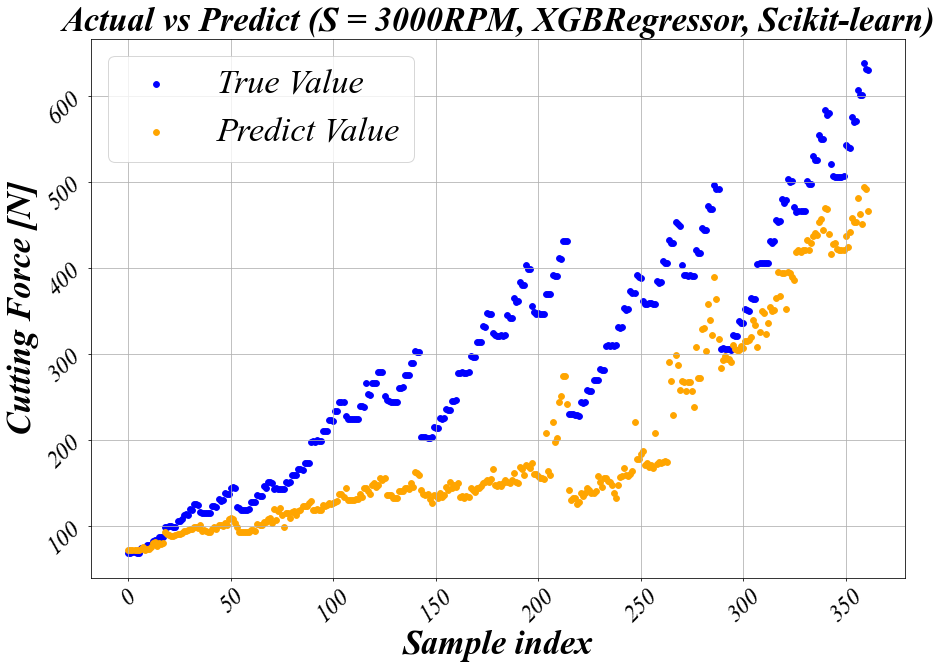

In [216]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 3000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning rpm3000 12800.png")

## rpm 3500

In [217]:
train = pd.concat([rpm_3000, rpm_4000, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [218]:
X_test = rpm_3500.iloc[: , 1:]
y_test = rpm_3500['RMS_CF_max']

In [219]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [226]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 360,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:291.93496	validation_0-mape:0.98753	validation_1-rmse:299.20651	validation_1-mape:0.98752
[1]	validation_0-rmse:289.07704	validation_0-mape:0.97766	validation_1-rmse:296.24935	validation_1-mape:0.97779
[2]	validation_0-rmse:286.24750	validation_0-mape:0.96787	validation_1-rmse:293.22692	validation_1-mape:0.96797
[3]	validation_0-rmse:283.44521	validation_0-mape:0.95819	validation_1-rmse:290.33022	validation_1-mape:0.95847
[4]	validation_0-rmse:280.67191	validation_0-mape:0.94860	validation_1-rmse:287.36784	validation_1-mape:0.94885
[5]	validation_0-rmse:277.92533	validation_0-mape:0.93911	validation_1-rmse:284.52881	validation_1-mape:0.93953
[6]	validation_0-rmse:275.20721	validation_0-mape:0.92970	validation_1-rmse:281.62514	validation_1-mape:0.93010
[7]	validation_0-rmse:272.51517	validation_0-mape:0.92040	validation_1-rmse:278.84007	validation_1-mape:0.92094
[8]	validation_0-rmse:269.85116	validation_0-mape:0.91118	validation_1-rmse:275.99094	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[40]	validation_0-rmse:197.27936	validation_0-mape:0.66058	validation_1-rmse:200.60679	validation_1-mape:0.66161
[41]	validation_0-rmse:195.36456	validation_0-mape:0.65398	validation_1-rmse:198.61251	validation_1-mape:0.65466
[42]	validation_0-rmse:193.46808	validation_0-mape:0.64746	validation_1-rmse:196.71373	validation_1-mape:0.64819
[43]	validation_0-rmse:191.59117	validation_0-mape:0.64099	validation_1-rmse:194.76709	validation_1-mape:0.64158
[44]	validation_0-rmse:189.73031	validation_0-mape:0.63459	validation_1-rmse:192.86067	validation_1-mape:0.63519
[45]	validation_0-rmse:187.89054	validation_0-mape:0.62825	validation_1-rmse:190.95485	validation_1-mape:0.62873
[46]	validation_0-rmse:186.06626	validation_0-mape:0.62199	validation_1-rmse:189.13787	validation_1-mape:0.62269
[47]	validation_0-rmse:184.26289	validation_0-mape:0.61577	validation_1-rmse:187.26036	validation_1-mape:0.61614
[48]	validation_0-rmse:182.47477	validation_0-mape:0.60963	validation_1-rmse:185.42571	validatio

[113]	validation_0-rmse:97.19805	validation_0-mape:0.31790	validation_1-rmse:99.56408	validation_1-mape:0.31269
[114]	validation_0-rmse:96.26634	validation_0-mape:0.31473	validation_1-rmse:98.55243	validation_1-mape:0.30942
[115]	validation_0-rmse:95.34486	validation_0-mape:0.31160	validation_1-rmse:97.48206	validation_1-mape:0.30586
[116]	validation_0-rmse:94.43169	validation_0-mape:0.30850	validation_1-rmse:96.49033	validation_1-mape:0.30265
[117]	validation_0-rmse:93.52833	validation_0-mape:0.30543	validation_1-rmse:95.44752	validation_1-mape:0.29920
[118]	validation_0-rmse:92.63403	validation_0-mape:0.30240	validation_1-rmse:94.41393	validation_1-mape:0.29577
[119]	validation_0-rmse:91.74767	validation_0-mape:0.29938	validation_1-rmse:93.45499	validation_1-mape:0.29266
[120]	validation_0-rmse:90.87068	validation_0-mape:0.29640	validation_1-rmse:92.53477	validation_1-mape:0.28945
[121]	validation_0-rmse:90.00210	validation_0-mape:0.29344	validation_1-rmse:91.50326	validation_1-mape:

[187]	validation_0-rmse:48.08099	validation_0-mape:0.15185	validation_1-rmse:46.76156	validation_1-mape:0.13403
[188]	validation_0-rmse:47.63183	validation_0-mape:0.15033	validation_1-rmse:46.25302	validation_1-mape:0.13215
[189]	validation_0-rmse:47.19019	validation_0-mape:0.14884	validation_1-rmse:45.84394	validation_1-mape:0.13054
[190]	validation_0-rmse:46.74799	validation_0-mape:0.14737	validation_1-rmse:45.45768	validation_1-mape:0.12906
[191]	validation_0-rmse:46.31203	validation_0-mape:0.14590	validation_1-rmse:44.96729	validation_1-mape:0.12721
[192]	validation_0-rmse:45.88054	validation_0-mape:0.14446	validation_1-rmse:44.56076	validation_1-mape:0.12554
[193]	validation_0-rmse:45.45128	validation_0-mape:0.14303	validation_1-rmse:44.18774	validation_1-mape:0.12398
[194]	validation_0-rmse:45.02797	validation_0-mape:0.14162	validation_1-rmse:43.77882	validation_1-mape:0.12253
[195]	validation_0-rmse:44.60921	validation_0-mape:0.14021	validation_1-rmse:43.30842	validation_1-mape:

[261]	validation_0-rmse:24.37077	validation_0-mape:0.07286	validation_1-rmse:27.26673	validation_1-mape:0.06774
[262]	validation_0-rmse:24.15102	validation_0-mape:0.07215	validation_1-rmse:27.10412	validation_1-mape:0.06732
[263]	validation_0-rmse:23.93731	validation_0-mape:0.07144	validation_1-rmse:26.97425	validation_1-mape:0.06704
[264]	validation_0-rmse:23.72195	validation_0-mape:0.07073	validation_1-rmse:26.81942	validation_1-mape:0.06666
[265]	validation_0-rmse:23.51208	validation_0-mape:0.07004	validation_1-rmse:26.72526	validation_1-mape:0.06644
[266]	validation_0-rmse:23.30070	validation_0-mape:0.06935	validation_1-rmse:26.57620	validation_1-mape:0.06607
[267]	validation_0-rmse:23.09145	validation_0-mape:0.06867	validation_1-rmse:26.42902	validation_1-mape:0.06570
[268]	validation_0-rmse:22.88827	validation_0-mape:0.06799	validation_1-rmse:26.30226	validation_1-mape:0.06539
[269]	validation_0-rmse:22.68658	validation_0-mape:0.06732	validation_1-rmse:26.21898	validation_1-mape:

[335]	validation_0-rmse:12.94013	validation_0-mape:0.03520	validation_1-rmse:22.91253	validation_1-mape:0.06025
[336]	validation_0-rmse:12.83698	validation_0-mape:0.03486	validation_1-rmse:22.88545	validation_1-mape:0.06022
[337]	validation_0-rmse:12.73567	validation_0-mape:0.03453	validation_1-rmse:22.86383	validation_1-mape:0.06021
[338]	validation_0-rmse:12.63311	validation_0-mape:0.03420	validation_1-rmse:22.83749	validation_1-mape:0.06020
[339]	validation_0-rmse:12.53384	validation_0-mape:0.03388	validation_1-rmse:22.82998	validation_1-mape:0.06020
[340]	validation_0-rmse:12.43357	validation_0-mape:0.03355	validation_1-rmse:22.80618	validation_1-mape:0.06018
[341]	validation_0-rmse:12.33529	validation_0-mape:0.03323	validation_1-rmse:22.78155	validation_1-mape:0.06018
[342]	validation_0-rmse:12.23945	validation_0-mape:0.03291	validation_1-rmse:22.75185	validation_1-mape:0.06013
[343]	validation_0-rmse:12.14339	validation_0-mape:0.03260	validation_1-rmse:22.73528	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=360, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [227]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 10.7243
Train MAPE: 2.8073
Test RMSE: 22.5319
Test MAPE: 6.0367


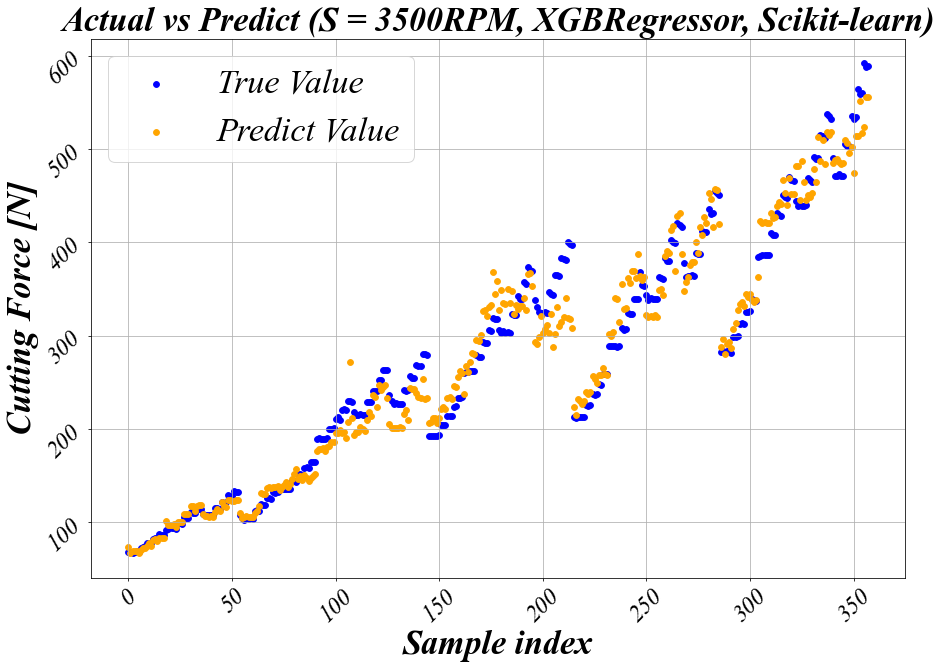

In [229]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 3500RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning rpm3500 12800.png")

## rpm 4000

In [230]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4500, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [231]:
X_test = rpm_4000.iloc[: , 1:]
y_test = rpm_4000['RMS_CF_max']

In [232]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [233]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:293.75018	validation_0-mape:0.98754	validation_1-rmse:292.03068	validation_1-mape:0.98725
[1]	validation_0-rmse:290.87371	validation_0-mape:0.97765	validation_1-rmse:289.09434	validation_1-mape:0.97697
[2]	validation_0-rmse:288.02669	validation_0-mape:0.96786	validation_1-rmse:286.20280	validation_1-mape:0.96688
[3]	validation_0-rmse:285.20752	validation_0-mape:0.95817	validation_1-rmse:283.34867	validation_1-mape:0.95684
[4]	validation_0-rmse:282.41905	validation_0-mape:0.94858	validation_1-rmse:280.53513	validation_1-mape:0.94699
[5]	validation_0-rmse:279.65590	validation_0-mape:0.93908	validation_1-rmse:277.74730	validation_1-mape:0.93718
[6]	validation_0-rmse:276.92099	validation_0-mape:0.92968	validation_1-rmse:274.98852	validation_1-mape:0.92752
[7]	validation_0-rmse:274.21346	validation_0-mape:0.92038	validation_1-rmse:272.25175	validation_1-mape:0.91791
[8]	validation_0-rmse:271.53188	validation_0-mape:0.91116	validation_1-rmse:269.51743	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[32]	validation_0-rmse:214.63982	validation_0-mape:0.71584	validation_1-rmse:212.40465	validation_1-mape:0.70739
[33]	validation_0-rmse:212.55331	validation_0-mape:0.70869	validation_1-rmse:210.29390	validation_1-mape:0.70007
[34]	validation_0-rmse:210.48521	validation_0-mape:0.70161	validation_1-rmse:208.29949	validation_1-mape:0.69298
[35]	validation_0-rmse:208.43989	validation_0-mape:0.69461	validation_1-rmse:206.09179	validation_1-mape:0.68549
[36]	validation_0-rmse:206.41353	validation_0-mape:0.68766	validation_1-rmse:204.09104	validation_1-mape:0.67846
[37]	validation_0-rmse:204.40774	validation_0-mape:0.68078	validation_1-rmse:201.93531	validation_1-mape:0.67126
[38]	validation_0-rmse:202.42012	validation_0-mape:0.67397	validation_1-rmse:199.91528	validation_1-mape:0.66433
[39]	validation_0-rmse:200.45450	validation_0-mape:0.66722	validation_1-rmse:197.82370	validation_1-mape:0.65717
[40]	validation_0-rmse:198.50749	validation_0-mape:0.66055	validation_1-rmse:195.89857	validatio

[105]	validation_0-rmse:105.63280	validation_0-mape:0.34459	validation_1-rmse:106.05847	validation_1-mape:0.33032
[106]	validation_0-rmse:104.62024	validation_0-mape:0.34116	validation_1-rmse:105.08352	validation_1-mape:0.32687
[107]	validation_0-rmse:103.61727	validation_0-mape:0.33778	validation_1-rmse:104.12799	validation_1-mape:0.32333
[108]	validation_0-rmse:102.62411	validation_0-mape:0.33442	validation_1-rmse:103.18624	validation_1-mape:0.31985
[109]	validation_0-rmse:101.64040	validation_0-mape:0.33110	validation_1-rmse:102.24164	validation_1-mape:0.31650
[110]	validation_0-rmse:100.66686	validation_0-mape:0.32781	validation_1-rmse:101.31811	validation_1-mape:0.31309
[111]	validation_0-rmse:99.70297	validation_0-mape:0.32456	validation_1-rmse:100.39309	validation_1-mape:0.30978
[112]	validation_0-rmse:98.74893	validation_0-mape:0.32134	validation_1-rmse:99.48941	validation_1-mape:0.30642
[113]	validation_0-rmse:97.80439	validation_0-mape:0.31815	validation_1-rmse:98.59656	valid

[179]	validation_0-rmse:52.16555	validation_0-mape:0.16498	validation_1-rmse:57.10499	validation_1-mape:0.15337
[180]	validation_0-rmse:51.67616	validation_0-mape:0.16335	validation_1-rmse:56.66090	validation_1-mape:0.15190
[181]	validation_0-rmse:51.19148	validation_0-mape:0.16174	validation_1-rmse:56.23497	validation_1-mape:0.15046
[182]	validation_0-rmse:50.71100	validation_0-mape:0.16014	validation_1-rmse:55.89534	validation_1-mape:0.14922
[183]	validation_0-rmse:50.23601	validation_0-mape:0.15857	validation_1-rmse:55.47516	validation_1-mape:0.14780
[184]	validation_0-rmse:49.76636	validation_0-mape:0.15700	validation_1-rmse:55.09718	validation_1-mape:0.14649
[185]	validation_0-rmse:49.30035	validation_0-mape:0.15544	validation_1-rmse:54.68733	validation_1-mape:0.14510
[186]	validation_0-rmse:48.84203	validation_0-mape:0.15390	validation_1-rmse:54.28527	validation_1-mape:0.14366
[187]	validation_0-rmse:48.38593	validation_0-mape:0.15238	validation_1-rmse:53.88449	validation_1-mape:

[326]	validation_0-rmse:14.10822	validation_0-mape:0.03872	validation_1-rmse:29.77628	validation_1-mape:0.06990
[327]	validation_0-rmse:13.99543	validation_0-mape:0.03835	validation_1-rmse:29.72636	validation_1-mape:0.06981
[328]	validation_0-rmse:13.88273	validation_0-mape:0.03799	validation_1-rmse:29.67650	validation_1-mape:0.06971
[329]	validation_0-rmse:13.77363	validation_0-mape:0.03763	validation_1-rmse:29.62687	validation_1-mape:0.06962
[330]	validation_0-rmse:13.66326	validation_0-mape:0.03727	validation_1-rmse:29.57939	validation_1-mape:0.06953
[331]	validation_0-rmse:13.55404	validation_0-mape:0.03692	validation_1-rmse:29.52999	validation_1-mape:0.06944
[332]	validation_0-rmse:13.44567	validation_0-mape:0.03657	validation_1-rmse:29.48171	validation_1-mape:0.06934
[333]	validation_0-rmse:13.33867	validation_0-mape:0.03622	validation_1-rmse:29.43396	validation_1-mape:0.06926
[334]	validation_0-rmse:13.23424	validation_0-mape:0.03588	validation_1-rmse:29.38703	validation_1-mape:

[400]	validation_0-rmse:8.12883	validation_0-mape:0.02004	validation_1-rmse:27.15154	validation_1-mape:0.06603
[401]	validation_0-rmse:8.07474	validation_0-mape:0.01989	validation_1-rmse:27.13172	validation_1-mape:0.06600
[402]	validation_0-rmse:8.01953	validation_0-mape:0.01973	validation_1-rmse:27.11188	validation_1-mape:0.06597
[403]	validation_0-rmse:7.96493	validation_0-mape:0.01958	validation_1-rmse:27.09182	validation_1-mape:0.06593
[404]	validation_0-rmse:7.91403	validation_0-mape:0.01943	validation_1-rmse:27.07416	validation_1-mape:0.06591
[405]	validation_0-rmse:7.86209	validation_0-mape:0.01928	validation_1-rmse:27.04592	validation_1-mape:0.06589
[406]	validation_0-rmse:7.81057	validation_0-mape:0.01913	validation_1-rmse:27.02630	validation_1-mape:0.06586
[407]	validation_0-rmse:7.75876	validation_0-mape:0.01898	validation_1-rmse:26.99993	validation_1-mape:0.06583
[408]	validation_0-rmse:7.70860	validation_0-mape:0.01884	validation_1-rmse:26.97513	validation_1-mape:0.06580
[

[474]	validation_0-rmse:5.29640	validation_0-mape:0.01258	validation_1-rmse:26.11782	validation_1-mape:0.06476
[475]	validation_0-rmse:5.26914	validation_0-mape:0.01253	validation_1-rmse:26.10353	validation_1-mape:0.06475
[476]	validation_0-rmse:5.24245	validation_0-mape:0.01247	validation_1-rmse:26.08942	validation_1-mape:0.06473
[477]	validation_0-rmse:5.21575	validation_0-mape:0.01241	validation_1-rmse:26.07555	validation_1-mape:0.06471
[478]	validation_0-rmse:5.18935	validation_0-mape:0.01236	validation_1-rmse:26.05761	validation_1-mape:0.06469
[479]	validation_0-rmse:5.16572	validation_0-mape:0.01231	validation_1-rmse:26.05348	validation_1-mape:0.06469
[480]	validation_0-rmse:5.13995	validation_0-mape:0.01225	validation_1-rmse:26.04001	validation_1-mape:0.06468
[481]	validation_0-rmse:5.11397	validation_0-mape:0.01220	validation_1-rmse:26.02586	validation_1-mape:0.06467
[482]	validation_0-rmse:5.08851	validation_0-mape:0.01215	validation_1-rmse:26.01535	validation_1-mape:0.06466
[

[548]	validation_0-rmse:3.90141	validation_0-mape:0.00984	validation_1-rmse:25.56493	validation_1-mape:0.06423
[549]	validation_0-rmse:3.88624	validation_0-mape:0.00981	validation_1-rmse:25.56707	validation_1-mape:0.06424
[550]	validation_0-rmse:3.87123	validation_0-mape:0.00978	validation_1-rmse:25.56928	validation_1-mape:0.06425
[551]	validation_0-rmse:3.85722	validation_0-mape:0.00975	validation_1-rmse:25.56107	validation_1-mape:0.06424
[552]	validation_0-rmse:3.84504	validation_0-mape:0.00974	validation_1-rmse:25.55576	validation_1-mape:0.06423
[553]	validation_0-rmse:3.83228	validation_0-mape:0.00971	validation_1-rmse:25.55239	validation_1-mape:0.06423
[554]	validation_0-rmse:3.82034	validation_0-mape:0.00969	validation_1-rmse:25.54737	validation_1-mape:0.06423
[555]	validation_0-rmse:3.80713	validation_0-mape:0.00967	validation_1-rmse:25.54398	validation_1-mape:0.06423
[556]	validation_0-rmse:3.79472	validation_0-mape:0.00964	validation_1-rmse:25.54151	validation_1-mape:0.06423
[

[622]	validation_0-rmse:3.13905	validation_0-mape:0.00849	validation_1-rmse:25.21149	validation_1-mape:0.06399
[623]	validation_0-rmse:3.13218	validation_0-mape:0.00847	validation_1-rmse:25.21286	validation_1-mape:0.06399
[624]	validation_0-rmse:3.12302	validation_0-mape:0.00846	validation_1-rmse:25.20259	validation_1-mape:0.06398
[625]	validation_0-rmse:3.11418	validation_0-mape:0.00843	validation_1-rmse:25.19446	validation_1-mape:0.06397
[626]	validation_0-rmse:3.10558	validation_0-mape:0.00842	validation_1-rmse:25.19190	validation_1-mape:0.06397
[627]	validation_0-rmse:3.09704	validation_0-mape:0.00841	validation_1-rmse:25.18200	validation_1-mape:0.06396
[628]	validation_0-rmse:3.08859	validation_0-mape:0.00840	validation_1-rmse:25.17894	validation_1-mape:0.06395
[629]	validation_0-rmse:3.08069	validation_0-mape:0.00838	validation_1-rmse:25.16775	validation_1-mape:0.06393
[630]	validation_0-rmse:3.07220	validation_0-mape:0.00836	validation_1-rmse:25.15981	validation_1-mape:0.06392
[

[696]	validation_0-rmse:2.65185	validation_0-mape:0.00755	validation_1-rmse:25.04918	validation_1-mape:0.06393
[697]	validation_0-rmse:2.64726	validation_0-mape:0.00754	validation_1-rmse:25.04832	validation_1-mape:0.06393
[698]	validation_0-rmse:2.64275	validation_0-mape:0.00753	validation_1-rmse:25.04667	validation_1-mape:0.06393
[699]	validation_0-rmse:2.63780	validation_0-mape:0.00752	validation_1-rmse:25.04445	validation_1-mape:0.06393
[700]	validation_0-rmse:2.63351	validation_0-mape:0.00751	validation_1-rmse:25.04446	validation_1-mape:0.06393
[701]	validation_0-rmse:2.62819	validation_0-mape:0.00750	validation_1-rmse:25.04547	validation_1-mape:0.06393
[702]	validation_0-rmse:2.62092	validation_0-mape:0.00748	validation_1-rmse:25.04265	validation_1-mape:0.06393
[703]	validation_0-rmse:2.61737	validation_0-mape:0.00747	validation_1-rmse:25.04106	validation_1-mape:0.06393
[704]	validation_0-rmse:2.61314	validation_0-mape:0.00746	validation_1-rmse:25.03894	validation_1-mape:0.06393
[

[770]	validation_0-rmse:2.31976	validation_0-mape:0.00680	validation_1-rmse:24.97204	validation_1-mape:0.06387
[771]	validation_0-rmse:2.31571	validation_0-mape:0.00679	validation_1-rmse:24.97212	validation_1-mape:0.06387
[772]	validation_0-rmse:2.31268	validation_0-mape:0.00679	validation_1-rmse:24.97194	validation_1-mape:0.06387
[773]	validation_0-rmse:2.30885	validation_0-mape:0.00678	validation_1-rmse:24.97022	validation_1-mape:0.06387
[774]	validation_0-rmse:2.30517	validation_0-mape:0.00677	validation_1-rmse:24.96857	validation_1-mape:0.06387
[775]	validation_0-rmse:2.30119	validation_0-mape:0.00676	validation_1-rmse:24.96826	validation_1-mape:0.06387
[776]	validation_0-rmse:2.29757	validation_0-mape:0.00675	validation_1-rmse:24.96748	validation_1-mape:0.06387
[777]	validation_0-rmse:2.29409	validation_0-mape:0.00674	validation_1-rmse:24.96638	validation_1-mape:0.06386
[778]	validation_0-rmse:2.29131	validation_0-mape:0.00674	validation_1-rmse:24.96731	validation_1-mape:0.06387
[

[844]	validation_0-rmse:2.07725	validation_0-mape:0.00622	validation_1-rmse:24.96597	validation_1-mape:0.06387
[845]	validation_0-rmse:2.07499	validation_0-mape:0.00622	validation_1-rmse:24.96533	validation_1-mape:0.06387
[846]	validation_0-rmse:2.07157	validation_0-mape:0.00621	validation_1-rmse:24.96462	validation_1-mape:0.06387
[847]	validation_0-rmse:2.07014	validation_0-mape:0.00621	validation_1-rmse:24.96563	validation_1-mape:0.06388
[848]	validation_0-rmse:2.06743	validation_0-mape:0.00620	validation_1-rmse:24.96651	validation_1-mape:0.06388
[849]	validation_0-rmse:2.06452	validation_0-mape:0.00619	validation_1-rmse:24.96644	validation_1-mape:0.06388
[850]	validation_0-rmse:2.06143	validation_0-mape:0.00619	validation_1-rmse:24.96707	validation_1-mape:0.06389
[851]	validation_0-rmse:2.05989	validation_0-mape:0.00618	validation_1-rmse:24.96961	validation_1-mape:0.06390
[852]	validation_0-rmse:2.05630	validation_0-mape:0.00618	validation_1-rmse:24.96933	validation_1-mape:0.06390
[

[918]	validation_0-rmse:1.87558	validation_0-mape:0.00572	validation_1-rmse:24.96805	validation_1-mape:0.06400
[919]	validation_0-rmse:1.87309	validation_0-mape:0.00571	validation_1-rmse:24.96686	validation_1-mape:0.06400
[920]	validation_0-rmse:1.87068	validation_0-mape:0.00571	validation_1-rmse:24.96750	validation_1-mape:0.06400
[921]	validation_0-rmse:1.86931	validation_0-mape:0.00570	validation_1-rmse:24.96815	validation_1-mape:0.06400
[922]	validation_0-rmse:1.86798	validation_0-mape:0.00570	validation_1-rmse:24.96791	validation_1-mape:0.06400
[923]	validation_0-rmse:1.86589	validation_0-mape:0.00569	validation_1-rmse:24.96631	validation_1-mape:0.06400
[924]	validation_0-rmse:1.86374	validation_0-mape:0.00569	validation_1-rmse:24.96540	validation_1-mape:0.06400
[925]	validation_0-rmse:1.86159	validation_0-mape:0.00568	validation_1-rmse:24.96523	validation_1-mape:0.06400
[926]	validation_0-rmse:1.85982	validation_0-mape:0.00568	validation_1-rmse:24.96570	validation_1-mape:0.06400
[

[992]	validation_0-rmse:1.73982	validation_0-mape:0.00538	validation_1-rmse:24.97843	validation_1-mape:0.06404
[993]	validation_0-rmse:1.73800	validation_0-mape:0.00537	validation_1-rmse:24.97820	validation_1-mape:0.06404
[994]	validation_0-rmse:1.73597	validation_0-mape:0.00537	validation_1-rmse:24.97719	validation_1-mape:0.06403
[995]	validation_0-rmse:1.73381	validation_0-mape:0.00536	validation_1-rmse:24.97764	validation_1-mape:0.06404
[996]	validation_0-rmse:1.73194	validation_0-mape:0.00536	validation_1-rmse:24.97912	validation_1-mape:0.06404
[997]	validation_0-rmse:1.73093	validation_0-mape:0.00536	validation_1-rmse:24.98035	validation_1-mape:0.06404
[998]	validation_0-rmse:1.72843	validation_0-mape:0.00535	validation_1-rmse:24.97975	validation_1-mape:0.06404
[999]	validation_0-rmse:1.72751	validation_0-mape:0.00535	validation_1-rmse:24.97978	validation_1-mape:0.06404


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [234]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7275
Train MAPE: 0.5346
Test RMSE: 24.9798
Test MAPE: 6.4039


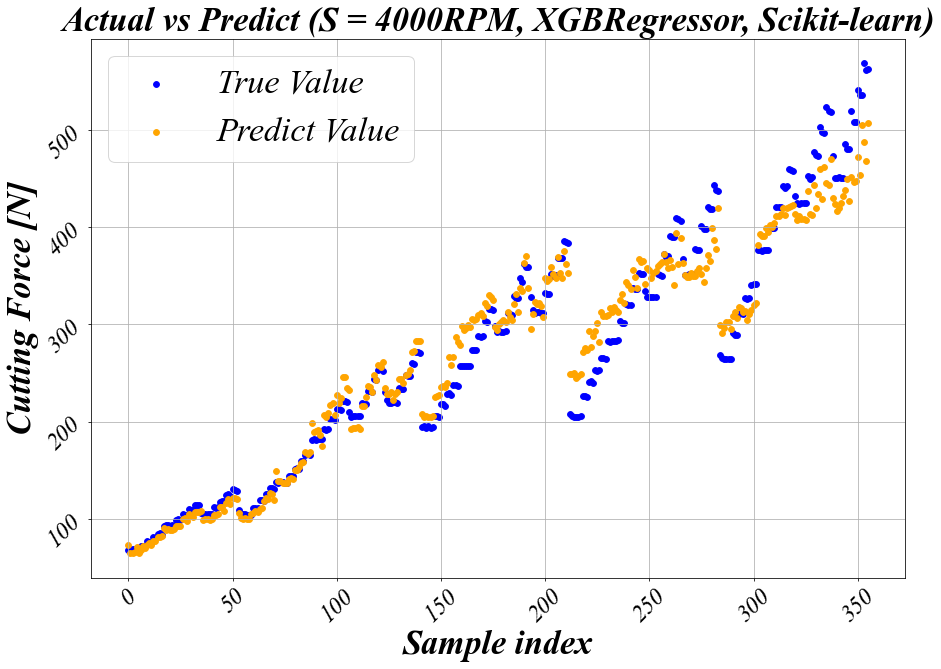

In [235]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 4000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning rpm4000 12800.png")

## rpm 4500

In [236]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_5000], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [237]:
X_test = rpm_4500.iloc[: , 1:]
y_test = rpm_4500['RMS_CF_max']

In [238]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [239]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 200,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:296.70781	validation_0-mape:0.98758	validation_1-rmse:279.49164	validation_1-mape:0.98568
[1]	validation_0-rmse:293.79859	validation_0-mape:0.97771	validation_1-rmse:276.18512	validation_1-mape:0.97405
[2]	validation_0-rmse:290.91846	validation_0-mape:0.96794	validation_1-rmse:272.91376	validation_1-mape:0.96254
[3]	validation_0-rmse:288.06716	validation_0-mape:0.95827	validation_1-rmse:269.67388	validation_1-mape:0.95114
[4]	validation_0-rmse:285.24433	validation_0-mape:0.94869	validation_1-rmse:266.46859	validation_1-mape:0.93986
[5]	validation_0-rmse:282.44977	validation_0-mape:0.93921	validation_1-rmse:263.45707	validation_1-mape:0.92893
[6]	validation_0-rmse:279.68307	validation_0-mape:0.92982	validation_1-rmse:260.31613	validation_1-mape:0.91787
[7]	validation_0-rmse:276.94407	validation_0-mape:0.92052	validation_1-rmse:257.36299	validation_1-mape:0.90716
[8]	validation_0-rmse:274.23241	validation_0-mape:0.91132	validation_1-rmse:254.28517	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[35]	validation_0-rmse:210.39651	validation_0-mape:0.69489	validation_1-rmse:184.29951	validation_1-mape:0.64519
[36]	validation_0-rmse:208.34643	validation_0-mape:0.68796	validation_1-rmse:182.11438	validation_1-mape:0.63720
[37]	validation_0-rmse:206.31592	validation_0-mape:0.68108	validation_1-rmse:179.81894	validation_1-mape:0.62913
[38]	validation_0-rmse:204.30681	validation_0-mape:0.67426	validation_1-rmse:177.51453	validation_1-mape:0.62087
[39]	validation_0-rmse:202.31728	validation_0-mape:0.66753	validation_1-rmse:175.36671	validation_1-mape:0.61302
[40]	validation_0-rmse:200.34686	validation_0-mape:0.66086	validation_1-rmse:173.13716	validation_1-mape:0.60518
[41]	validation_0-rmse:198.39686	validation_0-mape:0.65426	validation_1-rmse:171.13942	validation_1-mape:0.59792
[42]	validation_0-rmse:196.46507	validation_0-mape:0.64773	validation_1-rmse:168.91779	validation_1-mape:0.59010
[43]	validation_0-rmse:194.55330	validation_0-mape:0.64125	validation_1-rmse:166.84381	validatio

[108]	validation_0-rmse:103.42729	validation_0-mape:0.33447	validation_1-rmse:70.33049	validation_1-mape:0.23271
[109]	validation_0-rmse:102.43131	validation_0-mape:0.33116	validation_1-rmse:69.22886	validation_1-mape:0.22880
[110]	validation_0-rmse:101.44637	validation_0-mape:0.32787	validation_1-rmse:68.28282	validation_1-mape:0.22518
[111]	validation_0-rmse:100.47010	validation_0-mape:0.32461	validation_1-rmse:67.27793	validation_1-mape:0.22146
[112]	validation_0-rmse:99.50417	validation_0-mape:0.32138	validation_1-rmse:66.37022	validation_1-mape:0.21796
[113]	validation_0-rmse:98.54708	validation_0-mape:0.31819	validation_1-rmse:65.39657	validation_1-mape:0.21434
[114]	validation_0-rmse:97.59951	validation_0-mape:0.31503	validation_1-rmse:64.35777	validation_1-mape:0.21059
[115]	validation_0-rmse:96.66147	validation_0-mape:0.31189	validation_1-rmse:63.48214	validation_1-mape:0.20726
[116]	validation_0-rmse:95.73260	validation_0-mape:0.30880	validation_1-rmse:62.54554	validation_1-m

[182]	validation_0-rmse:50.95746	validation_0-mape:0.16008	validation_1-rmse:27.57621	validation_1-mape:0.08084
[183]	validation_0-rmse:50.47912	validation_0-mape:0.15850	validation_1-rmse:27.41833	validation_1-mape:0.08024
[184]	validation_0-rmse:50.00459	validation_0-mape:0.15693	validation_1-rmse:27.29459	validation_1-mape:0.07969
[185]	validation_0-rmse:49.53634	validation_0-mape:0.15537	validation_1-rmse:27.19340	validation_1-mape:0.07918
[186]	validation_0-rmse:49.07121	validation_0-mape:0.15383	validation_1-rmse:27.08722	validation_1-mape:0.07866
[187]	validation_0-rmse:48.61250	validation_0-mape:0.15231	validation_1-rmse:26.98745	validation_1-mape:0.07821
[188]	validation_0-rmse:48.15673	validation_0-mape:0.15081	validation_1-rmse:26.91809	validation_1-mape:0.07780
[189]	validation_0-rmse:47.70635	validation_0-mape:0.14932	validation_1-rmse:26.82960	validation_1-mape:0.07739
[190]	validation_0-rmse:47.26023	validation_0-mape:0.14783	validation_1-rmse:26.76922	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [240]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 43.4368
Train MAPE: 13.5188
Test RMSE: 26.5993
Test MAPE: 7.4917


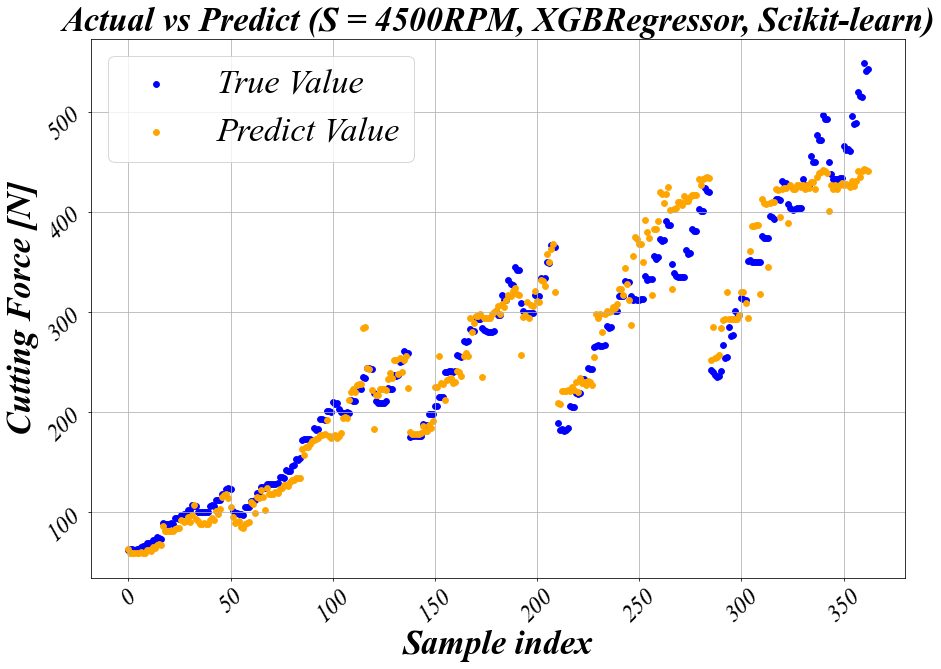

In [242]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 4500RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning rpm4500 12800.png")

## rpm 5000

In [243]:
train = pd.concat([rpm_3000, rpm_3500, rpm_4000, rpm_4500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [244]:
X_test = rpm_5000.iloc[: , 1:]
y_test = rpm_5000['RMS_CF_max']

In [245]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [246]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:298.67456	validation_0-mape:0.98758	validation_1-rmse:271.22034	validation_1-mape:0.98697
[1]	validation_0-rmse:295.74683	validation_0-mape:0.97771	validation_1-rmse:268.63446	validation_1-mape:0.97680
[2]	validation_0-rmse:292.85031	validation_0-mape:0.96792	validation_1-rmse:266.00784	validation_1-mape:0.96667
[3]	validation_0-rmse:289.98072	validation_0-mape:0.95824	validation_1-rmse:263.47420	validation_1-mape:0.95670
[4]	validation_0-rmse:287.14186	validation_0-mape:0.94864	validation_1-rmse:260.89979	validation_1-mape:0.94675
[5]	validation_0-rmse:284.32930	validation_0-mape:0.93915	validation_1-rmse:258.41763	validation_1-mape:0.93698
[6]	validation_0-rmse:281.54649	validation_0-mape:0.92974	validation_1-rmse:255.91440	validation_1-mape:0.92734
[7]	validation_0-rmse:278.78887	validation_0-mape:0.92044	validation_1-rmse:253.47575	validation_1-mape:0.91767
[8]	validation_0-rmse:276.05883	validation_0-mape:0.91123	validation_1-rmse:251.08316	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[37]	validation_0-rmse:207.70404	validation_0-mape:0.68111	validation_1-rmse:191.96453	validation_1-mape:0.67494
[38]	validation_0-rmse:205.68267	validation_0-mape:0.67433	validation_1-rmse:190.23195	validation_1-mape:0.66811
[39]	validation_0-rmse:203.68090	validation_0-mape:0.66761	validation_1-rmse:188.57108	validation_1-mape:0.66152
[40]	validation_0-rmse:201.69618	validation_0-mape:0.66096	validation_1-rmse:186.98757	validation_1-mape:0.65503
[41]	validation_0-rmse:199.73134	validation_0-mape:0.65437	validation_1-rmse:185.41511	validation_1-mape:0.64855
[42]	validation_0-rmse:197.78780	validation_0-mape:0.64785	validation_1-rmse:183.80623	validation_1-mape:0.64214
[43]	validation_0-rmse:195.86446	validation_0-mape:0.64140	validation_1-rmse:182.22779	validation_1-mape:0.63589
[44]	validation_0-rmse:193.95761	validation_0-mape:0.63500	validation_1-rmse:180.71023	validation_1-mape:0.62963
[45]	validation_0-rmse:192.07213	validation_0-mape:0.62868	validation_1-rmse:179.15037	validatio

[110]	validation_0-rmse:102.13657	validation_0-mape:0.32787	validation_1-rmse:110.92104	validation_1-mape:0.34264
[111]	validation_0-rmse:101.15546	validation_0-mape:0.32461	validation_1-rmse:110.17025	validation_1-mape:0.33974
[112]	validation_0-rmse:100.18498	validation_0-mape:0.32138	validation_1-rmse:109.62021	validation_1-mape:0.33719
[113]	validation_0-rmse:99.22328	validation_0-mape:0.31819	validation_1-rmse:108.93771	validation_1-mape:0.33438
[114]	validation_0-rmse:98.27279	validation_0-mape:0.31503	validation_1-rmse:108.22865	validation_1-mape:0.33145
[115]	validation_0-rmse:97.33039	validation_0-mape:0.31190	validation_1-rmse:107.55227	validation_1-mape:0.32871
[116]	validation_0-rmse:96.39794	validation_0-mape:0.30879	validation_1-rmse:107.01950	validation_1-mape:0.32620
[117]	validation_0-rmse:95.47405	validation_0-mape:0.30572	validation_1-rmse:106.32061	validation_1-mape:0.32352
[118]	validation_0-rmse:94.55966	validation_0-mape:0.30268	validation_1-rmse:105.71140	valida

[183]	validation_0-rmse:50.85810	validation_0-mape:0.15842	validation_1-rmse:75.78729	validation_1-mape:0.19667
[184]	validation_0-rmse:50.37992	validation_0-mape:0.15685	validation_1-rmse:75.49871	validation_1-mape:0.19542
[185]	validation_0-rmse:49.90831	validation_0-mape:0.15530	validation_1-rmse:75.17227	validation_1-mape:0.19408
[186]	validation_0-rmse:49.43952	validation_0-mape:0.15377	validation_1-rmse:74.89060	validation_1-mape:0.19290
[187]	validation_0-rmse:48.97701	validation_0-mape:0.15225	validation_1-rmse:74.58682	validation_1-mape:0.19166
[188]	validation_0-rmse:48.51881	validation_0-mape:0.15074	validation_1-rmse:74.29294	validation_1-mape:0.19036
[189]	validation_0-rmse:48.06333	validation_0-mape:0.14925	validation_1-rmse:73.98705	validation_1-mape:0.18916
[190]	validation_0-rmse:47.61139	validation_0-mape:0.14777	validation_1-rmse:73.63931	validation_1-mape:0.18785
[191]	validation_0-rmse:47.16691	validation_0-mape:0.14632	validation_1-rmse:73.33381	validation_1-mape:

[257]	validation_0-rmse:25.62284	validation_0-mape:0.07605	validation_1-rmse:58.03898	validation_1-mape:0.12868
[258]	validation_0-rmse:25.39233	validation_0-mape:0.07530	validation_1-rmse:57.85383	validation_1-mape:0.12808
[259]	validation_0-rmse:25.16427	validation_0-mape:0.07456	validation_1-rmse:57.67513	validation_1-mape:0.12744
[260]	validation_0-rmse:24.93771	validation_0-mape:0.07383	validation_1-rmse:57.52687	validation_1-mape:0.12687
[261]	validation_0-rmse:24.71409	validation_0-mape:0.07310	validation_1-rmse:57.38906	validation_1-mape:0.12626
[262]	validation_0-rmse:24.49224	validation_0-mape:0.07238	validation_1-rmse:57.23994	validation_1-mape:0.12568
[263]	validation_0-rmse:24.27321	validation_0-mape:0.07167	validation_1-rmse:57.06852	validation_1-mape:0.12507
[264]	validation_0-rmse:24.05439	validation_0-mape:0.07097	validation_1-rmse:56.90682	validation_1-mape:0.12451
[265]	validation_0-rmse:23.83757	validation_0-mape:0.07027	validation_1-rmse:56.73631	validation_1-mape:

[331]	validation_0-rmse:13.44074	validation_0-mape:0.03667	validation_1-rmse:48.55125	validation_1-mape:0.09736
[332]	validation_0-rmse:13.32979	validation_0-mape:0.03632	validation_1-rmse:48.47442	validation_1-mape:0.09713
[333]	validation_0-rmse:13.21845	validation_0-mape:0.03597	validation_1-rmse:48.39234	validation_1-mape:0.09691
[334]	validation_0-rmse:13.10833	validation_0-mape:0.03562	validation_1-rmse:48.32513	validation_1-mape:0.09668
[335]	validation_0-rmse:13.00151	validation_0-mape:0.03527	validation_1-rmse:48.25524	validation_1-mape:0.09647
[336]	validation_0-rmse:12.89511	validation_0-mape:0.03493	validation_1-rmse:48.13236	validation_1-mape:0.09617
[337]	validation_0-rmse:12.78855	validation_0-mape:0.03460	validation_1-rmse:48.05333	validation_1-mape:0.09596
[338]	validation_0-rmse:12.68304	validation_0-mape:0.03427	validation_1-rmse:47.97234	validation_1-mape:0.09574
[339]	validation_0-rmse:12.57987	validation_0-mape:0.03394	validation_1-rmse:47.86031	validation_1-mape:

[405]	validation_0-rmse:7.58031	validation_0-mape:0.01860	validation_1-rmse:44.17995	validation_1-mape:0.08553
[406]	validation_0-rmse:7.52700	validation_0-mape:0.01844	validation_1-rmse:44.15520	validation_1-mape:0.08545
[407]	validation_0-rmse:7.47446	validation_0-mape:0.01830	validation_1-rmse:44.09787	validation_1-mape:0.08534
[408]	validation_0-rmse:7.42227	validation_0-mape:0.01815	validation_1-rmse:44.06787	validation_1-mape:0.08531
[409]	validation_0-rmse:7.37036	validation_0-mape:0.01800	validation_1-rmse:44.01254	validation_1-mape:0.08521
[410]	validation_0-rmse:7.31919	validation_0-mape:0.01785	validation_1-rmse:43.98971	validation_1-mape:0.08519
[411]	validation_0-rmse:7.26828	validation_0-mape:0.01771	validation_1-rmse:43.95471	validation_1-mape:0.08510
[412]	validation_0-rmse:7.21889	validation_0-mape:0.01758	validation_1-rmse:43.92906	validation_1-mape:0.08502
[413]	validation_0-rmse:7.16849	validation_0-mape:0.01743	validation_1-rmse:43.89793	validation_1-mape:0.08494
[

[479]	validation_0-rmse:4.77379	validation_0-mape:0.01135	validation_1-rmse:41.46241	validation_1-mape:0.07976
[480]	validation_0-rmse:4.74932	validation_0-mape:0.01129	validation_1-rmse:41.44983	validation_1-mape:0.07972
[481]	validation_0-rmse:4.72556	validation_0-mape:0.01124	validation_1-rmse:41.43410	validation_1-mape:0.07969
[482]	validation_0-rmse:4.70161	validation_0-mape:0.01119	validation_1-rmse:41.41556	validation_1-mape:0.07964
[483]	validation_0-rmse:4.67699	validation_0-mape:0.01113	validation_1-rmse:41.39176	validation_1-mape:0.07958
[484]	validation_0-rmse:4.65428	validation_0-mape:0.01108	validation_1-rmse:41.37617	validation_1-mape:0.07954
[485]	validation_0-rmse:4.62989	validation_0-mape:0.01103	validation_1-rmse:41.35433	validation_1-mape:0.07950
[486]	validation_0-rmse:4.60771	validation_0-mape:0.01098	validation_1-rmse:41.33933	validation_1-mape:0.07947
[487]	validation_0-rmse:4.58536	validation_0-mape:0.01092	validation_1-rmse:41.32398	validation_1-mape:0.07943
[

[553]	validation_0-rmse:3.50240	validation_0-mape:0.00870	validation_1-rmse:40.52881	validation_1-mape:0.07777
[554]	validation_0-rmse:3.48934	validation_0-mape:0.00868	validation_1-rmse:40.52358	validation_1-mape:0.07776
[555]	validation_0-rmse:3.47703	validation_0-mape:0.00866	validation_1-rmse:40.51594	validation_1-mape:0.07775
[556]	validation_0-rmse:3.46662	validation_0-mape:0.00863	validation_1-rmse:40.50374	validation_1-mape:0.07772
[557]	validation_0-rmse:3.45425	validation_0-mape:0.00861	validation_1-rmse:40.49835	validation_1-mape:0.07770
[558]	validation_0-rmse:3.44198	validation_0-mape:0.00859	validation_1-rmse:40.49342	validation_1-mape:0.07770
[559]	validation_0-rmse:3.42979	validation_0-mape:0.00856	validation_1-rmse:40.48870	validation_1-mape:0.07769
[560]	validation_0-rmse:3.41903	validation_0-mape:0.00854	validation_1-rmse:40.47977	validation_1-mape:0.07768
[561]	validation_0-rmse:3.40762	validation_0-mape:0.00852	validation_1-rmse:40.47427	validation_1-mape:0.07767
[

[627]	validation_0-rmse:2.81025	validation_0-mape:0.00747	validation_1-rmse:40.14750	validation_1-mape:0.07690
[628]	validation_0-rmse:2.80354	validation_0-mape:0.00746	validation_1-rmse:40.14369	validation_1-mape:0.07690
[629]	validation_0-rmse:2.79582	validation_0-mape:0.00744	validation_1-rmse:40.14112	validation_1-mape:0.07690
[630]	validation_0-rmse:2.78922	validation_0-mape:0.00743	validation_1-rmse:40.13933	validation_1-mape:0.07689
[631]	validation_0-rmse:2.78363	validation_0-mape:0.00742	validation_1-rmse:40.13877	validation_1-mape:0.07688
[632]	validation_0-rmse:2.77514	validation_0-mape:0.00740	validation_1-rmse:40.13765	validation_1-mape:0.07688
[633]	validation_0-rmse:2.76657	validation_0-mape:0.00739	validation_1-rmse:40.13659	validation_1-mape:0.07688
[634]	validation_0-rmse:2.76017	validation_0-mape:0.00738	validation_1-rmse:40.13384	validation_1-mape:0.07687
[635]	validation_0-rmse:2.75497	validation_0-mape:0.00737	validation_1-rmse:40.13318	validation_1-mape:0.07686
[

[701]	validation_0-rmse:2.40518	validation_0-mape:0.00670	validation_1-rmse:39.91320	validation_1-mape:0.07639
[702]	validation_0-rmse:2.40002	validation_0-mape:0.00669	validation_1-rmse:39.90549	validation_1-mape:0.07638
[703]	validation_0-rmse:2.39649	validation_0-mape:0.00668	validation_1-rmse:39.90310	validation_1-mape:0.07637
[704]	validation_0-rmse:2.39272	validation_0-mape:0.00668	validation_1-rmse:39.89821	validation_1-mape:0.07636
[705]	validation_0-rmse:2.38833	validation_0-mape:0.00667	validation_1-rmse:39.89715	validation_1-mape:0.07637
[706]	validation_0-rmse:2.38394	validation_0-mape:0.00666	validation_1-rmse:39.89383	validation_1-mape:0.07636
[707]	validation_0-rmse:2.37939	validation_0-mape:0.00665	validation_1-rmse:39.89086	validation_1-mape:0.07636
[708]	validation_0-rmse:2.37496	validation_0-mape:0.00664	validation_1-rmse:39.89096	validation_1-mape:0.07636
[709]	validation_0-rmse:2.37069	validation_0-mape:0.00663	validation_1-rmse:39.88996	validation_1-mape:0.07636
[

[775]	validation_0-rmse:2.14262	validation_0-mape:0.00612	validation_1-rmse:39.68893	validation_1-mape:0.07590
[776]	validation_0-rmse:2.14056	validation_0-mape:0.00612	validation_1-rmse:39.68757	validation_1-mape:0.07590
[777]	validation_0-rmse:2.13702	validation_0-mape:0.00611	validation_1-rmse:39.68633	validation_1-mape:0.07589
[778]	validation_0-rmse:2.13238	validation_0-mape:0.00610	validation_1-rmse:39.68645	validation_1-mape:0.07588
[779]	validation_0-rmse:2.12989	validation_0-mape:0.00609	validation_1-rmse:39.67891	validation_1-mape:0.07586
[780]	validation_0-rmse:2.12692	validation_0-mape:0.00609	validation_1-rmse:39.66963	validation_1-mape:0.07585
[781]	validation_0-rmse:2.12403	validation_0-mape:0.00608	validation_1-rmse:39.66737	validation_1-mape:0.07584
[782]	validation_0-rmse:2.12194	validation_0-mape:0.00607	validation_1-rmse:39.66597	validation_1-mape:0.07583
[783]	validation_0-rmse:2.11724	validation_0-mape:0.00606	validation_1-rmse:39.66406	validation_1-mape:0.07583
[

[849]	validation_0-rmse:1.95039	validation_0-mape:0.00569	validation_1-rmse:39.56576	validation_1-mape:0.07556
[850]	validation_0-rmse:1.94838	validation_0-mape:0.00568	validation_1-rmse:39.56310	validation_1-mape:0.07555
[851]	validation_0-rmse:1.94722	validation_0-mape:0.00568	validation_1-rmse:39.56516	validation_1-mape:0.07555
[852]	validation_0-rmse:1.94569	validation_0-mape:0.00567	validation_1-rmse:39.55991	validation_1-mape:0.07554
[853]	validation_0-rmse:1.94316	validation_0-mape:0.00567	validation_1-rmse:39.56020	validation_1-mape:0.07555
[854]	validation_0-rmse:1.94040	validation_0-mape:0.00566	validation_1-rmse:39.56074	validation_1-mape:0.07555
[855]	validation_0-rmse:1.93769	validation_0-mape:0.00566	validation_1-rmse:39.56129	validation_1-mape:0.07555
[856]	validation_0-rmse:1.93535	validation_0-mape:0.00565	validation_1-rmse:39.56036	validation_1-mape:0.07554
[857]	validation_0-rmse:1.93271	validation_0-mape:0.00564	validation_1-rmse:39.55790	validation_1-mape:0.07553
[

[923]	validation_0-rmse:1.80578	validation_0-mape:0.00535	validation_1-rmse:39.46986	validation_1-mape:0.07531
[924]	validation_0-rmse:1.80434	validation_0-mape:0.00535	validation_1-rmse:39.46636	validation_1-mape:0.07531
[925]	validation_0-rmse:1.80053	validation_0-mape:0.00534	validation_1-rmse:39.46857	validation_1-mape:0.07530
[926]	validation_0-rmse:1.79945	validation_0-mape:0.00533	validation_1-rmse:39.46878	validation_1-mape:0.07530
[927]	validation_0-rmse:1.79731	validation_0-mape:0.00533	validation_1-rmse:39.46906	validation_1-mape:0.07531
[928]	validation_0-rmse:1.79360	validation_0-mape:0.00532	validation_1-rmse:39.47163	validation_1-mape:0.07531
[929]	validation_0-rmse:1.79244	validation_0-mape:0.00532	validation_1-rmse:39.47163	validation_1-mape:0.07531
[930]	validation_0-rmse:1.79084	validation_0-mape:0.00531	validation_1-rmse:39.47493	validation_1-mape:0.07531
[931]	validation_0-rmse:1.78742	validation_0-mape:0.00531	validation_1-rmse:39.47470	validation_1-mape:0.07531
[

[997]	validation_0-rmse:1.67715	validation_0-mape:0.00503	validation_1-rmse:39.48020	validation_1-mape:0.07528
[998]	validation_0-rmse:1.67583	validation_0-mape:0.00502	validation_1-rmse:39.48284	validation_1-mape:0.07528
[999]	validation_0-rmse:1.67461	validation_0-mape:0.00502	validation_1-rmse:39.48351	validation_1-mape:0.07529


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [247]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.6746
Train MAPE: 0.5020
Test RMSE: 39.4835
Test MAPE: 7.5285


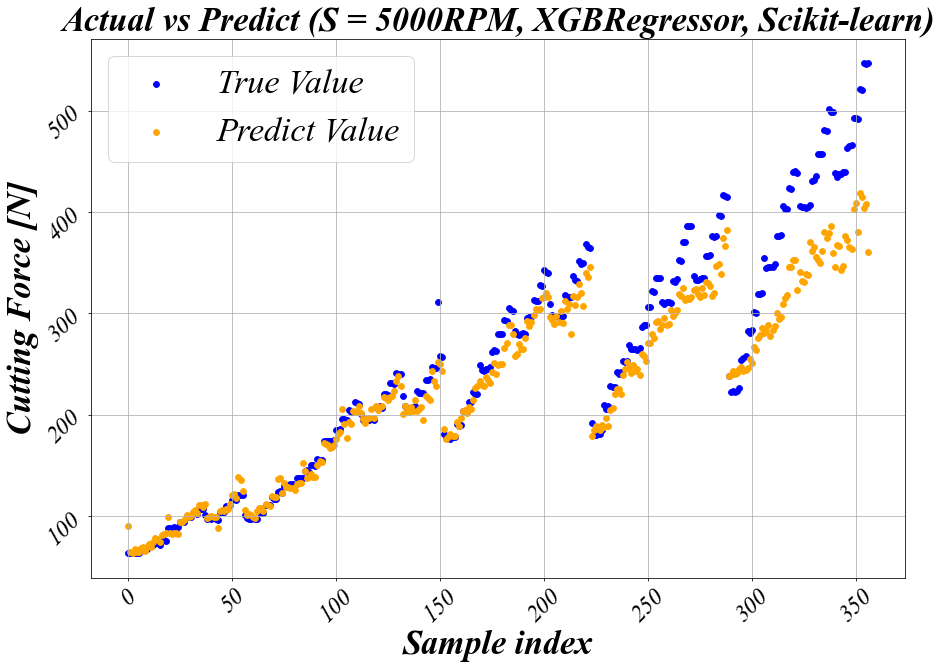

In [248]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (S = 5000RPM, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
fig.savefig("./plot/Predict tuning rpm5000 12800.png")